<table class="table table-bordered">
    <tr>
        <th style="width:250px"><img src='https://staffhome.np.edu.sg/campus/corpcomm/Downloadable/Logo%20%20Icon/ICT/ICT%20Logo%20Full%20Colour.jpg' style="width: 100%; height: 125px; "></th>
        <th style="text-align:center;"><h1>Data Wrangling</h1><h2>Assignment 1 </h2><h3>Diploma in Data Science</h3></th>
    </tr>
</table>

## Tables of Content <a id="top"></a>

### 1. [Step 1](#step1)
### 2. [Step 2](#step2)

- [2.1 Replacing NaN with "?"](#step2.1)

- [2.2 Changing Data Type](#step2.2)

- [2.3 Replacing Unique Values](#step2.3)

- [2.4 Quantifying Missing Data](#step2.4)

- [2.5 Identifying Correlation Relationship](#step2.5)

- [2.6 Identifying Linear Relationships](#step2.6)

- [2.7 Identifying Rare Categories](#step2.7)
        
### 3. [Step 3](#step3)

- [3.1 Distribution of Numerical Variables](#step3.1)

- [3.2 Outliers- Winsorisation](#step3.2)

- [3.3 Transformation of Numerical Variables](#step3.3)

### 4. [Step 4](#step4)

- [4.1 Train Test Split](#step4)

### 5. [Step 5](#step5)

- [5.1 Assembling Imputation Pipeline with Feature-Engine](#step5.1)

### 6. [Step 6](#step6)

- [6.1 Grouping Rare Categories](#step6.1)

- [6.2 Target Mean Encoding with Feature-Engine](#step6.2)

### 7. [Step 7](#step7)

- [7.1 Equal-width discretization with Feature-engine](#step7.1)

### 8. [Step 8](#step8)

- [8.1 Standardization](#step8.1)

### 9. [Step 9](#step9)

- [9.1 Linear Regression Modelling](#step9.1)

### 10. [Report](#report)

In [1]:
# import the pacakges
import numpy as np
import pandas as pd

# sklearn preprocess
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import KBinsDiscretizer

# feature engine
import feature_engine.imputation as mdi
from feature_engine.variable_handling import check_numerical_variables
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from feature_engine.encoding import OneHotEncoder, MeanEncoder, OrdinalEncoder, RareLabelEncoder
from feature_engine.discretisation import EqualWidthDiscretiser, EqualFrequencyDiscretiser
from sklearn.preprocessing import FunctionTransformer, MinMaxScaler, StandardScaler, RobustScaler
from feature_engine.transformation import LogTransformer

# Visual
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

### Step 1: Load Data into Jupyter Notebook <a id="step1"></a>

Load the data into a DataFrame variable and provide an overview of the DataFrame variable using the relevant functions(e.g. head(), info(), describe() and etc.)

[back to top](#top)

In [2]:
# load data
data = pd.read_csv('song_popularity.csv')

In [3]:
display(data.head())

display(data.tail())

Code                   Song_Name  Song_Duration_ms  Acousticness  \
0   HI8  Boulevard of Broken Dreams            262333      0.005410   
1  HI10                  In The End            216933      0.010094   
2  MI11           Seven Nation Army            231733      0.008007   
3   EI8                  By The Way            216933      0.025872   
4   HI9           How You Remind Me            223826      0.000935   

   Danceability  Energy  Instrumentalness  Key    Liveness  Audio_mode  \
0       0.49104    68.2          0.000029    8  112.126921           1   
1       0.53658    85.3          0.000000    3    122.7664           0   
2       0.72963    46.3          0.447000    0    157.5025           1   
3       0.44649    97.0          0.003550    0    121.4404           1   
4       0.44253    76.6          0.000000   10    123.8769           1   

   Speechiness    Tempo  Audio_valence Dynamism  Decibel Loudness  \
0        44.10  167.060          0.474     High   -4.095    Blare   
1          NaN  105.256          0.370     high   -6.407     Roar   
2       118.80  123.881          0.324      Med   -7.828     Roar   
3       160.50  122.444          0.198    Extra   -4.938    Blare   
4        46.95  172.011          0.574       Hi   -5.065    Blare   

   Song_Popularity  Indicator  
0            57.72     102.30  
1            45.37     127.95  
2            47.28      69.45  
3            52.89     145.50  
4            46.68     114.90

Code               Song_Name  Song_Duration_ms  Acousticness  \
18830  LI20          Let It Breathe            159645       0.87514   
18831  LI18                 Answers            205666       0.74970   
18832  MI16  Sudden Love (Acoustic)            182211       0.83006   
18833  MI16       Gentle on My Mind            352280       0.92610   
18834  MI15                Up to Me            193533       0.89278   

       Danceability  Energy  Instrumentalness  Key  Liveness  Audio_mode  \
18830       0.49500    15.1          0.000065   11  123.4321           1   
18831       0.49005    16.1          0.000001   11  122.1025           0   
18832       0.71181    32.5          0.000000    0  126.5625           1   
18833       0.48312    32.6          0.015700    3  125.2161           1   
18834       0.63360    38.1          0.000254    4  121.8816           1   

       Speechiness    Tempo  Audio_valence Dynamism  Decibel Loudness  \
18830        52.20  113.969          0.300       Lo  -16.107  Chatter   
18831        45.15   94.286          0.265      Low  -14.078   Babble   
18832        53.25  130.534          0.286      NaN  -12.222   Babble   
18833        49.20  106.063          0.323   Medium  -12.020   Babble   
18834        45.30   91.490          0.581      Med  -11.790   Rumble   

       Song_Popularity  Indicator  
18830            31.80      22.65  
18831            32.91      24.15  
18832            15.18      48.75  
18833            33.01      48.90  
18834            37.11      57.15

From this set of information, we can see the top five rows (head) and the last five rows (tail) of the 'song_popularity.csv' datset. By doing this, we can inspect how the dataset looks like in the beginning before any transformation has occurred to be able to see clearly what the changes are like and if it has been transformed correctly.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Code              18835 non-null  object 
 1   Song_Name         18835 non-null  object 
 2   Song_Duration_ms  18835 non-null  int64  
 3   Acousticness      18835 non-null  float64
 4   Danceability      15938 non-null  float64
 5   Energy            18835 non-null  float64
 6   Instrumentalness  18835 non-null  float64
 7   Key               18835 non-null  int64  
 8   Liveness          18835 non-null  object 
 9   Audio_mode        18835 non-null  int64  
 10  Speechiness       13184 non-null  float64
 11  Tempo             18835 non-null  float64
 12  Audio_valence     18835 non-null  float64
 13  Dynamism          15137 non-null  object 
 14  Decibel           18835 non-null  float64
 15  Loudness          18835 non-null  object 
 16  Song_Popularity   18835 non-null  float6

From this set of information, we can see the total number of rows (18835) and rows (18). Not only that, we can see the index of each column, the column names, the total number of non-null rows in each column and the data type of each column. As a conclusion, we can see that there is 10 columns with a data type of float64, 3 columns with int64 type and 5 columns of object type.

Thus, from this set of information we can see that 'Danceability', 'Speechiness', 'Dynamism' have rows with null values as their count is not equal to the number of rows. 

In [5]:
data.describe()

Song_Duration_ms  Acousticness  Danceability        Energy  \
count      1.883500e+04  18835.000000  15938.000000  18835.000000   
mean       2.182116e+05      0.253368      0.626669     64.499476   
std        5.988754e+04      0.282945      0.155086     21.410076   
min        1.200000e+04      0.000001      0.000000      0.107000   
25%        1.843395e+05      0.023618      0.526680     51.000000   
50%        2.113060e+05      0.129360      0.636570     67.400000   
75%        2.428440e+05      0.415520      0.740520     81.500000   
max        1.799346e+06      0.976080      0.977130     99.900000   

       Instrumentalness           Key    Audio_mode   Speechiness  \
count      18835.000000  18835.000000  18835.000000  13184.000000   
mean           0.078008      5.289196      0.628139    152.173475   
std            0.221591      3.614595      0.483314    155.018531   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.000000      2.000000      0.000000     56.700000   
50%            0.000011      5.000000      1.000000     83.250000   
75%            0.002570      8.000000      1.000000    177.000000   
max            0.997000     11.000000      1.000000   1410.000000   

              Tempo  Audio_valence       Decibel  Song_Popularity  \
count  18835.000000   18835.000000  18835.000000     18835.000000   
mean     121.073154       0.527967     -7.447435        42.357670   
std       28.714456       0.244632      3.827831        13.949829   
min        0.000000       0.000000    -38.768000         0.000000   
25%       98.368000       0.335000     -9.044000        32.790000   
50%      120.013000       0.527000     -6.555000        42.730000   
75%      139.931000       0.725000     -4.908000        52.290000   
max      242.318000       0.984000      1.585000        99.320000   

          Indicator  
count  18835.000000  
mean      96.749215  
std       32.115110  
min        0.160000  
25%       76.500000  
50%      101.100000  
75%      122.250000  
max      149.850000

From this set of information, we can see the description of each column. This shows us the count of rows in a column, mean value, standard deviation, minimum value, 25th percentile, 50th percentile, 75th percentile and the maximum value. 

In [6]:
# Cardinality of each columns (Prac 1.3)

data.nunique(dropna= True)

Code                  186
Song_Name           13070
Song_Duration_ms    11771
Acousticness         3207
Danceability          834
Energy               1132
Instrumentalness     3925
Key                    12
Liveness             1426
Audio_mode              2
Speechiness          1193
Tempo               12112
Audio_valence        1246
Dynamism               11
Decibel              8416
Loudness               19
Song_Popularity      5149
Indicator            1127
dtype: int64

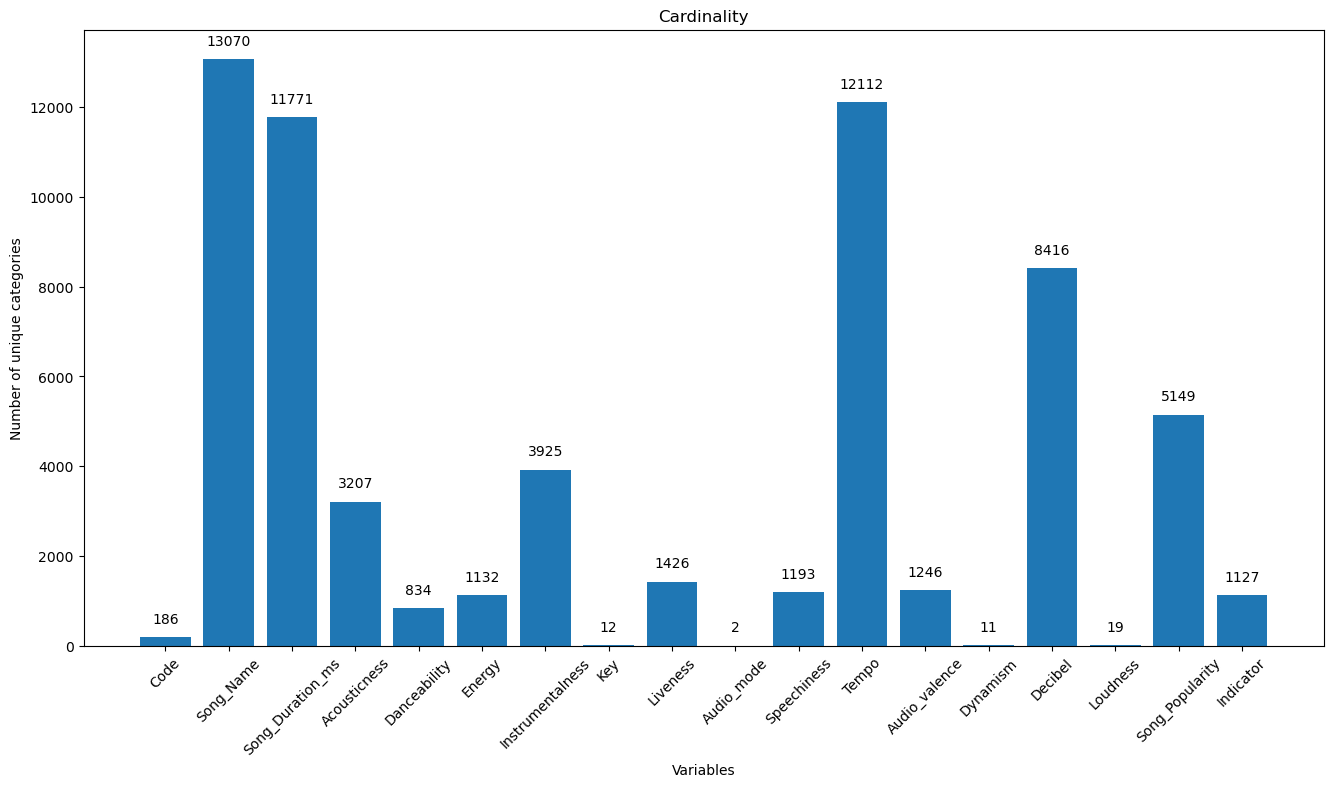

In [7]:
plt.figure(figsize=(16,8))
columns = data.columns.tolist()
plt.bar(columns, data.nunique(), align='center')

for x, y in zip(columns, data.nunique()):
    label = "{:d}".format(y)
    plt.annotate(label, 
                 (x, y), 
                 textcoords="offset points", 
                 xytext=(0, 10), 
                 ha='center')

plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

From this set of information, we can see the total number of unqiue categories of each column exclusive of null values.

### Step 2: Exploratory Data Analysis <a id="step2"></a>

Download the dataset from PoliteMall, conduct a comprehensive exploratory data analysis on the dataset. 

[back to top](#top)

### Replace NaN (Not a Number) with '?'<a id="step2.1"></a>

Prac 1.0

In [8]:
data = data.replace('?',np.nan)
data.head()

Code                   Song_Name  Song_Duration_ms  Acousticness  \
0   HI8  Boulevard of Broken Dreams            262333      0.005410   
1  HI10                  In The End            216933      0.010094   
2  MI11           Seven Nation Army            231733      0.008007   
3   EI8                  By The Way            216933      0.025872   
4   HI9           How You Remind Me            223826      0.000935   

   Danceability  Energy  Instrumentalness  Key    Liveness  Audio_mode  \
0       0.49104    68.2          0.000029    8  112.126921           1   
1       0.53658    85.3          0.000000    3    122.7664           0   
2       0.72963    46.3          0.447000    0    157.5025           1   
3       0.44649    97.0          0.003550    0    121.4404           1   
4       0.44253    76.6          0.000000   10    123.8769           1   

   Speechiness    Tempo  Audio_valence Dynamism  Decibel Loudness  \
0        44.10  167.060          0.474     High   -4.095    Blare   
1          NaN  105.256          0.370     high   -6.407     Roar   
2       118.80  123.881          0.324      Med   -7.828     Roar   
3       160.50  122.444          0.198    Extra   -4.938    Blare   
4        46.95  172.011          0.574       Hi   -5.065    Blare   

   Song_Popularity  Indicator  
0            57.72     102.30  
1            45.37     127.95  
2            47.28      69.45  
3            52.89     145.50  
4            46.68     114.90

### Changing Data 

Prac 2.0

### Changing Data Type <a id="step2.2"></a>

In [9]:
data['Liveness'] = data['Liveness'].astype('float64')

Change the data type of Liveness from object to float64. It was previously classfied as an object despite the value written in numbers and have floating points.

### Replacing Unique Values <a id="step2.3"></a>

In [10]:
unique_values = data['Dynamism'].unique()
print(unique_values)

['High' 'high' 'Med' 'Extra' 'Hi' nan 'h' 'Medium' 'm' 'Low' 'Lo' 'l']


In [11]:
data['Dynamism'] = data['Dynamism'].str.lower().replace({
    'med': 'medium',
    'hi': 'high',
    'h': 'high',
    'high': 'high',
    'm': 'medium',
    'extra': 'extra',
    'low': 'low',
    'lo': 'low',
    'l': 'low'
})
unique_values = data['Dynamism'].unique()
print(unique_values)

['high' 'medium' 'extra' nan 'low']


As there are multiple variations of the data values refering to one unique value, it is essential to adjust the values to avoid future conflicts of the dataset and improve the reliability of the data.

### Ensure if values have changed

In [12]:
data.dtypes

Code                 object
Song_Name            object
Song_Duration_ms      int64
Acousticness        float64
Danceability        float64
Energy              float64
Instrumentalness    float64
Key                   int64
Liveness            float64
Audio_mode            int64
Speechiness         float64
Tempo               float64
Audio_valence       float64
Dynamism             object
Decibel             float64
Loudness             object
Song_Popularity     float64
Indicator           float64
dtype: object

In [13]:
data.head()

Code                   Song_Name  Song_Duration_ms  Acousticness  \
0   HI8  Boulevard of Broken Dreams            262333      0.005410   
1  HI10                  In The End            216933      0.010094   
2  MI11           Seven Nation Army            231733      0.008007   
3   EI8                  By The Way            216933      0.025872   
4   HI9           How You Remind Me            223826      0.000935   

   Danceability  Energy  Instrumentalness  Key    Liveness  Audio_mode  \
0       0.49104    68.2          0.000029    8  112.126921           1   
1       0.53658    85.3          0.000000    3  122.766400           0   
2       0.72963    46.3          0.447000    0  157.502500           1   
3       0.44649    97.0          0.003550    0  121.440400           1   
4       0.44253    76.6          0.000000   10  123.876900           1   

   Speechiness    Tempo  Audio_valence Dynamism  Decibel Loudness  \
0        44.10  167.060          0.474     high   -4.095    Blare   
1          NaN  105.256          0.370     high   -6.407     Roar   
2       118.80  123.881          0.324   medium   -7.828     Roar   
3       160.50  122.444          0.198    extra   -4.938    Blare   
4        46.95  172.011          0.574     high   -5.065    Blare   

   Song_Popularity  Indicator  
0            57.72     102.30  
1            45.37     127.95  
2            47.28      69.45  
3            52.89     145.50  
4            46.68     114.90

### Categorize the columns

In [14]:
num_cols = [c for c in data.columns if data[c].dtypes !='O']
data[num_cols].head()

Song_Duration_ms  Acousticness  Danceability  Energy  Instrumentalness  \
0            262333      0.005410       0.49104    68.2          0.000029   
1            216933      0.010094       0.53658    85.3          0.000000   
2            231733      0.008007       0.72963    46.3          0.447000   
3            216933      0.025872       0.44649    97.0          0.003550   
4            223826      0.000935       0.44253    76.6          0.000000   

   Key    Liveness  Audio_mode  Speechiness    Tempo  Audio_valence  Decibel  \
0    8  112.126921           1        44.10  167.060          0.474   -4.095   
1    3  122.766400           0          NaN  105.256          0.370   -6.407   
2    0  157.502500           1       118.80  123.881          0.324   -7.828   
3    0  121.440400           1       160.50  122.444          0.198   -4.938   
4   10  123.876900           1        46.95  172.011          0.574   -5.065   

   Song_Popularity  Indicator  
0            57.72     102.30  
1            45.37     127.95  
2            47.28      69.45  
3            52.89     145.50  
4            46.68     114.90

In [15]:
num_cols

['Song_Duration_ms',
 'Acousticness',
 'Danceability',
 'Energy',
 'Instrumentalness',
 'Key',
 'Liveness',
 'Audio_mode',
 'Speechiness',
 'Tempo',
 'Audio_valence',
 'Decibel',
 'Song_Popularity',
 'Indicator']

In [16]:
cat_cols = [c for c in data.columns if data[c].dtypes =='O']
data[cat_cols].head()

Code                   Song_Name Dynamism Loudness
0   HI8  Boulevard of Broken Dreams     high    Blare
1  HI10                  In The End     high     Roar
2  MI11           Seven Nation Army   medium     Roar
3   EI8                  By The Way    extra    Blare
4   HI9           How You Remind Me     high    Blare

In [17]:
cat_cols

['Code', 'Song_Name', 'Dynamism', 'Loudness']

### Quantifying Missing Data <a id="step2.4"></a>

Prac 1.2

In [18]:
data.isnull().mean().sort_values()

Code                0.000000
Decibel             0.000000
Audio_valence       0.000000
Tempo               0.000000
Audio_mode          0.000000
Song_Popularity     0.000000
Key                 0.000000
Indicator           0.000000
Energy              0.000000
Acousticness        0.000000
Song_Duration_ms    0.000000
Song_Name           0.000000
Instrumentalness    0.000000
Liveness            0.000053
Loudness            0.100982
Danceability        0.153809
Dynamism            0.196337
Speechiness         0.300027
dtype: float64

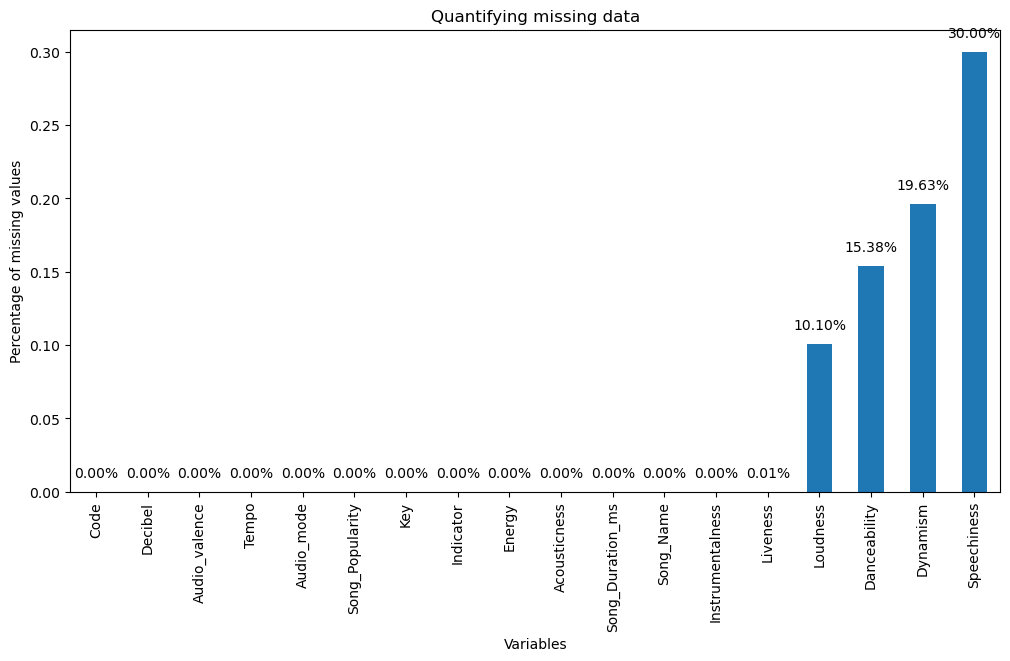

In [19]:
# Plotting the bar chart
data.isnull().mean().sort_values().plot.bar(figsize=(12, 6))

# Adding labels and title
plt.ylabel('Percentage of missing values')
plt.xlabel('Variables')
plt.title('Quantifying missing data')

# Adding annotations for each bar
for i, v in enumerate(data.isnull().mean().sort_values()):
    plt.text(i, v + 0.01, f"{v:.2%}", ha='center')

# Showing the plot
plt.show()


### Identifying Correlation Relationship <a id="step2.5"></a>

In [20]:
for cols in num_cols:
    correlation = data[cols].corr(data['Song_Popularity'])
    print (f'{cols}: ', correlation)

Song_Duration_ms:  0.002141455393166121
Acousticness:  -0.28990342212762216
Danceability:  0.2044457621077245
Energy:  0.4118238840959666
Instrumentalness:  -0.25067943190555053
Key:  -0.0005140196981430823
Liveness:  0.014353424826893528
Audio_mode:  -0.029625850747861854
Speechiness:  0.030954446921217307
Tempo:  0.04706499056968081
Audio_valence:  0.3147433517816234
Decibel:  0.5128292149210611
Song_Popularity:  1.0
Indicator:  0.41182380654625533


<Axes: >

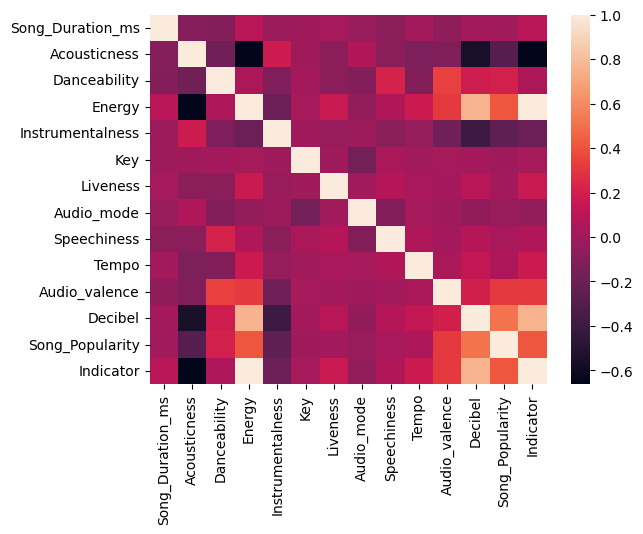

In [21]:
sns.heatmap(data[num_cols].corr())

### Identify Linear Relationship Between Target & Variables 
<a id="step2.6"></a>

(Prac 1.5)

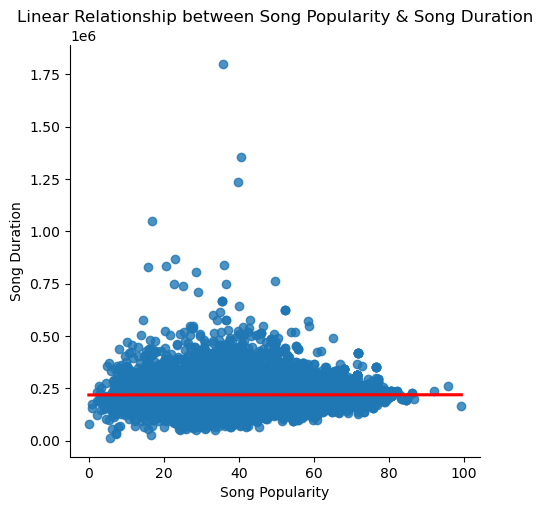

In [22]:
sns.lmplot(x="Song_Popularity", y="Song_Duration_ms", data=data, order=1, line_kws={'color':'red'})

plt.title('Linear Relationship between Song Popularity & Song Duration')
plt.ylabel('Song Duration')
plt.xlabel('Song Popularity')

plt.show()

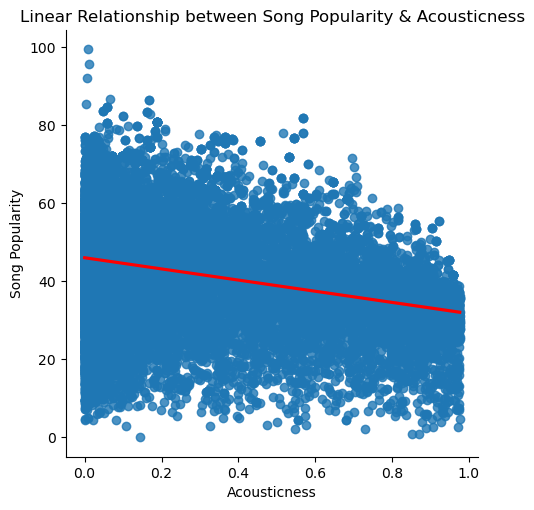

In [23]:
sns.lmplot(x="Acousticness", y="Song_Popularity", data=data, order=1, line_kws={'color':'red'})

plt.title('Linear Relationship between Song Popularity & Acousticness')
plt.ylabel('Song Popularity')
plt.xlabel('Acousticness')

plt.show()

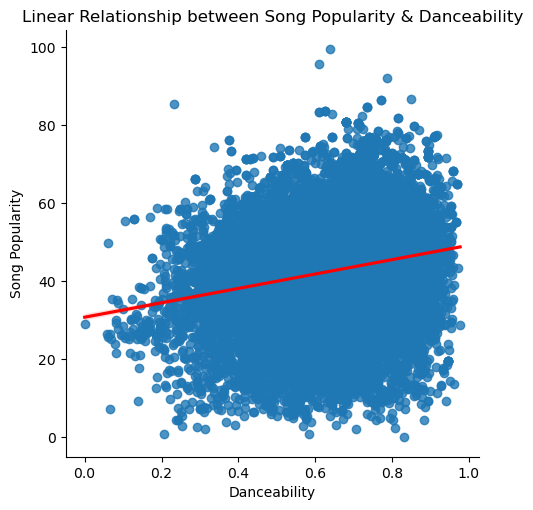

In [24]:
sns.lmplot(x="Danceability", y="Song_Popularity", data=data, order=1, line_kws={'color':'red'})

plt.title('Linear Relationship between Song Popularity & Danceability')
plt.ylabel('Song Popularity')
plt.xlabel('Danceability')

plt.show()

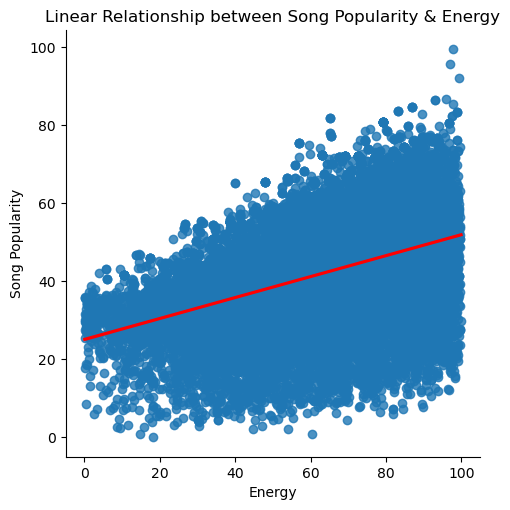

In [25]:
sns.lmplot(x="Energy", y="Song_Popularity", data=data, order=1, line_kws={'color':'red'})

plt.title('Linear Relationship between Song Popularity & Energy')
plt.ylabel('Song Popularity')
plt.xlabel('Energy')

plt.show()

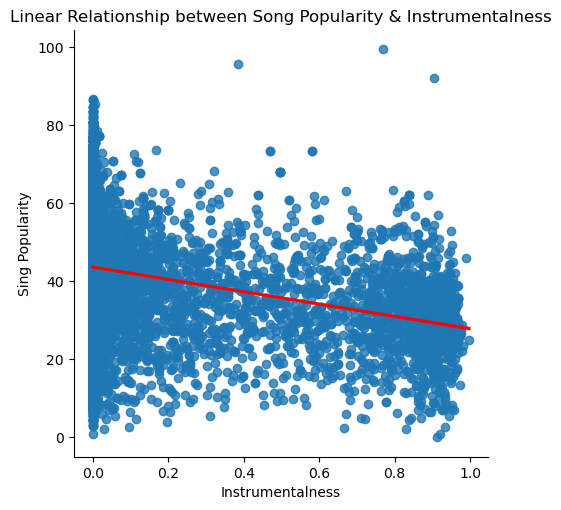

In [26]:
sns.lmplot(x="Instrumentalness", y="Song_Popularity", data=data, order=1, line_kws={'color':'red'})

plt.title('Linear Relationship between Song Popularity & Instrumentalness')
plt.ylabel('Sing Popularity')
plt.xlabel('Instrumentalness')

plt.show()

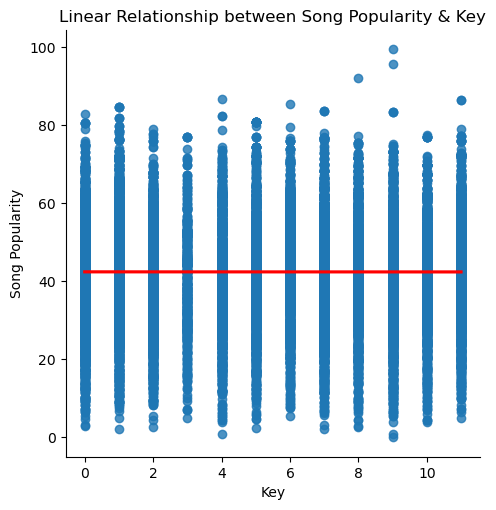

In [27]:
sns.lmplot(x="Key", y="Song_Popularity", data=data, order=1, line_kws={'color':'red'})

plt.title('Linear Relationship between Song Popularity & Key')
plt.ylabel('Song Popularity')
plt.xlabel('Key')

plt.show()

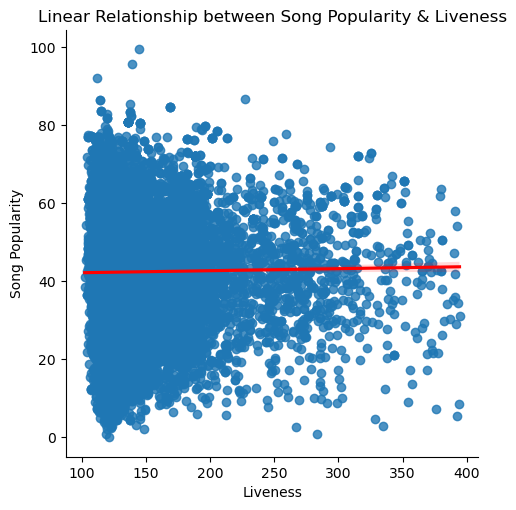

In [28]:
sns.lmplot(x="Liveness", y="Song_Popularity", data=data, order=1, line_kws={'color':'red'})

plt.title('Linear Relationship between Song Popularity & Liveness')
plt.ylabel('Song Popularity')
plt.xlabel('Liveness')

plt.show()

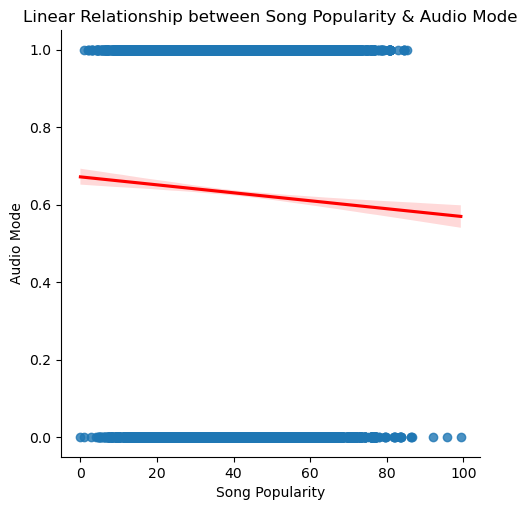

In [29]:
sns.lmplot(x="Song_Popularity", y="Audio_mode", data=data, order=1, line_kws={'color':'red'})

plt.title('Linear Relationship between Song Popularity & Audio Mode')
plt.ylabel('Audio Mode')
plt.xlabel('Song Popularity')

plt.show()

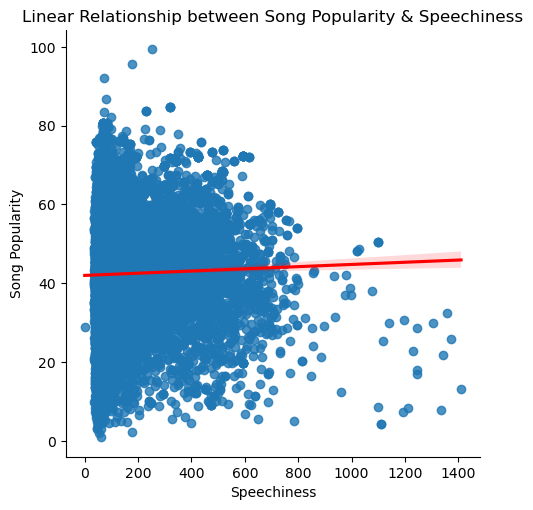

In [30]:
sns.lmplot(x="Speechiness", y="Song_Popularity", data=data, order=1, line_kws={'color':'red'})

plt.title('Linear Relationship between Song Popularity & Speechiness')
plt.ylabel('Song Popularity')
plt.xlabel('Speechiness')

plt.show()

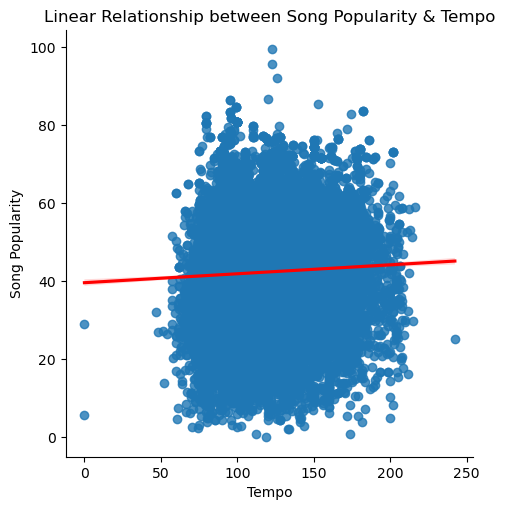

In [31]:
sns.lmplot(x="Tempo", y="Song_Popularity", data=data, order=1, line_kws={'color':'red'})

plt.title('Linear Relationship between Song Popularity & Tempo')
plt.ylabel('Song Popularity')
plt.xlabel('Tempo')

plt.show()

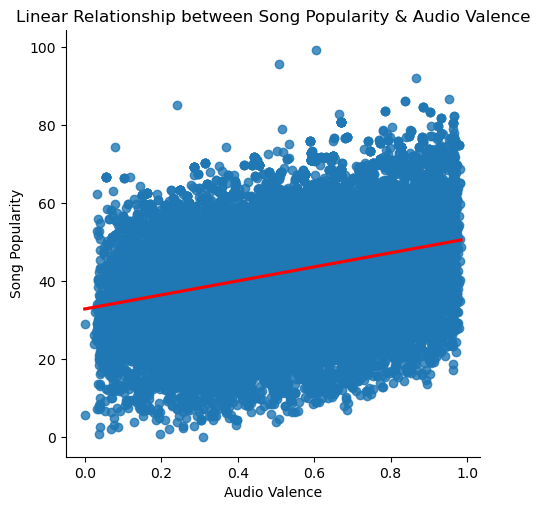

In [32]:
sns.lmplot(x="Audio_valence", y="Song_Popularity", data=data, order=1, line_kws={'color':'red'})

plt.title('Linear Relationship between Song Popularity & Audio Valence')
plt.ylabel('Song Popularity')
plt.xlabel('Audio Valence')

plt.show()

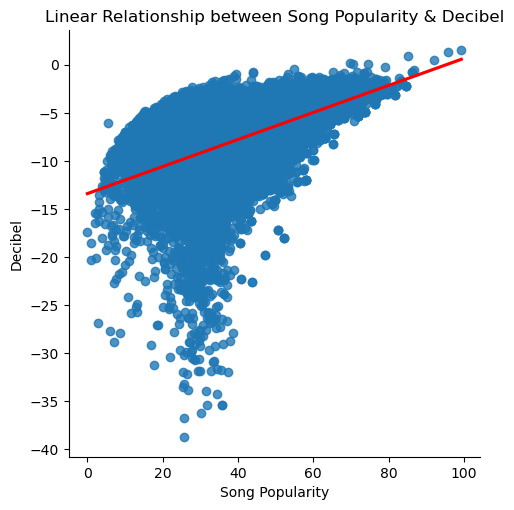

In [33]:
sns.lmplot(x="Song_Popularity", y="Decibel", data=data, order=1, line_kws={'color':'red'})

plt.title('Linear Relationship between Song Popularity & Decibel')
plt.ylabel('Decibel')
plt.xlabel('Song Popularity')

plt.show()

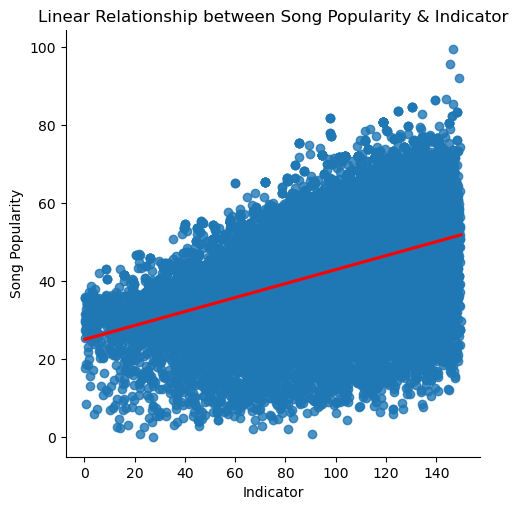

In [34]:
sns.lmplot(x="Indicator", y="Song_Popularity", data=data, order=1, line_kws={'color':'red'})

plt.title('Linear Relationship between Song Popularity & Indicator')
plt.ylabel('Song Popularity')
plt.xlabel('Indicator')

plt.show()

### Rare Categories <a id="step2.7"></a>

In [35]:
list_cols = ["Dynamism", "Key", "Audio_mode"]

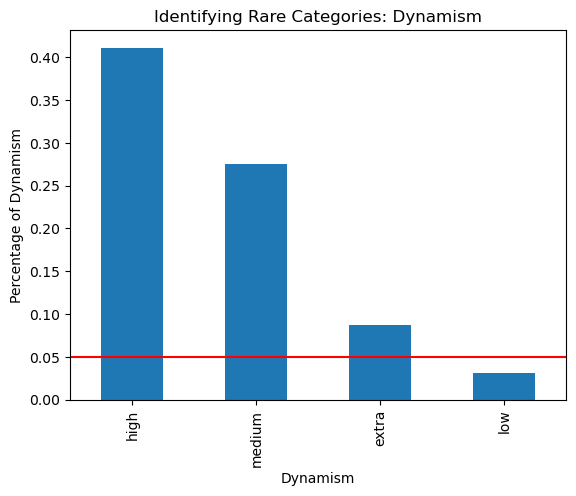

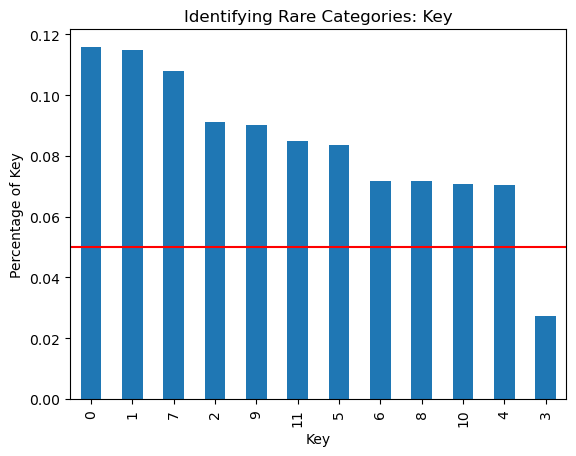

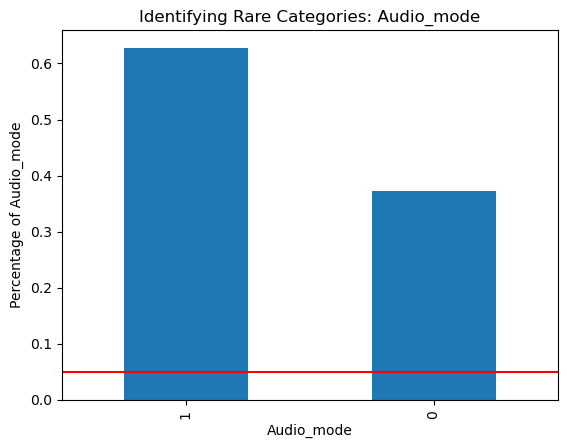

In [36]:
for cols in list_cols:    
    length=len(data)

    label_freq = data[cols].value_counts() / length
    fig = label_freq.sort_values(ascending=False).plot.bar()

    fig.axhline(y=0.05, color='red')

    # add axis labels and title
    fig.set_ylabel(f'Percentage of {cols}')
    fig.set_title(f'Identifying Rare Categories: {cols}')
    plt.show()

### Step 3: Data Preprocessing <a id="step3"></a>

Are there any outliers? How did you identify them and how to deal with them? Are you happy with the distribution of the numerical variables? Do you need to transform the numerical variables using proper transformation methods (e.g. log transformation, Box-Cox and etc.)? 

[back to top](#top)

### Distribution of Numerical Variables

<a id="step3.1"></a>

In [37]:
num_cols = [col for col in num_cols if col != "Song_Popularity"]

In [38]:
# plot histogram, QQ-Plot & Boxplot

def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.suptitle(f"{variable}")
      
    plt.subplot(1, 3, 1)
    df[variable].hist(bins=30)
    plt.title("Histogram")

    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.title("QQ-Plot")
    
    plt.subplot(1,3,3)
    sns.boxplot(y=variable, data=df)
    plt.title("Boxplot")
    
    plt.show()

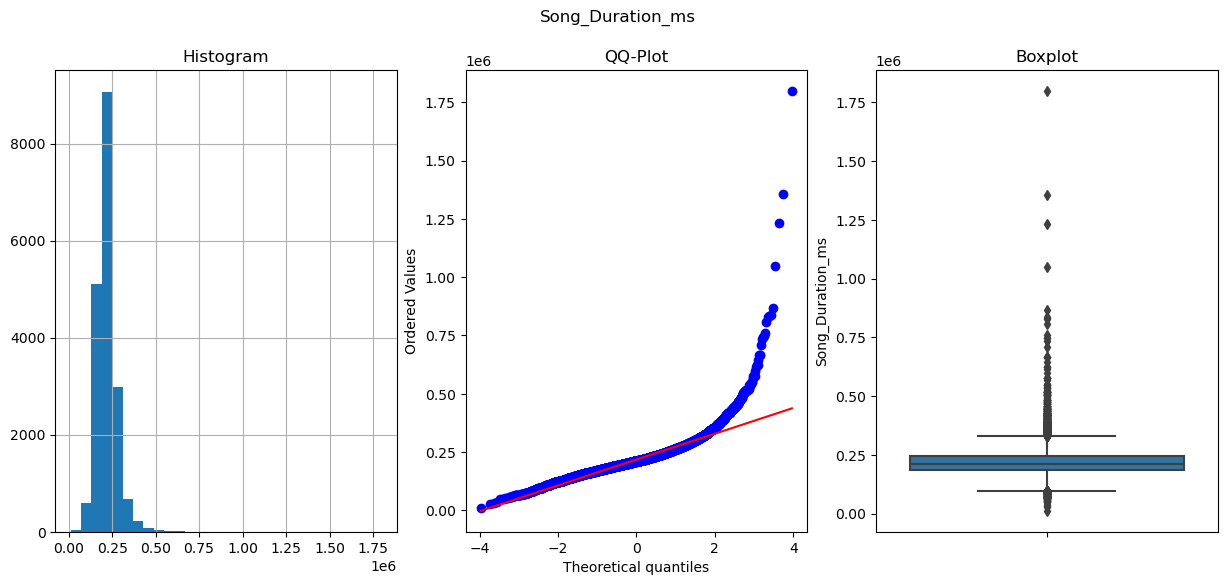

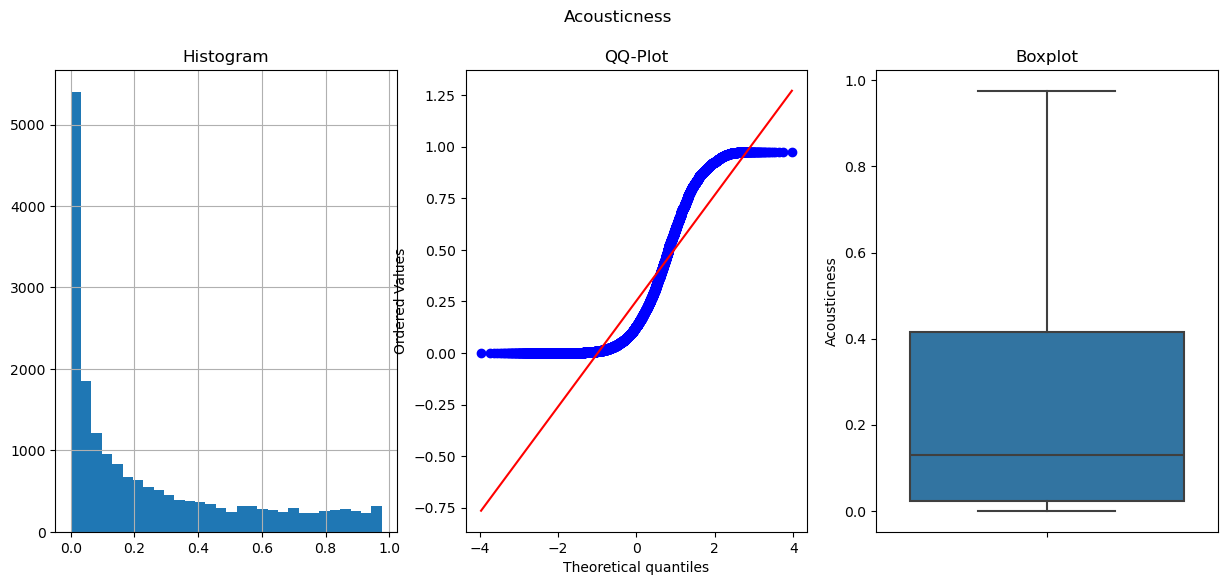

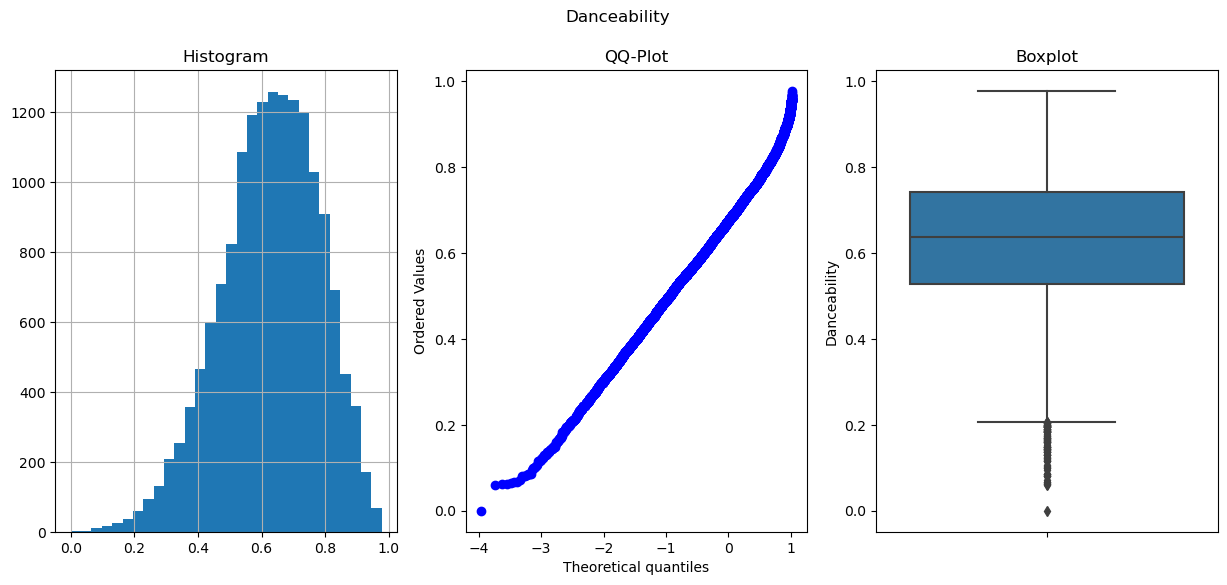

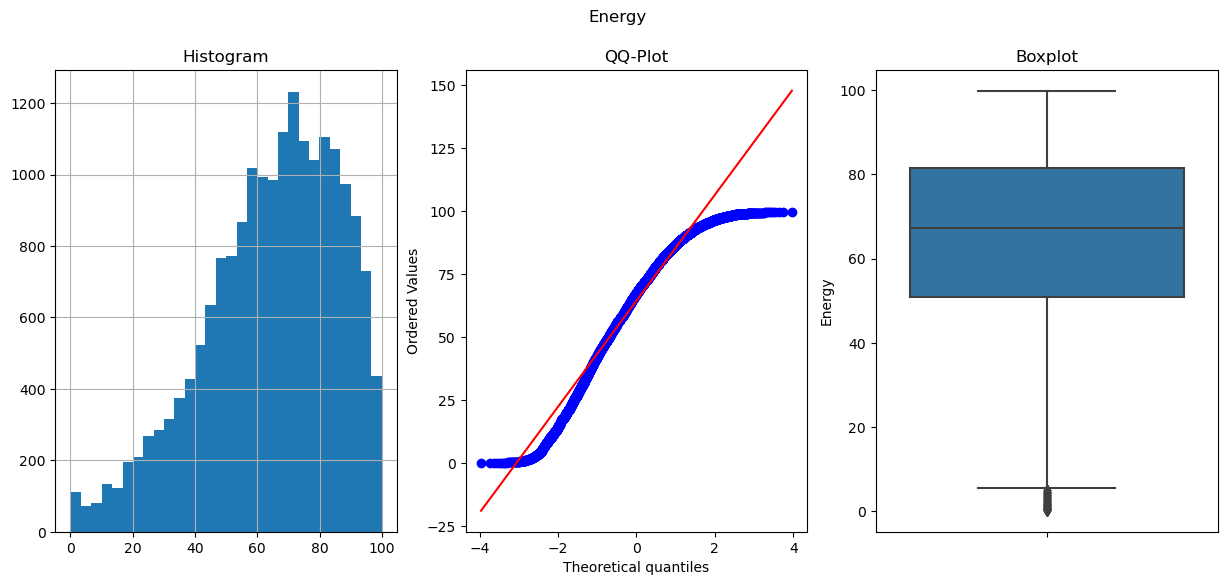

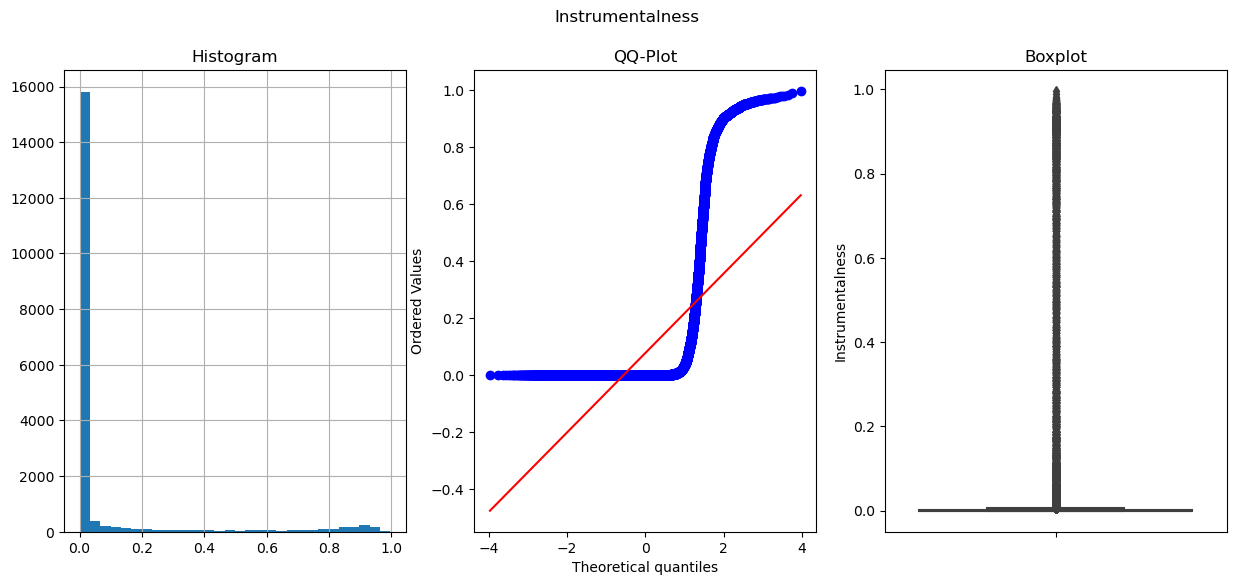

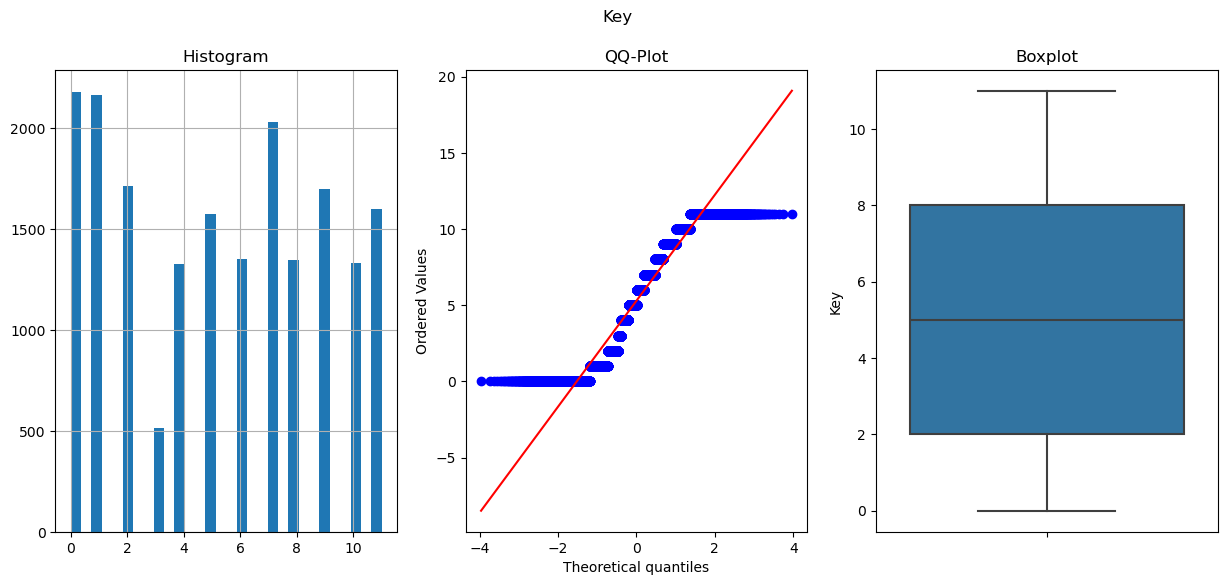

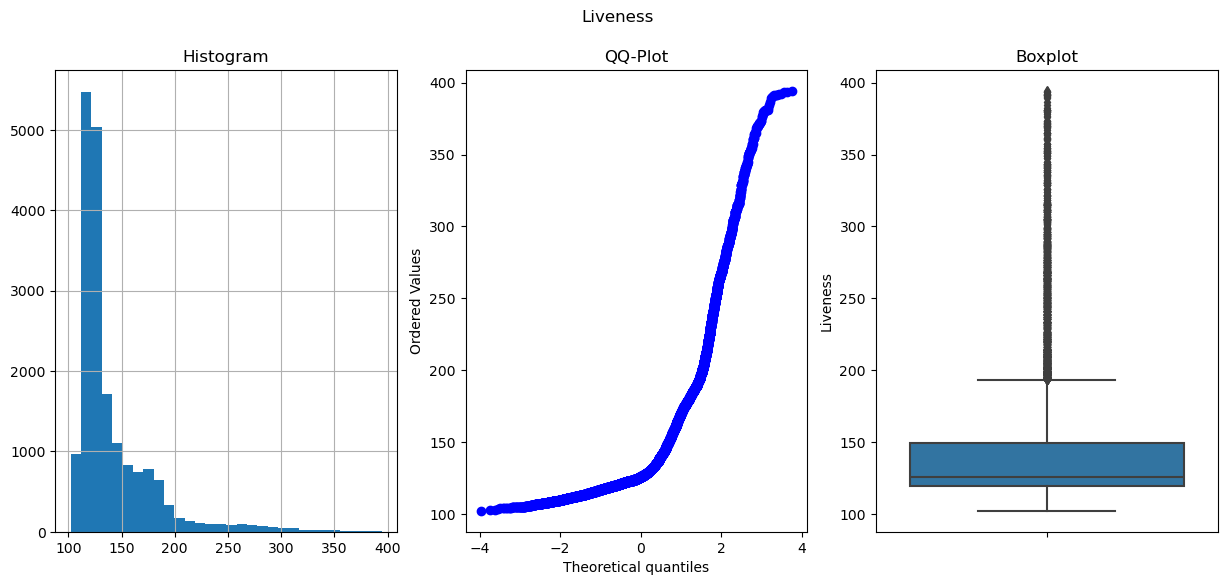

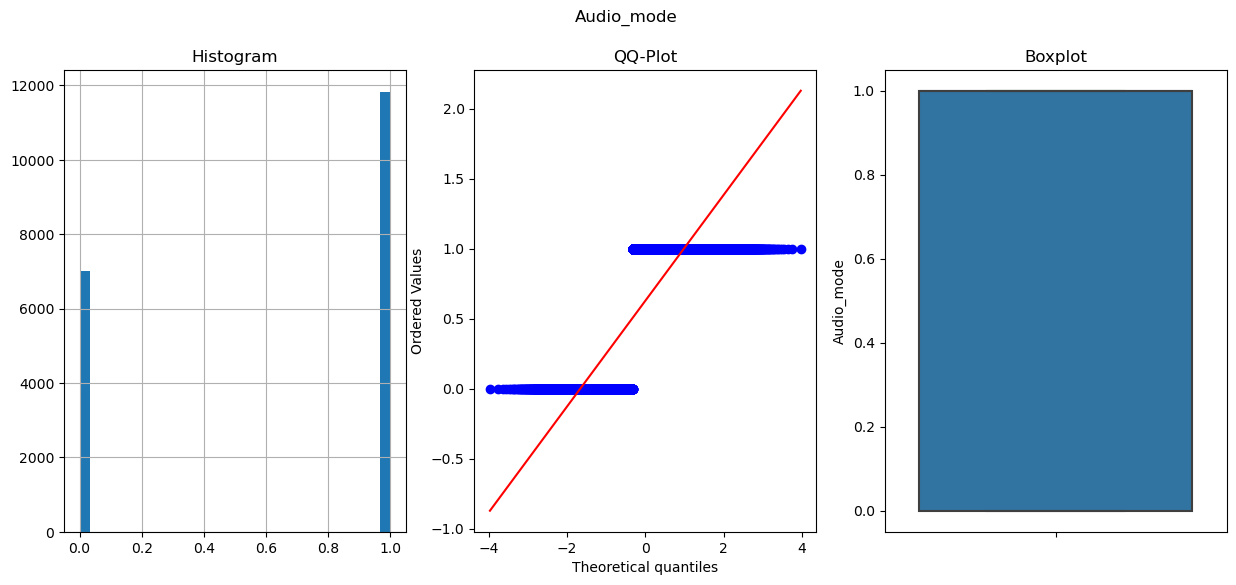

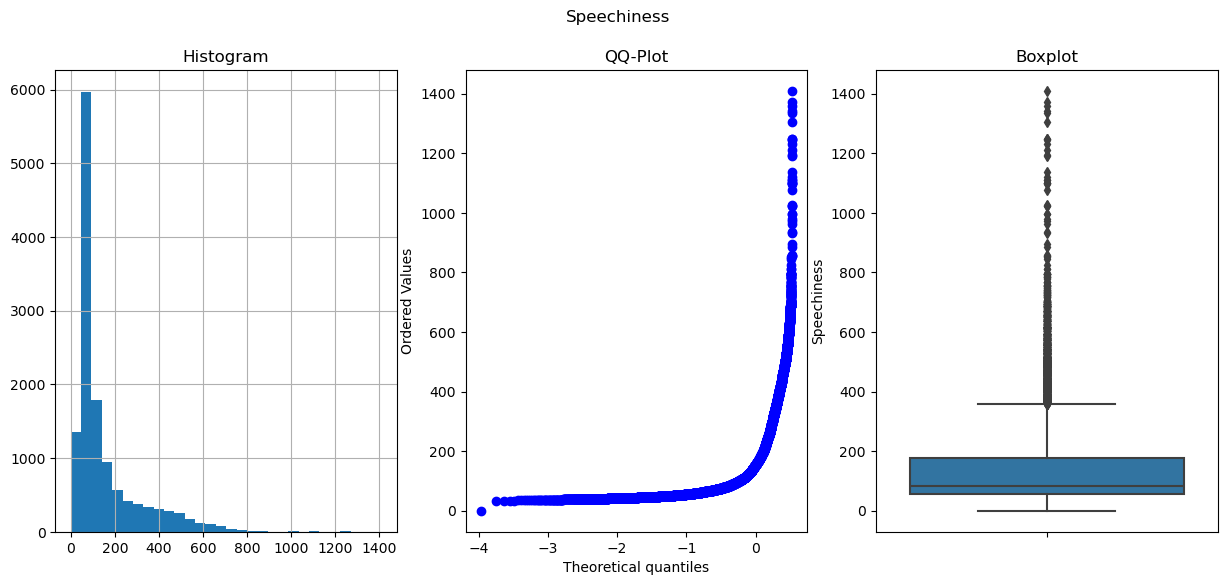

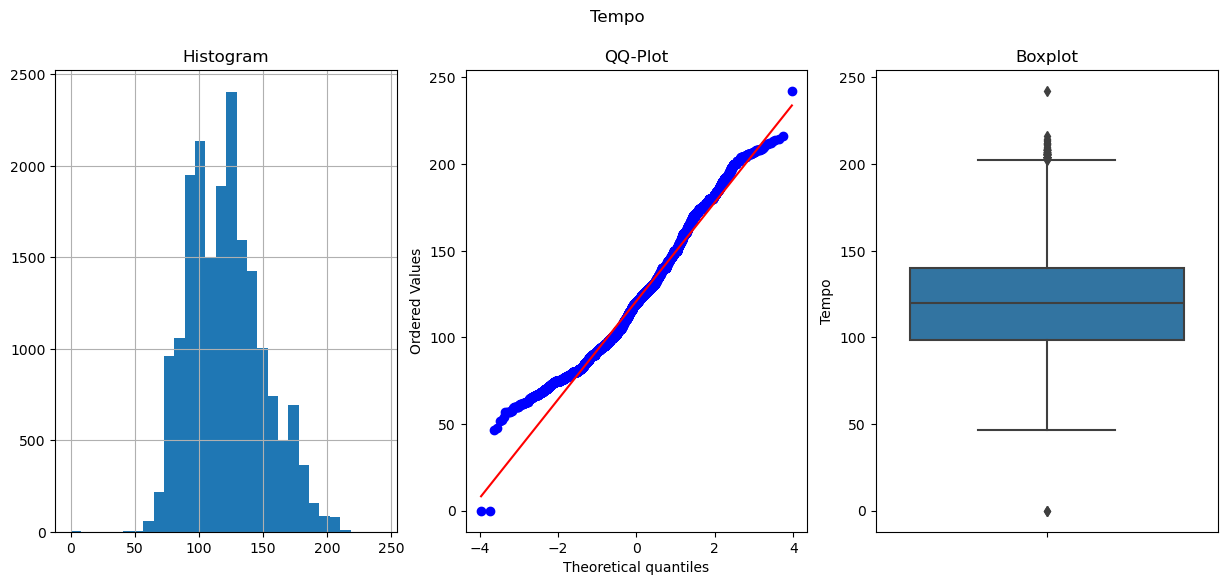

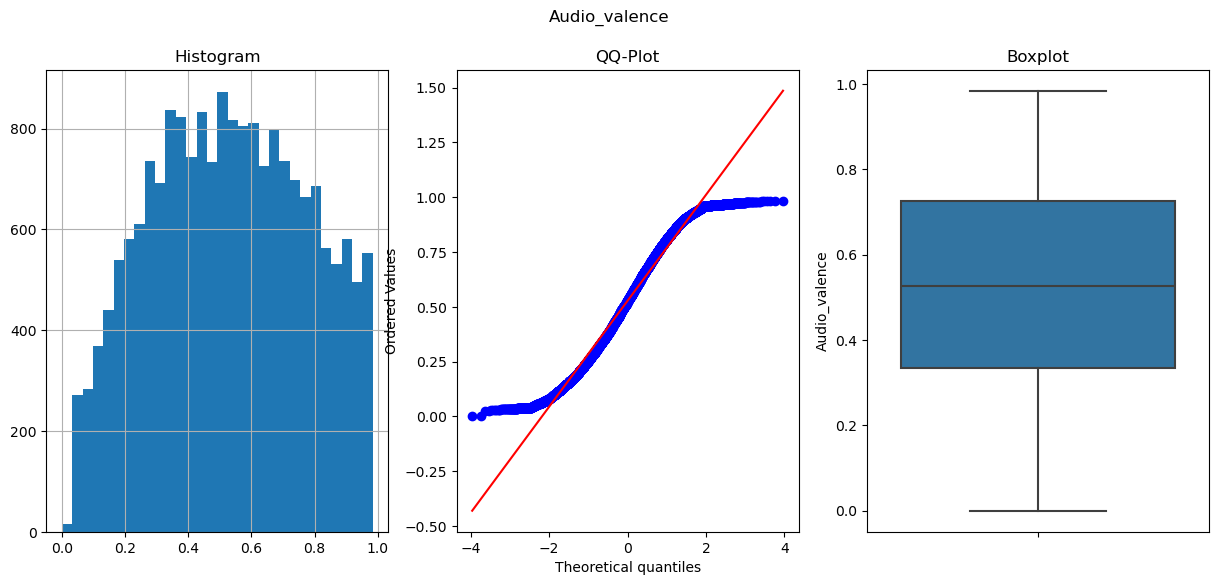

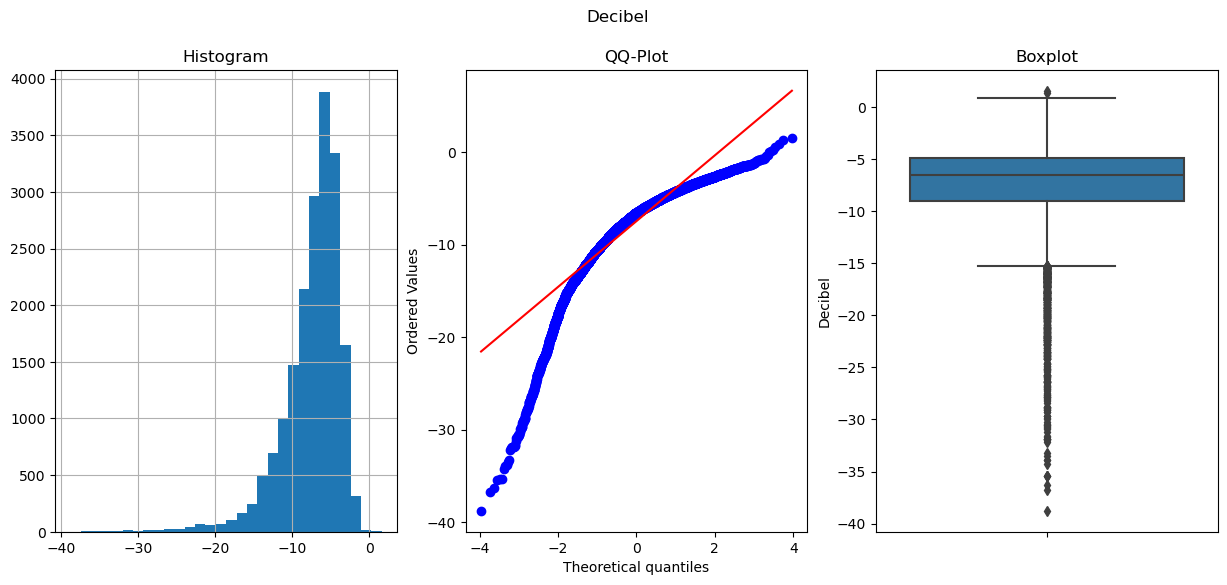

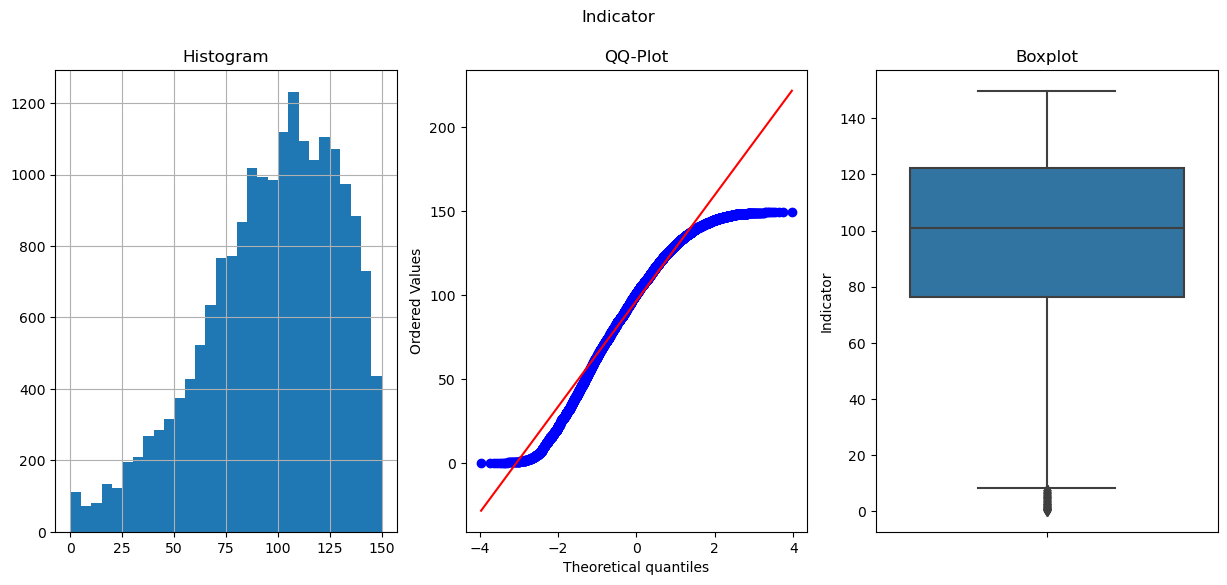

In [39]:
for cols in num_cols:
    diagnostic_plots(data, cols)

### Outliers - Winsorisation <a id="step3.2"></a>

Prac 6.2

In [40]:
def winsorise(data, variable, upper_limit, lower_limit):
    return np.where(data[variable] > upper_limit, upper_limit, 
                    np.where(data[variable] < lower_limit, lower_limit, data[variable]))

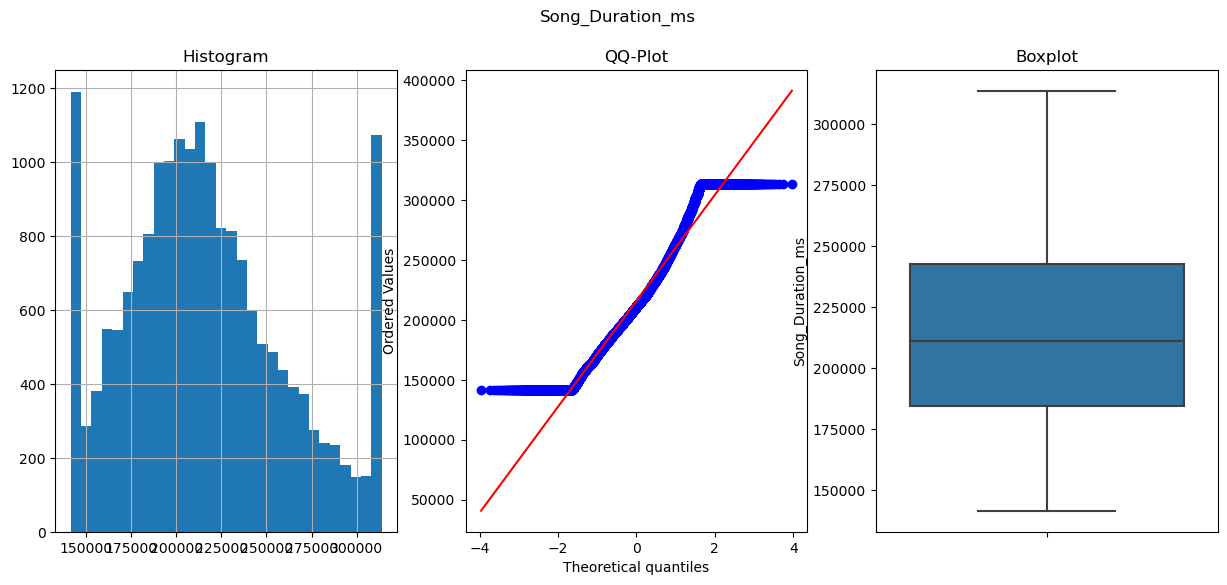

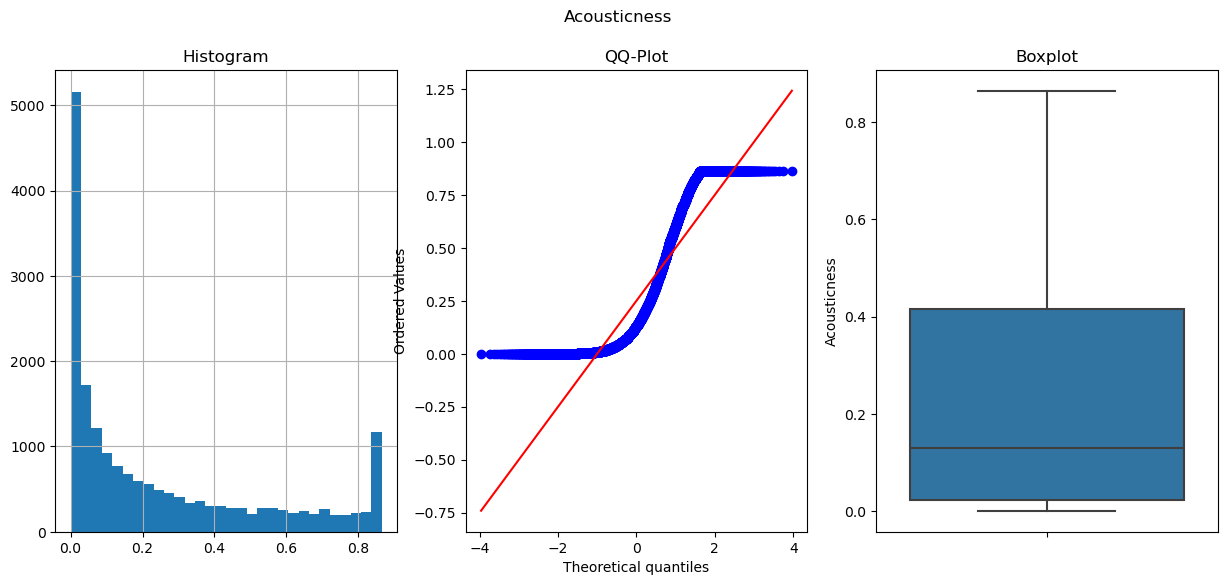

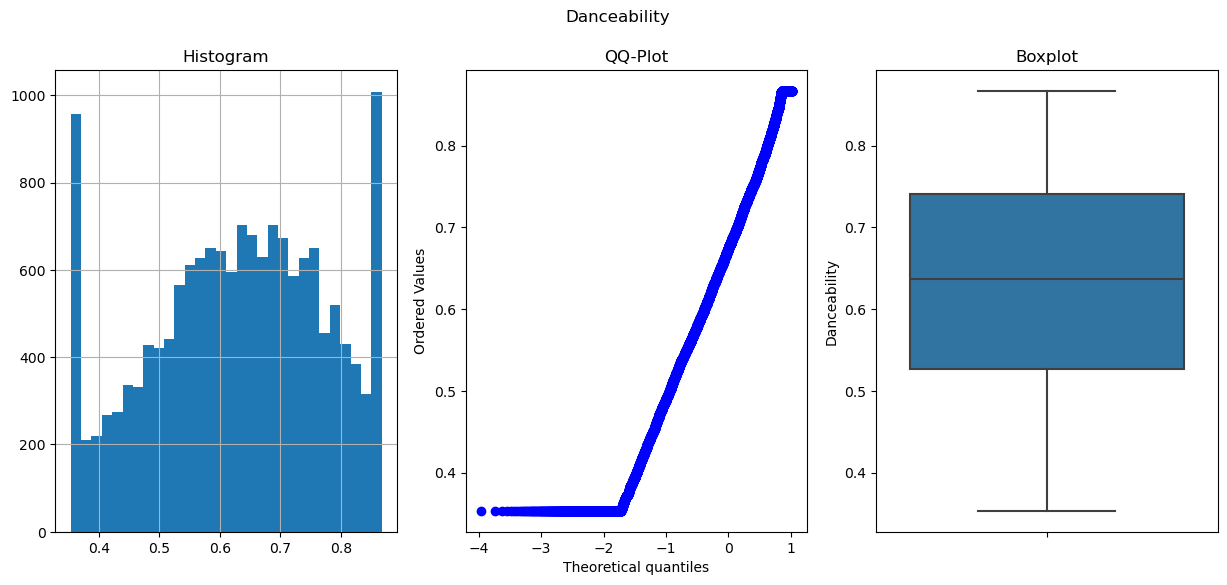

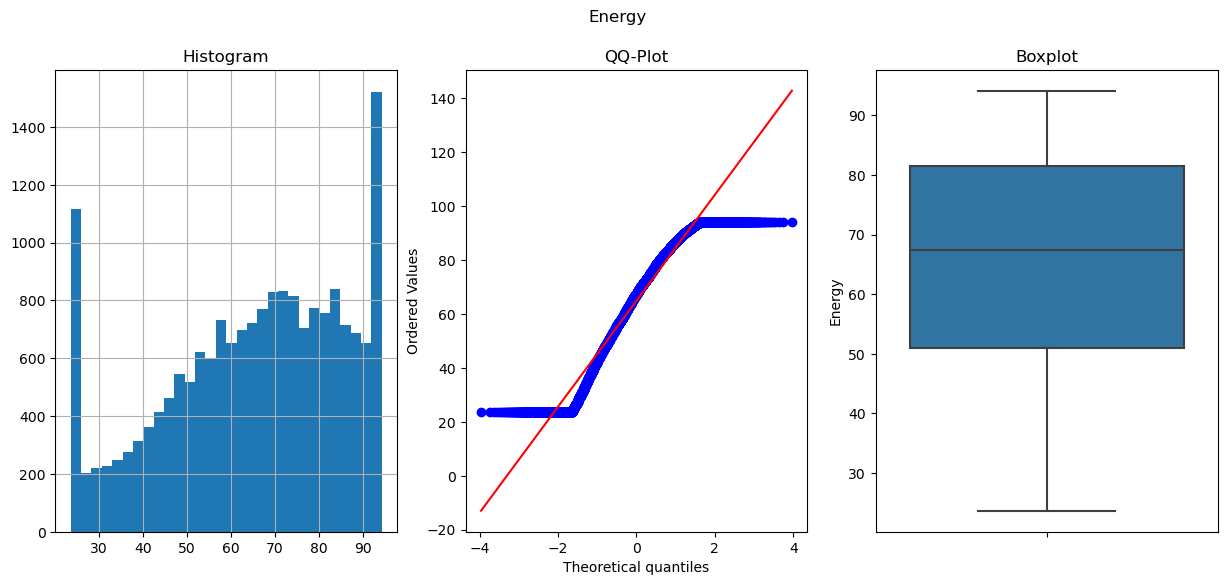

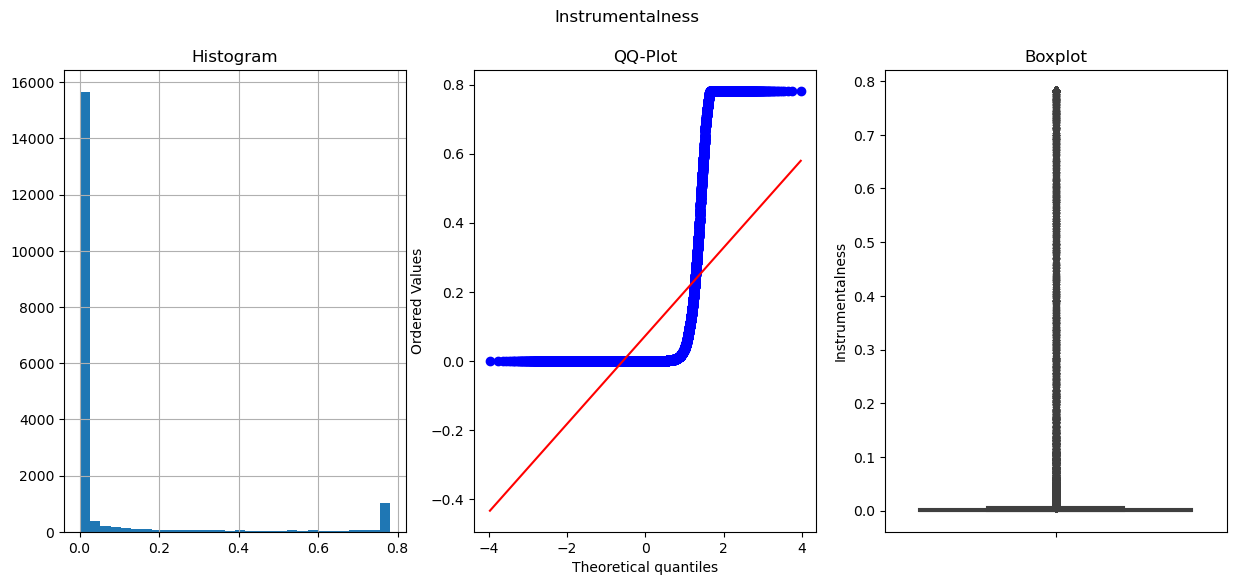

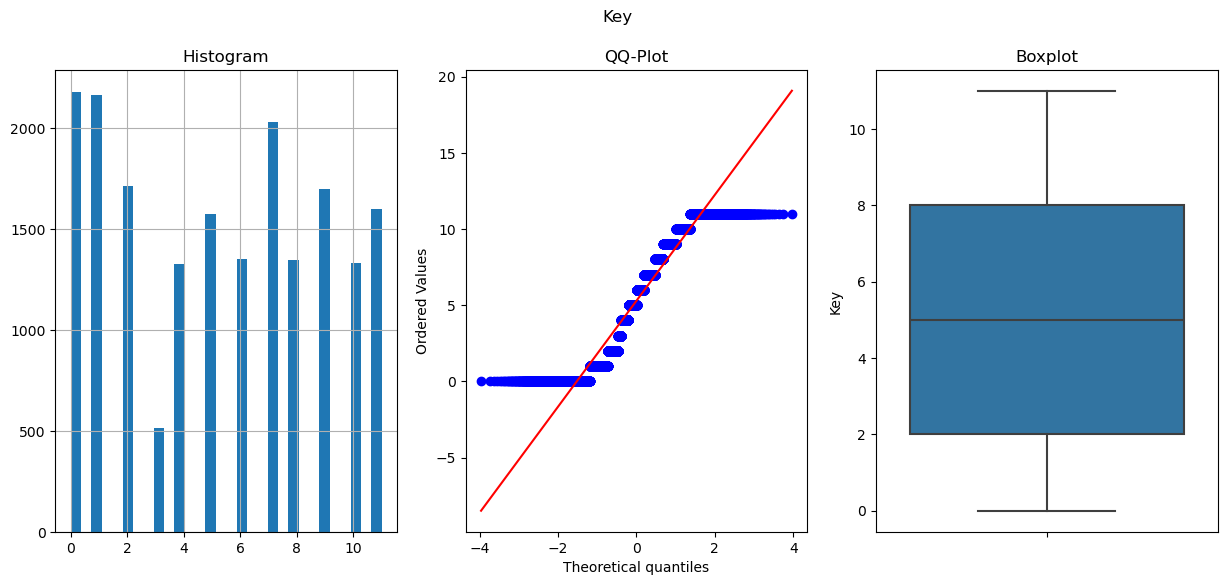

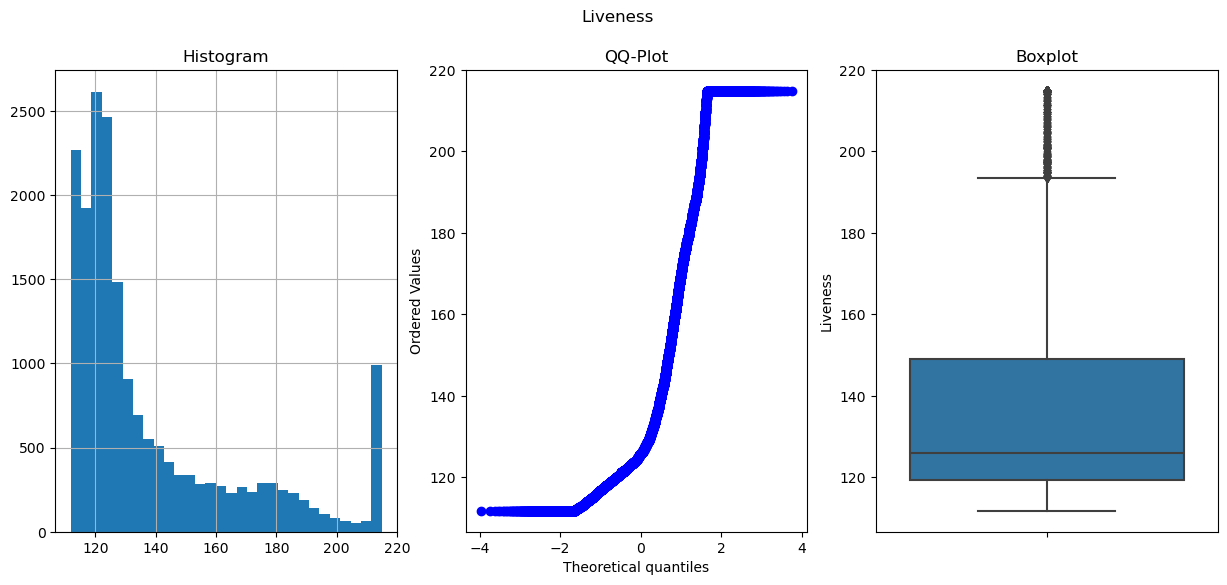

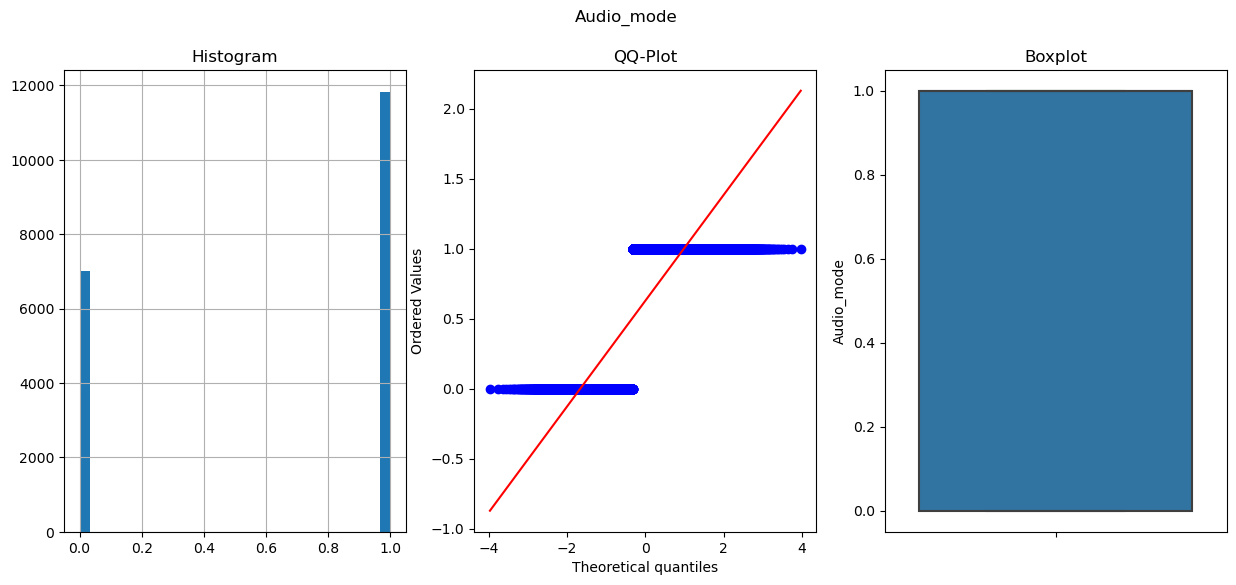

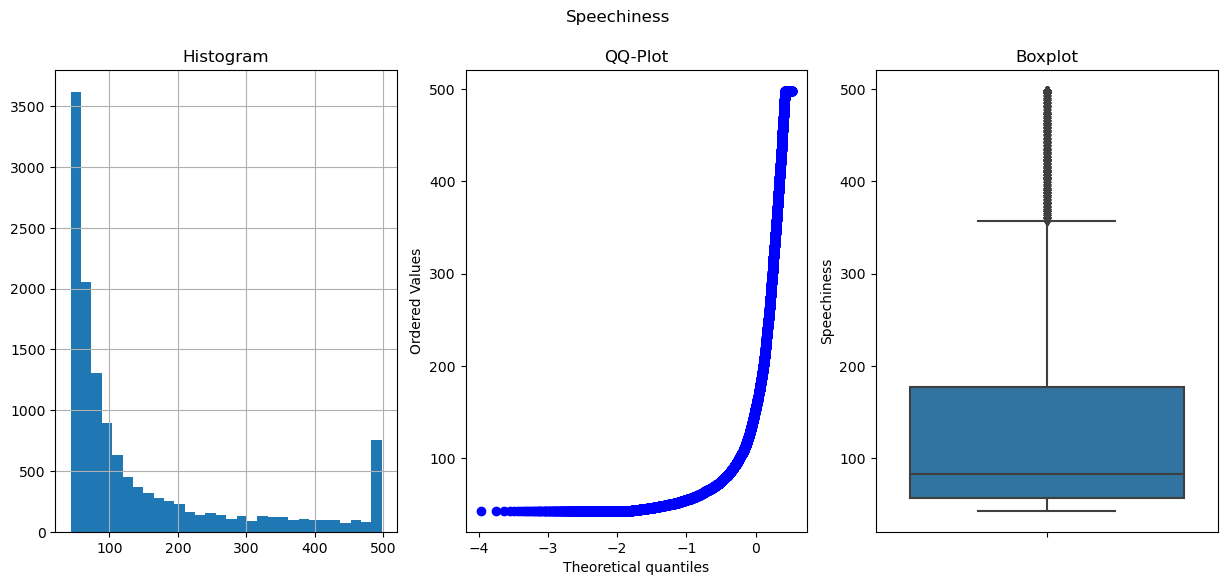

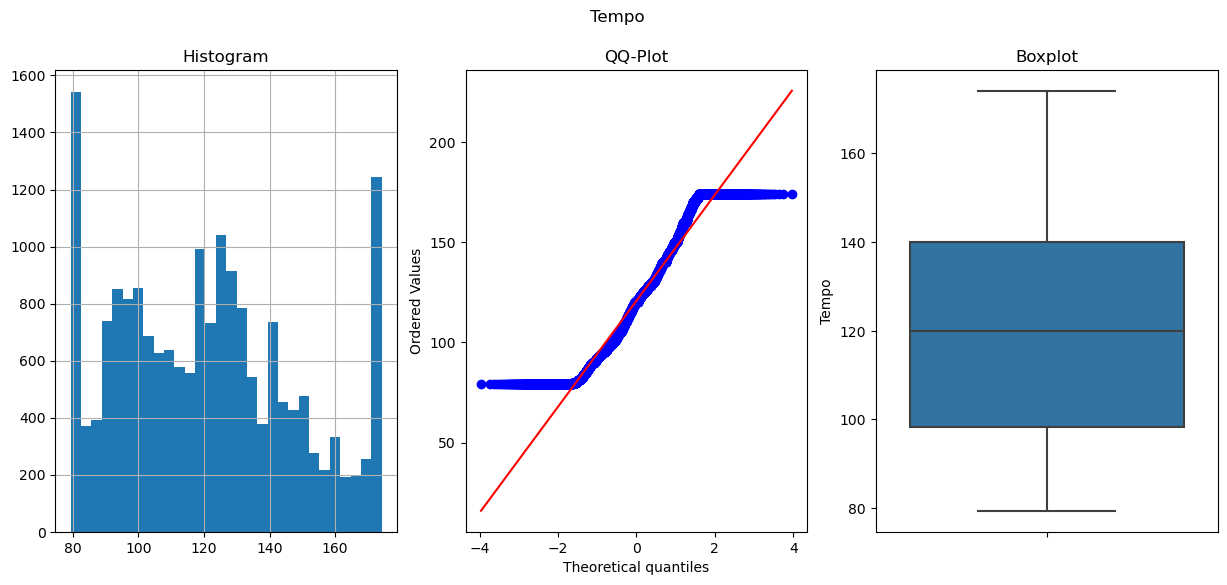

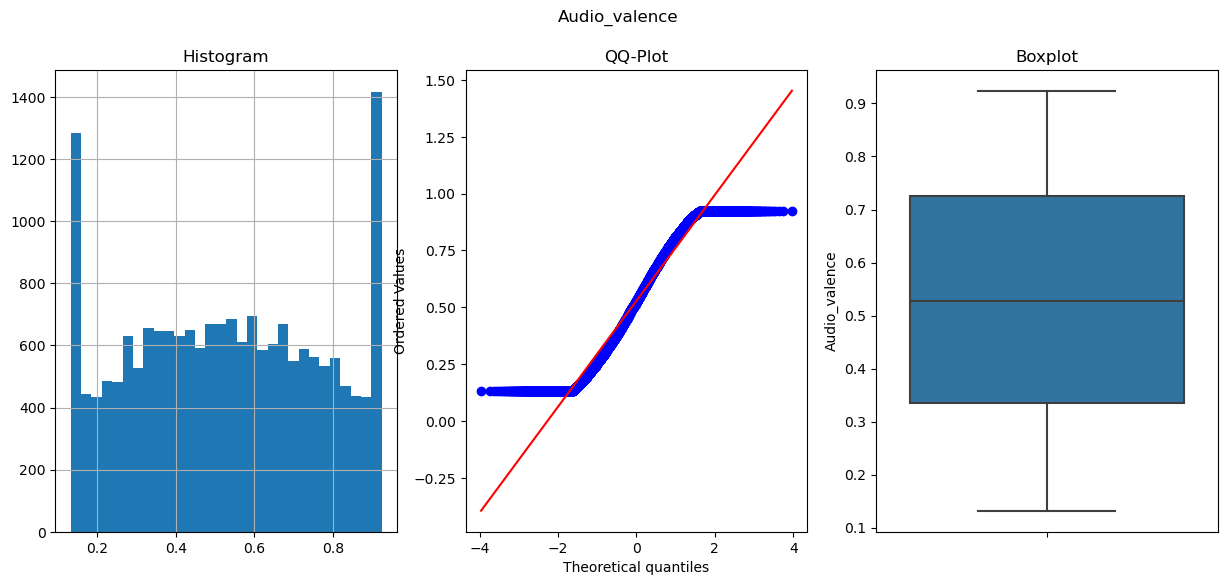

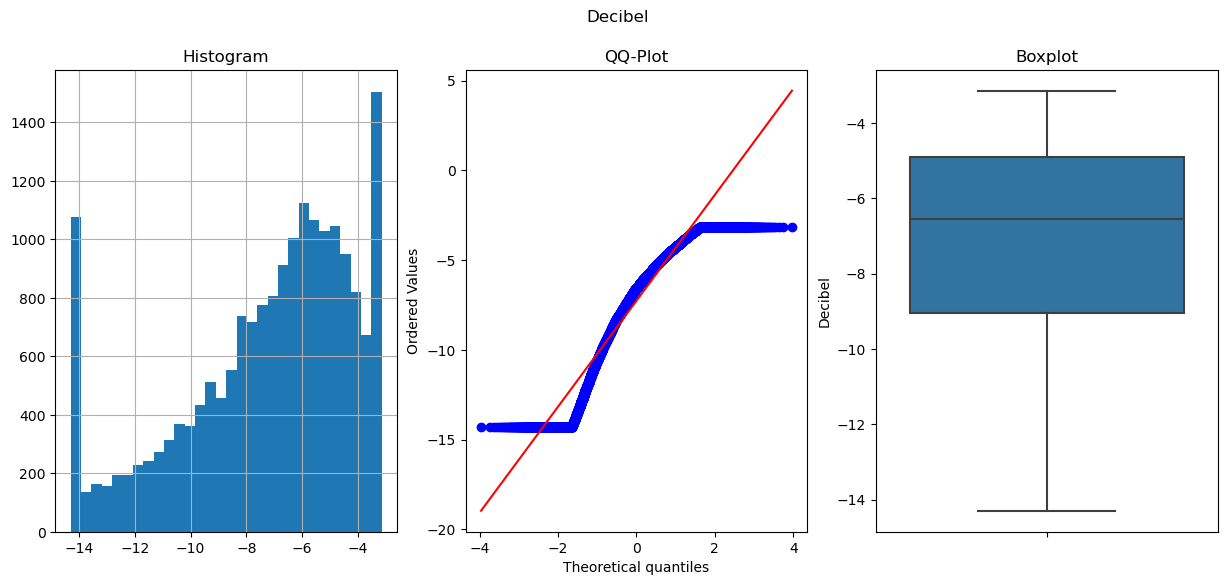

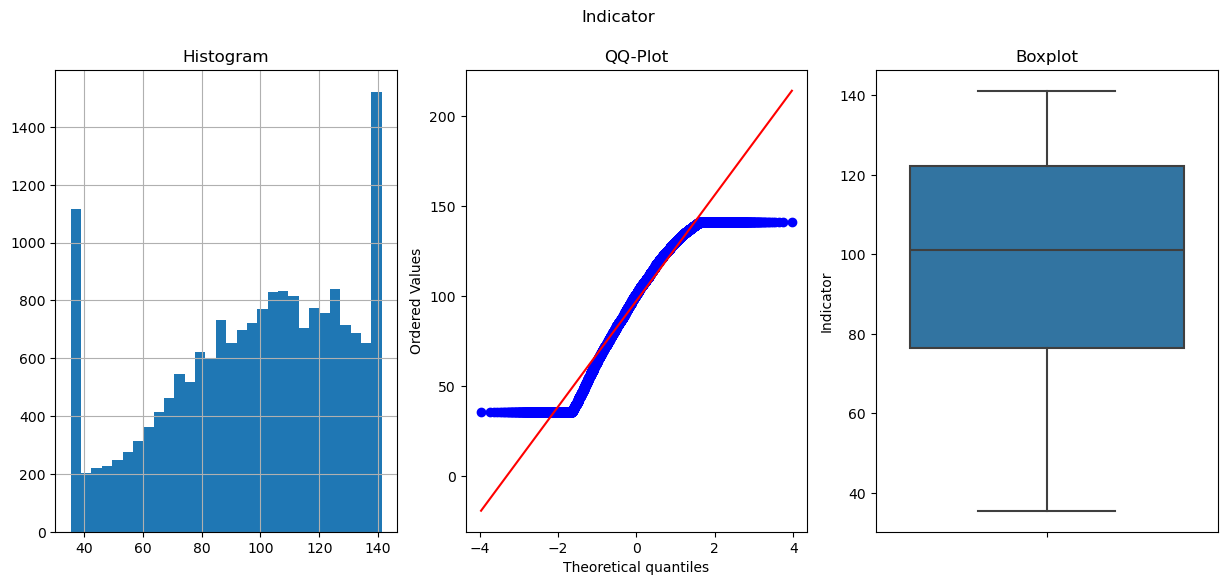

In [41]:
for cols in num_cols:
    data[cols] = winsorise(data, cols, data[cols].quantile(0.95), data[cols].quantile(0.05))
    diagnostic_plots(data, cols)

### Transformation of Numerical Columns <a id="step3.3"></a>

Prac 4

In [42]:
data_copy = data.copy()

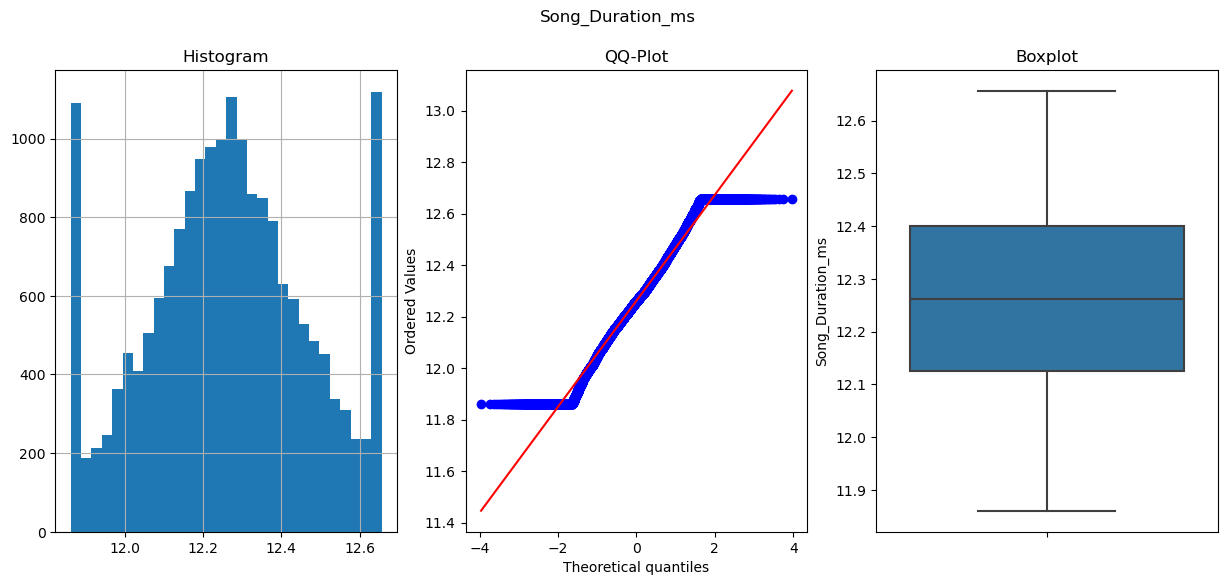

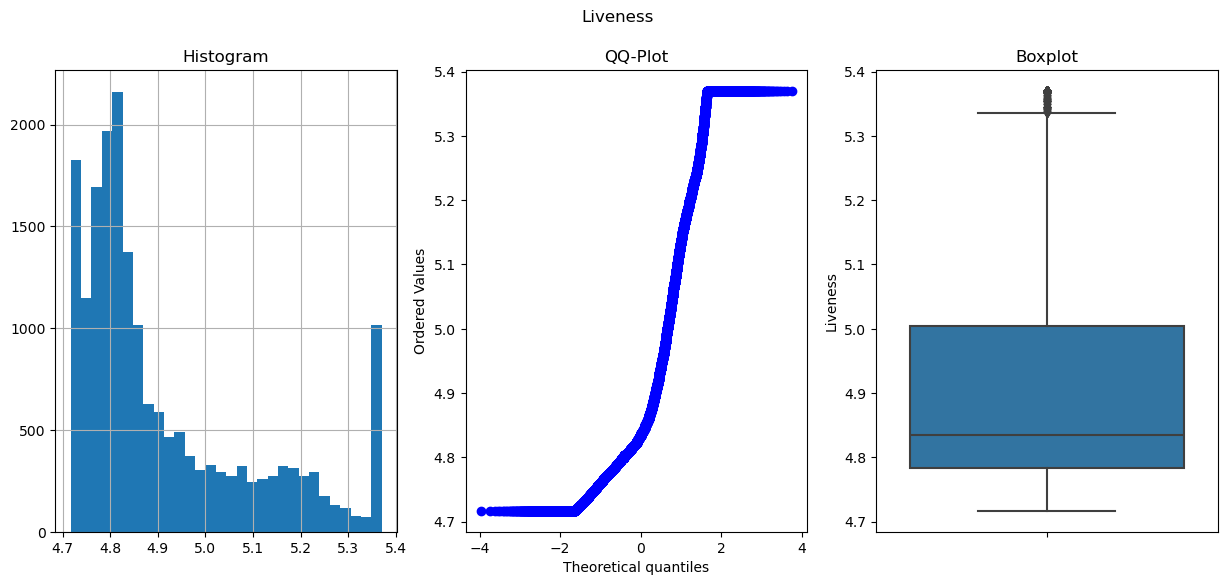

In [43]:
data_copy[['Song_Duration_ms', 'Liveness']]=np.log(data[['Song_Duration_ms', 'Liveness']])

diagnostic_plots(data_copy, 'Song_Duration_ms')
diagnostic_plots(data_copy, 'Liveness')

Optimal λ:  0.23018210430247532


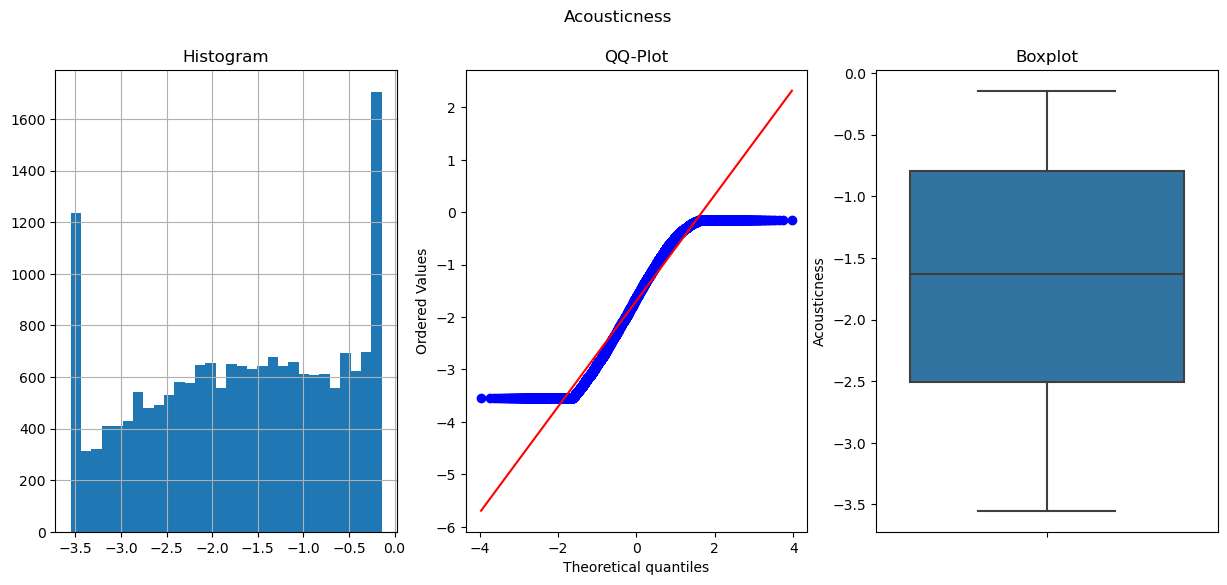

In [44]:
# apply the Box-Cox transformation
data_copy['Acousticness'], param = stats.boxcox(data['Acousticness']) 

# print the optimal lambda 
print('Optimal λ: ', param)

diagnostic_plots(data_copy, 'Acousticness')

Optimal λ for Indicator: 1.4386128563891183


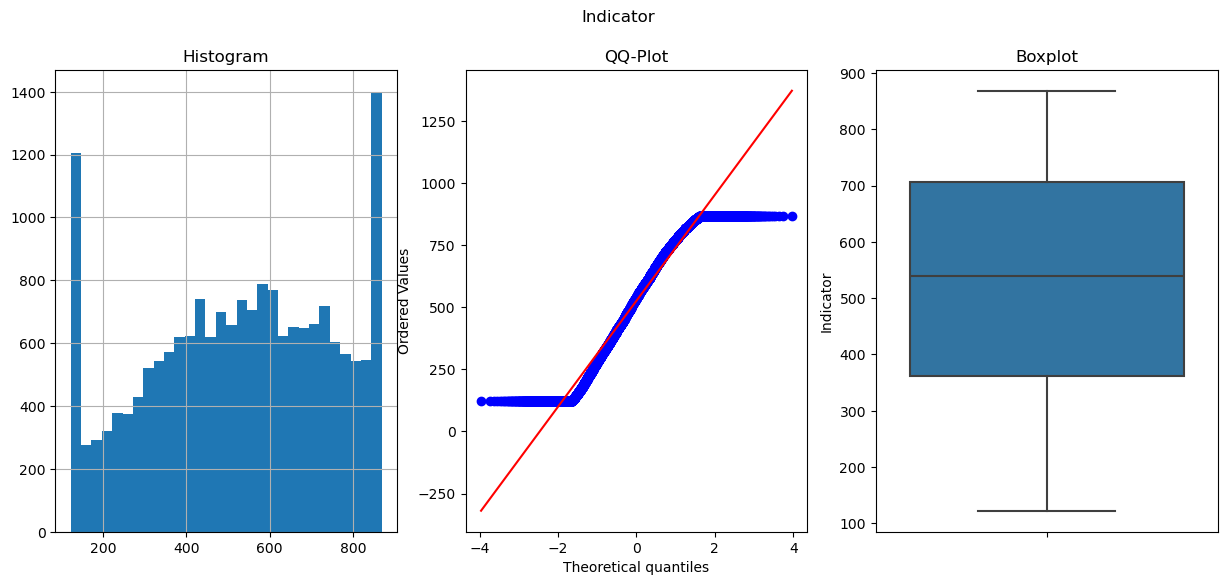

Optimal λ for Decibel: 2.206142912749121


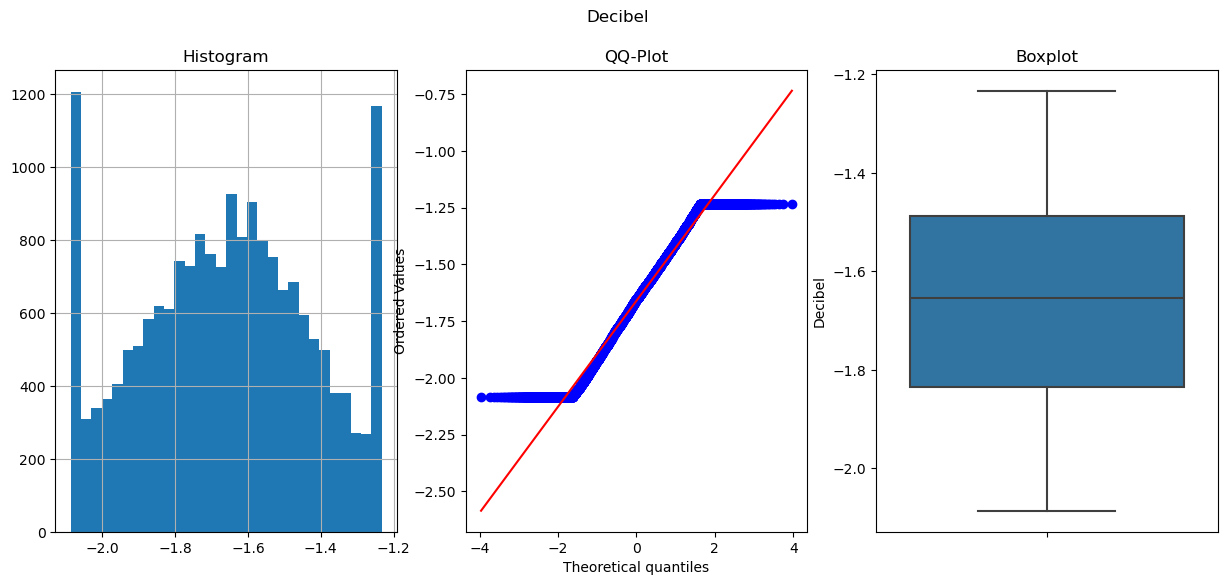

Optimal λ for Audio_valence: 0.7343413683181256


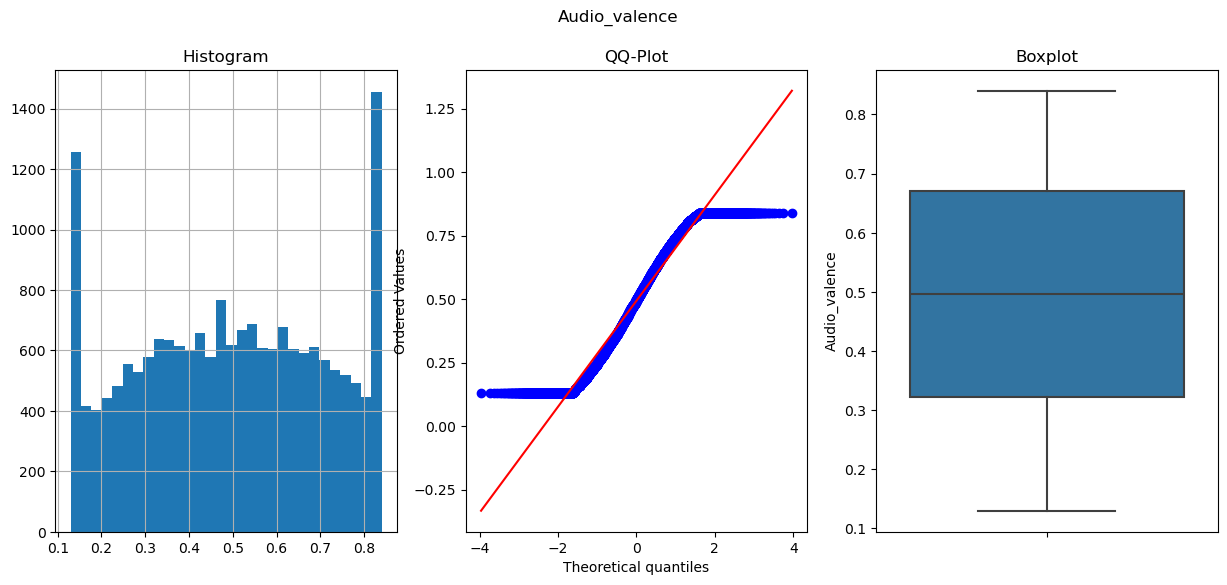

Optimal λ for Tempo: 0.07497839101837762


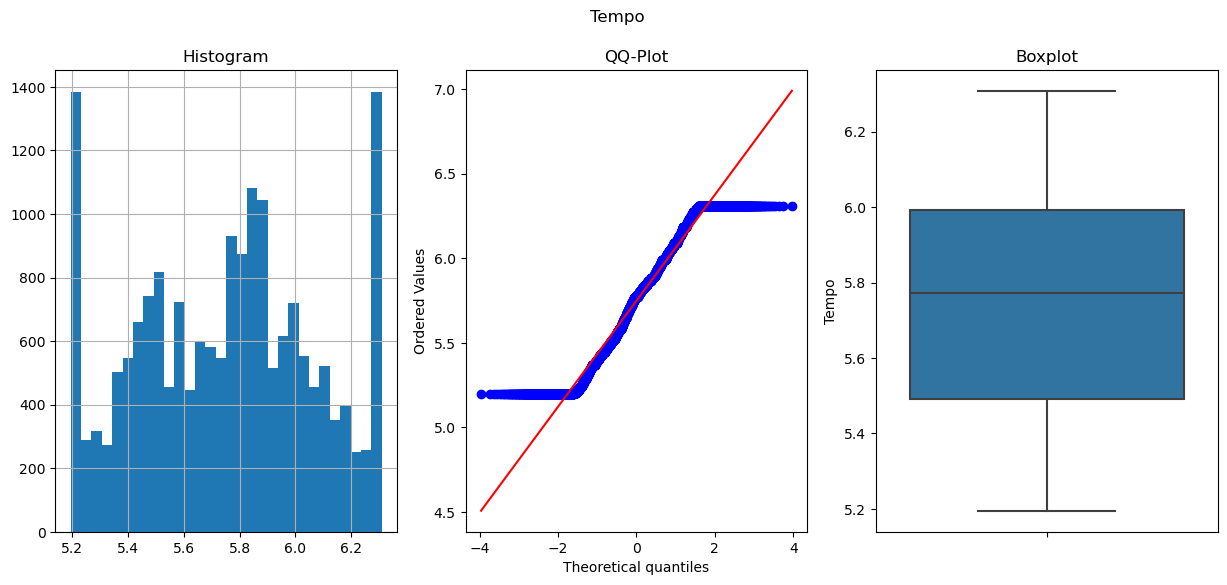

Optimal λ for Audio_mode: 2.3116176833644047


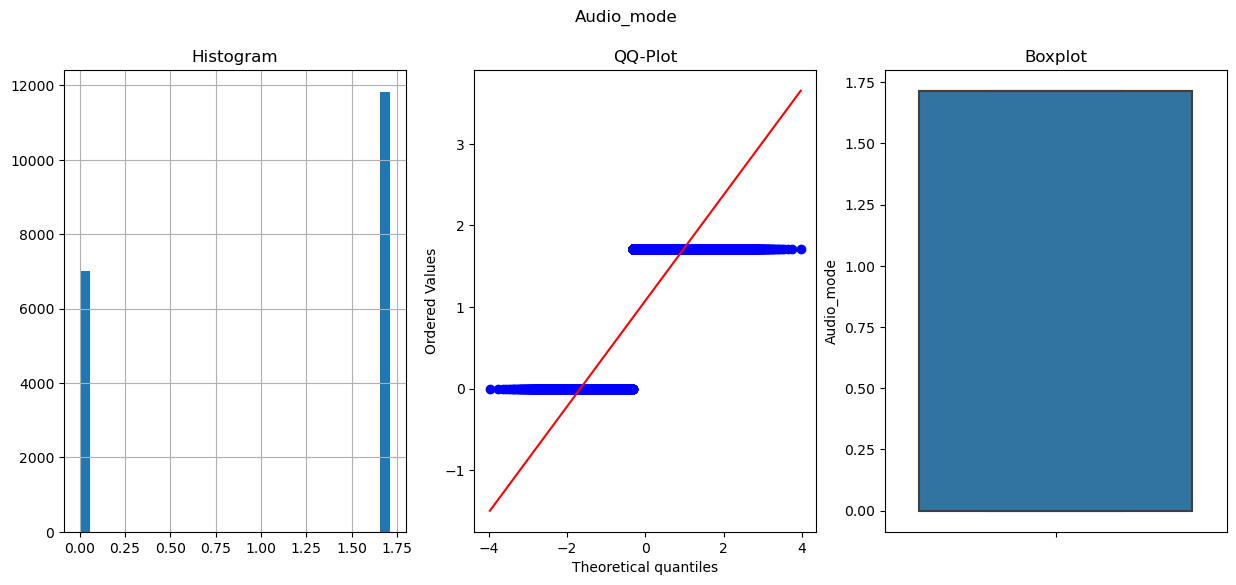

Optimal λ for Key: 0.6588507931464131


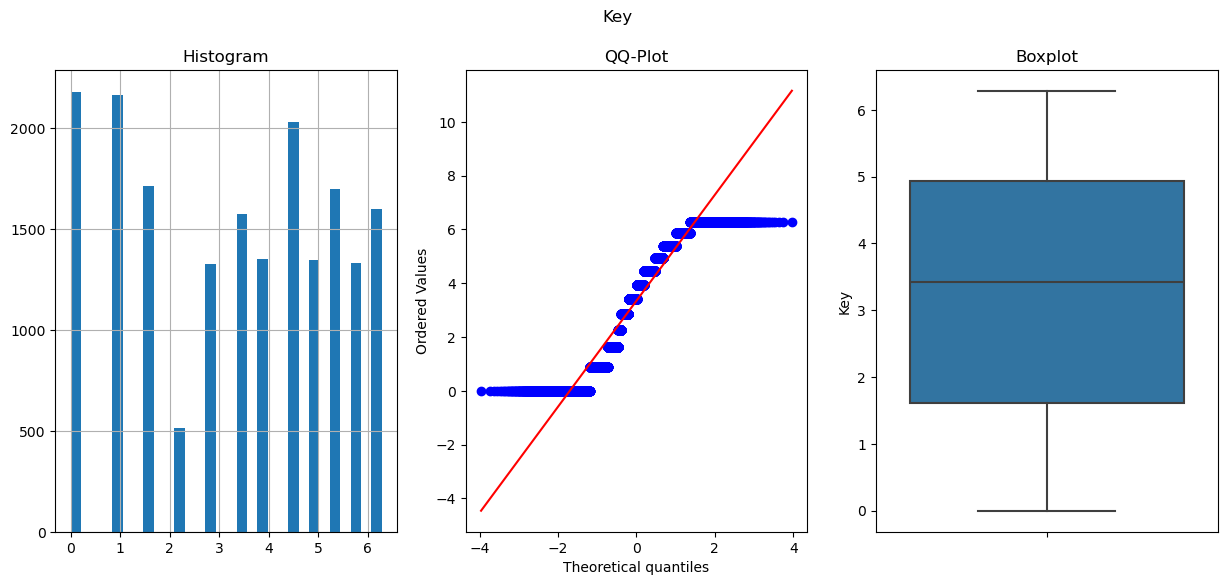

Optimal λ for Energy: 1.4430413338569117


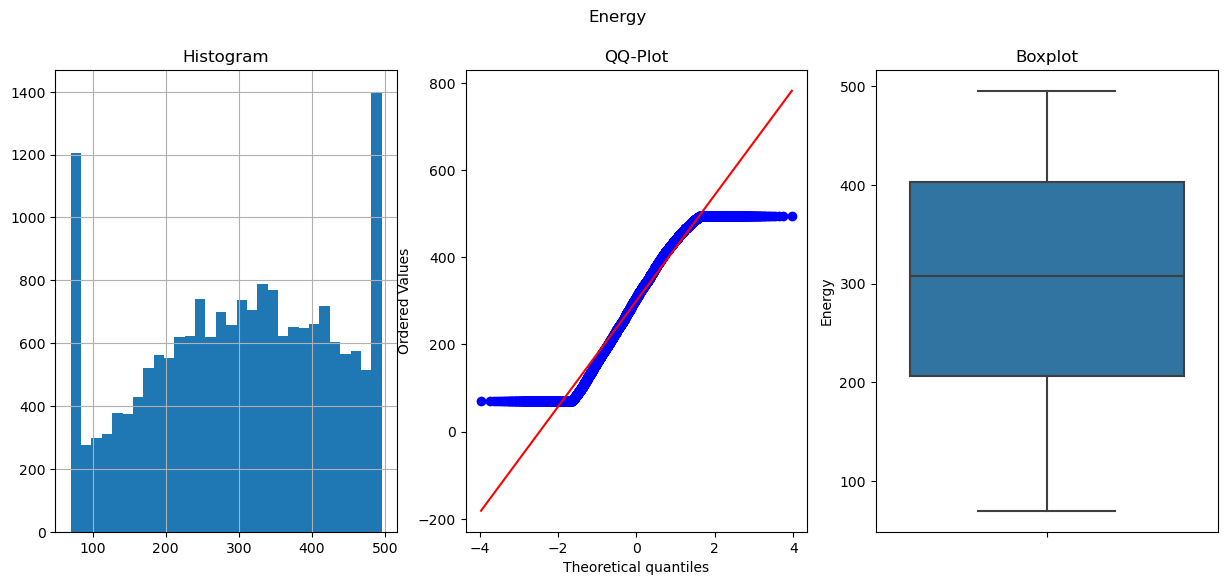

In [45]:
# Apply Yeo-Johnson transformation to each column separately
columns_yj = ['Indicator', 'Decibel', 'Audio_valence', 'Tempo', 'Audio_mode', 'Key', 'Energy']

for column in columns_yj:
    data_copy[column], param = stats.yeojohnson(data[column])
    print(f'Optimal λ for {column}: {param}')
    diagnostic_plots(data_copy, column)

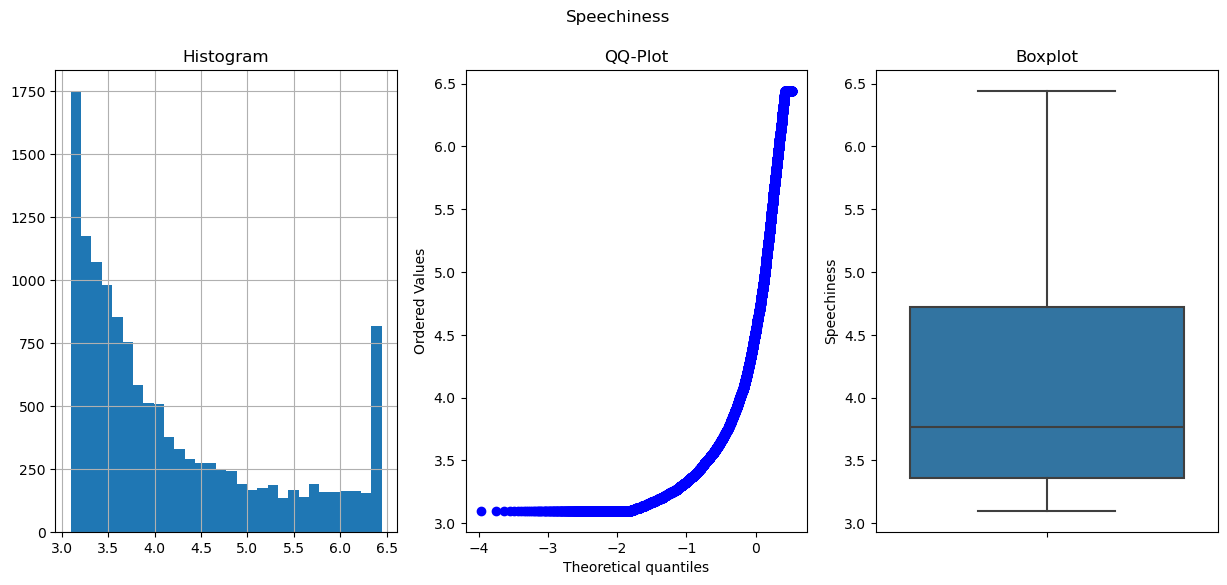

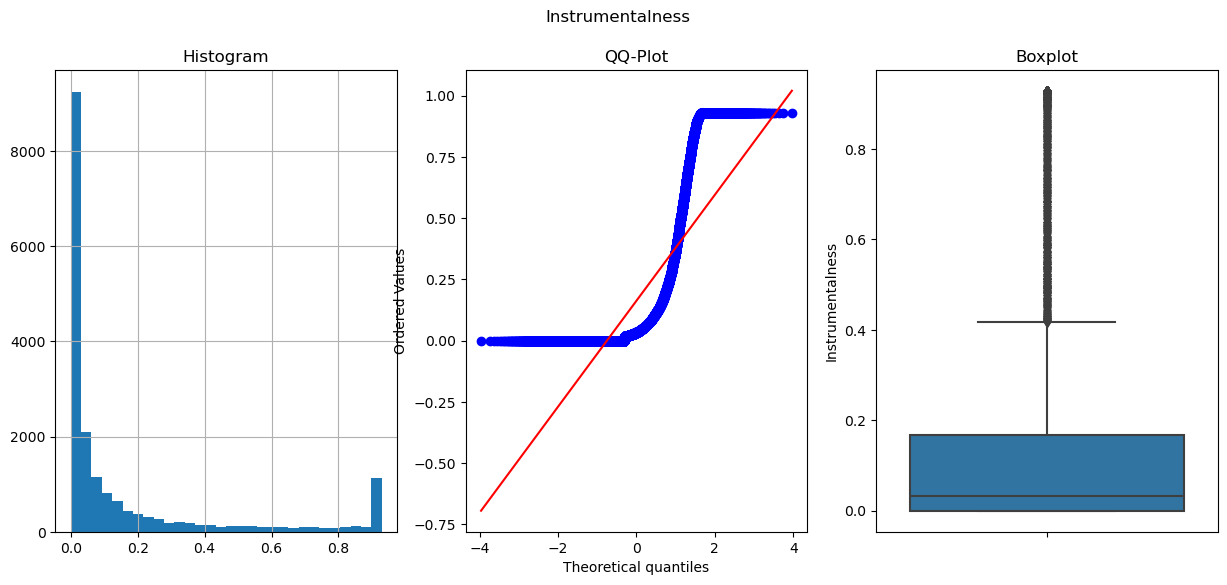

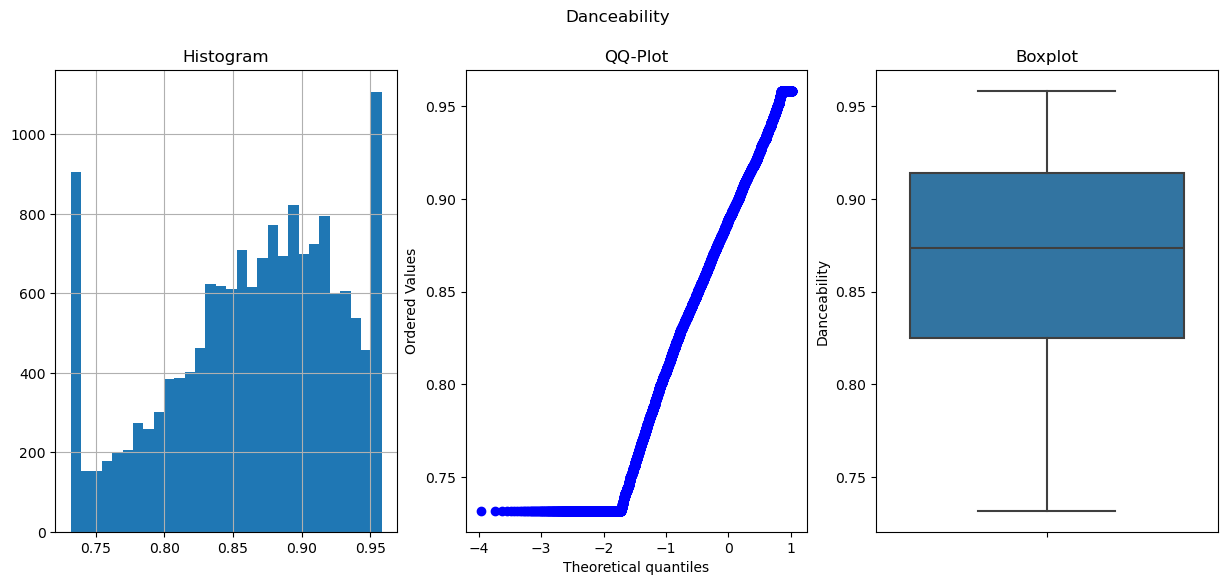

In [46]:
data_copy[['Speechiness', 'Instrumentalness', 'Danceability']] = np.power(data[['Speechiness', 'Instrumentalness', 'Danceability']], 0.3)

diagnostic_plots(data_copy, 'Speechiness')
diagnostic_plots(data_copy, 'Instrumentalness')
diagnostic_plots(data_copy, 'Danceability')

### Step 4: Train and Test Split <a id="step4"></a>

Split the data into train data (70%) and test data (30%) 

[back to top](#top)

In [47]:
data_copy.head()

Code                   Song_Name  Song_Duration_ms  Acousticness  \
0   HI8  Boulevard of Broken Dreams         12.477370     -3.037783   
1  HI10                  In The End         12.287344     -2.836045   
2  MI11           Seven Nation Army         12.353341     -2.914374   
3   EI8                  By The Way         12.287344     -2.471160   
4   HI9           How You Remind Me         12.318624     -3.472108   

   Danceability      Energy  Instrumentalness       Key  Liveness  Audio_mode  \
0      0.807858  312.686374          0.043702  4.937505  4.719631    1.714987   
1      0.829641  430.294674          0.000000  2.265591  4.810283    0.000000   
2      0.909768  180.280560          0.785402  0.000000  5.059441    1.714987   
3      0.785134  495.119530          0.184106  0.000000  4.799424    1.714987   
4      0.783038  369.024349          0.000000  5.849963  4.819288    1.714987   

   Speechiness     Tempo  Audio_valence Dynamism   Decibel Loudness  \
0     3.114093  6.247916       0.448895     high -1.383165    Blare   
1          NaN  5.586112       0.354173     high -1.640590     Roar   
2     4.192228  5.816662       0.311673   medium -1.754663     Roar   
3     4.588202  5.800048       0.193184    extra -1.490912    Blare   
4     3.173151  6.290598       0.538310     high -1.505538    Blare   

   Song_Popularity   Indicator  
0            57.72  548.297725  
1            45.37  754.632469  
2            47.28  315.854234  
3            52.89  868.316094  
4            46.68  647.152749

In [48]:
data_copy = data_copy.drop('Code', axis=1)
data_copy = data_copy.drop('Song_Name', axis=1)

In [49]:
data_copy.head()

Song_Duration_ms  Acousticness  Danceability      Energy  Instrumentalness  \
0         12.477370     -3.037783      0.807858  312.686374          0.043702   
1         12.287344     -2.836045      0.829641  430.294674          0.000000   
2         12.353341     -2.914374      0.909768  180.280560          0.785402   
3         12.287344     -2.471160      0.785134  495.119530          0.184106   
4         12.318624     -3.472108      0.783038  369.024349          0.000000   

        Key  Liveness  Audio_mode  Speechiness     Tempo  Audio_valence  \
0  4.937505  4.719631    1.714987     3.114093  6.247916       0.448895   
1  2.265591  4.810283    0.000000          NaN  5.586112       0.354173   
2  0.000000  5.059441    1.714987     4.192228  5.816662       0.311673   
3  0.000000  4.799424    1.714987     4.588202  5.800048       0.193184   
4  5.849963  4.819288    1.714987     3.173151  6.290598       0.538310   

  Dynamism   Decibel Loudness  Song_Popularity   Indicator  
0     high -1.383165    Blare            57.72  548.297725  
1     high -1.640590     Roar            45.37  754.632469  
2   medium -1.754663     Roar            47.28  315.854234  
3    extra -1.490912    Blare            52.89  868.316094  
4     high -1.505538    Blare            46.68  647.152749

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    data_copy.drop('Song_Popularity', axis=1), data_copy['Song_Popularity'], test_size=0.3, random_state=0)

X_train.shape,X_test.shape

((13184, 15), (5651, 15))

In [51]:
X_train.head()

Song_Duration_ms  Acousticness  Danceability      Energy  \
4659          12.206737     -1.059304      0.905673  329.817718   
4389          12.402075     -2.177514           NaN  253.768237   
10549         11.887319     -0.439514      0.881342  218.990055   
11105         11.942107     -0.143348      0.921802   70.173440   
3183          12.240213     -1.267461      0.842273  245.837466   

       Instrumentalness       Key  Liveness  Audio_mode  Speechiness  \
4659           0.000000  4.455508  5.202414    0.000000     6.444197   
4389           0.000000  0.878537  4.721142    1.714987     4.930478   
10549          0.192517  5.401531  4.788869    1.714987     3.542982   
11105          0.928885  2.864786  4.819288    1.714987          NaN   
3183           0.000000  0.878537  5.175528    1.714987     3.915941   

          Tempo  Audio_valence Dynamism   Decibel Loudness   Indicator  
4659   5.583814       0.397208     high -1.683614     Roar  578.360641  
4389   5.443068       0.155849   medium -1.458153    Blare  444.884975  
10549  5.998540       0.500052   medium -1.797951    Clang  383.827268  
11105  5.194880       0.648856      low -2.084006   Babble  122.458154  
3183   6.031814       0.416314   medium -1.673950     Roar  430.962465

In [52]:
X_test.head()

Song_Duration_ms  Acousticness  Danceability      Energy  \
15029         12.151469     -3.520626      0.731966  448.426273   
14172         12.296224     -2.231941      0.910878  304.226402   
5551          12.262198     -1.022564      0.909398  176.977176   
13488         12.424778     -0.353160      0.827338  245.837466   
5988          12.263728     -0.317267      0.884519  208.520757   

       Instrumentalness       Key  Liveness  Audio_mode  Speechiness  \
15029          0.085280  0.878537  5.015944    1.714987     4.062134   
14172          0.000000  0.000000  4.942967    1.714987     3.344568   
5551           0.000000  2.265591  4.847835    0.000000     5.389677   
13488          0.066974  4.455508  4.794335    1.714987     3.272851   
5988           0.356744  5.401531  4.756869    0.000000          NaN   

          Tempo  Audio_valence Dynamism   Decibel Loudness   Indicator  
15029  6.220284       0.442576     high -1.374971    Blare  786.433073  
14172  5.794960       0.504515     high -1.520575    Blare  533.450789  
5551   5.471180       0.427198   medium -1.645216     Roar  310.052931  
13488  5.484281       0.137539   medium -1.677636      NaN  430.962465  
5988   5.950434       0.413589   medium -1.754446     Roar  365.444782

### Step 5: Missing Value Imputation <a id="step5"></a>

Are there any missing values? How did you handle them and why? 

[back to top](#top)

In [53]:
data_copy[num_cols].isnull().mean().sort_values()

Song_Duration_ms    0.000000
Acousticness        0.000000
Energy              0.000000
Instrumentalness    0.000000
Key                 0.000000
Audio_mode          0.000000
Tempo               0.000000
Audio_valence       0.000000
Decibel             0.000000
Indicator           0.000000
Liveness            0.000053
Danceability        0.153809
Speechiness         0.300027
dtype: float64

In [54]:
cat_cols = [c for c in data_copy.columns if data_copy[c].dtypes=='O']
data_copy[cat_cols].isnull().mean().sort_values()

Loudness    0.100982
Dynamism    0.196337
dtype: float64

array([[<Axes: title={'center': 'Song_Duration_ms'}>,
        <Axes: title={'center': 'Acousticness'}>,
        <Axes: title={'center': 'Danceability'}>,
        <Axes: title={'center': 'Energy'}>],
       [<Axes: title={'center': 'Instrumentalness'}>,
        <Axes: title={'center': 'Key'}>,
        <Axes: title={'center': 'Liveness'}>,
        <Axes: title={'center': 'Audio_mode'}>],
       [<Axes: title={'center': 'Speechiness'}>,
        <Axes: title={'center': 'Tempo'}>,
        <Axes: title={'center': 'Audio_valence'}>,
        <Axes: title={'center': 'Decibel'}>],
       [<Axes: title={'center': 'Indicator'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

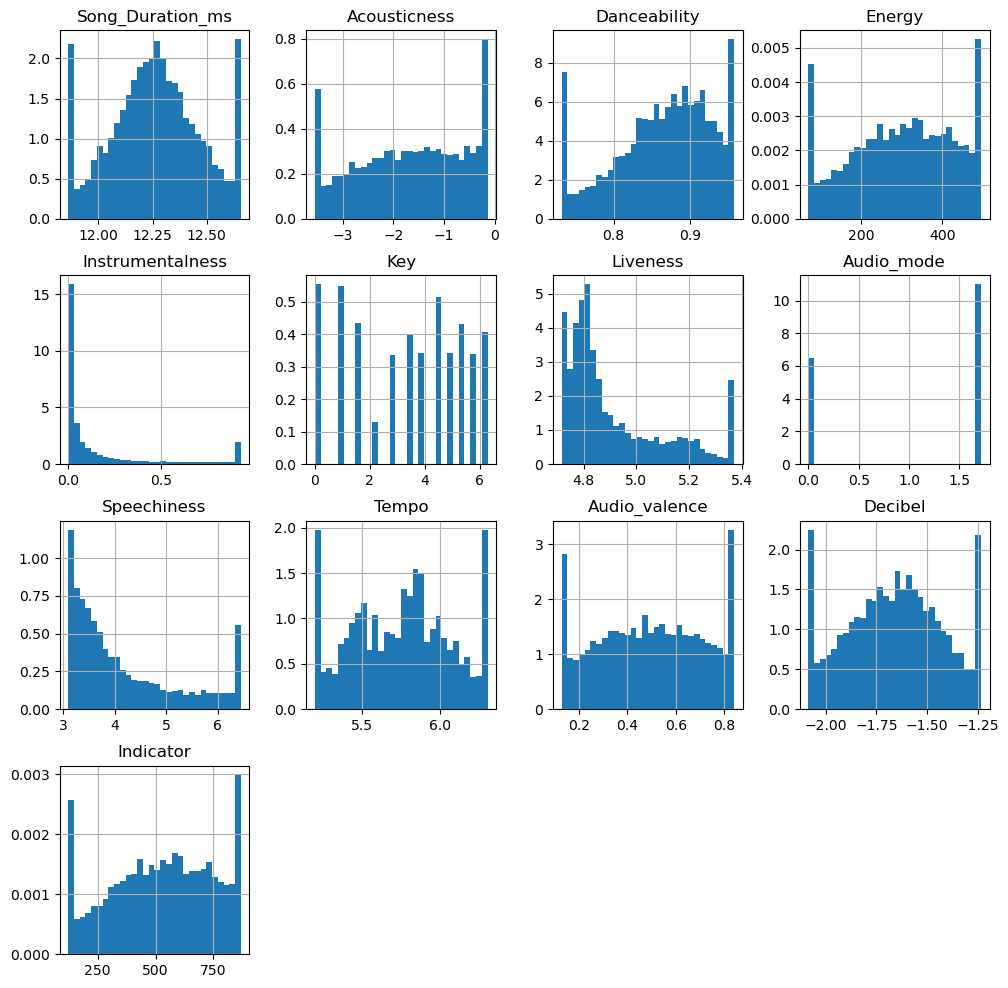

In [55]:
data_copy[num_cols].hist(bins=30, figsize=(12,12), density=True)

### Assembling Imputation Pipeline with Feature-Engine <a id="step5.1"></a>

Prac 2.10

In [56]:
num_arbitrary= ['Speechiness']
num_median=['Liveness','Danceability']

cat_frequent=['Dynamism', 'Loudness']

In [57]:
pipe = Pipeline(steps=[
    ('imp_num_arbitrary', mdi.ArbitraryNumberImputer(variables = num_arbitrary)),
    ('imp_num_median', mdi.MeanMedianImputer(imputation_method = 'median', variables=num_median)),
    ('imp_cat_frequent', mdi.CategoricalImputer(variables = cat_frequent, imputation_method='frequent')),
])

In [58]:
pipe.fit(X_train)

Pipeline(steps=[('imp_num_arbitrary',
                 ArbitraryNumberImputer(variables=['Speechiness'])),
                ('imp_num_median',
                 MeanMedianImputer(variables=['Liveness', 'Danceability'])),
                ('imp_cat_frequent',
                 CategoricalImputer(imputation_method='frequent',
                                    variables=['Dynamism', 'Loudness']))])

In [59]:
X_train = pipe.transform(X_train)
X_test = pipe.transform(X_test)

In [60]:
X_train.isnull().sum()

Song_Duration_ms    0
Acousticness        0
Danceability        0
Energy              0
Instrumentalness    0
Key                 0
Liveness            0
Audio_mode          0
Speechiness         0
Tempo               0
Audio_valence       0
Dynamism            0
Decibel             0
Loudness            0
Indicator           0
dtype: int64

In [61]:
X_test.isnull().sum()

Song_Duration_ms    0
Acousticness        0
Danceability        0
Energy              0
Instrumentalness    0
Key                 0
Liveness            0
Audio_mode          0
Speechiness         0
Tempo               0
Audio_valence       0
Dynamism            0
Decibel             0
Loudness            0
Indicator           0
dtype: int64

In [62]:
num_cols = [c for c in X_train.columns if data[c].dtypes !='O']
num_cols

['Song_Duration_ms',
 'Acousticness',
 'Danceability',
 'Energy',
 'Instrumentalness',
 'Key',
 'Liveness',
 'Audio_mode',
 'Speechiness',
 'Tempo',
 'Audio_valence',
 'Decibel',
 'Indicator']

In [63]:
# Build Linear Regression Model
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train[num_cols], y_train)

# Evaluate the Linear Regression Model using Mean Square Error (MSE)
# The lower MSE, the better the model performance
print('train_mse:', mean_squared_error(y_train, model_linear_regression.predict(X_train[num_cols])), 
      '\n test_mse:', mean_squared_error(y_test, model_linear_regression.predict(X_test[num_cols])))

# Evaluate the Linear Regression Model using R-Square
# The closer the r-square value to 1, the better the model performance
print('train_r-sq:', r2_score(y_train, model_linear_regression.predict(X_train[num_cols])), 
      '\n test_r-sq:', r2_score(y_test, model_linear_regression.predict(X_test[num_cols])))

train_mse: 116.25785672682714 
 test_mse: 116.37872483957399
train_r-sq: 0.40140062315555236 
 test_r-sq: 0.40455413291272235


### Step 6: Categorical Data Encoding <a id="step6"></a>

Do you need to encode the Categorical Data? What methods do you use and why? 

[back to top](#top)

### Grouping Rare Categories  <a id="step6.1"></a>

prac 3.7

In [64]:
rare_encoder = RareLabelEncoder(tol=0.05, n_categories=5)  

In [65]:
rare_encoder.fit(X_train)

C:\Users\leong\anaconda3\Lib\site-packages\feature_engine\encoding\rare_label.py:216: UserWarning: The number of unique categories for variable Dynamism is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(


RareLabelEncoder(n_categories=5)

In [66]:
rare_encoder.variables

In [67]:
rare_encoder.encoder_dict_

{'Dynamism': ['high', 'medium', 'low', 'extra'],
 'Loudness': ['Blare', 'Roar', 'Clang', 'Boom', 'Rumble', 'Babble']}

In [68]:
X_train_enc = rare_encoder.transform(X_train)
X_test_enc = rare_encoder.transform(X_test)

In [69]:
X_train_enc.head()

Song_Duration_ms  Acousticness  Danceability      Energy  \
4659          12.206737     -1.059304      0.905673  329.817718   
4389          12.402075     -2.177514      0.873688  253.768237   
10549         11.887319     -0.439514      0.881342  218.990055   
11105         11.942107     -0.143348      0.921802   70.173440   
3183          12.240213     -1.267461      0.842273  245.837466   

       Instrumentalness       Key  Liveness  Audio_mode  Speechiness  \
4659           0.000000  4.455508  5.202414    0.000000     6.444197   
4389           0.000000  0.878537  4.721142    1.714987     4.930478   
10549          0.192517  5.401531  4.788869    1.714987     3.542982   
11105          0.928885  2.864786  4.819288    1.714987   999.000000   
3183           0.000000  0.878537  5.175528    1.714987     3.915941   

          Tempo  Audio_valence Dynamism   Decibel Loudness   Indicator  
4659   5.583814       0.397208     high -1.683614     Roar  578.360641  
4389   5.443068       0.155849   medium -1.458153    Blare  444.884975  
10549  5.998540       0.500052   medium -1.797951    Clang  383.827268  
11105  5.194880       0.648856      low -2.084006   Babble  122.458154  
3183   6.031814       0.416314   medium -1.673950     Roar  430.962465

In [70]:
X_test_enc.head()

Song_Duration_ms  Acousticness  Danceability      Energy  \
15029         12.151469     -3.520626      0.731966  448.426273   
14172         12.296224     -2.231941      0.910878  304.226402   
5551          12.262198     -1.022564      0.909398  176.977176   
13488         12.424778     -0.353160      0.827338  245.837466   
5988          12.263728     -0.317267      0.884519  208.520757   

       Instrumentalness       Key  Liveness  Audio_mode  Speechiness  \
15029          0.085280  0.878537  5.015944    1.714987     4.062134   
14172          0.000000  0.000000  4.942967    1.714987     3.344568   
5551           0.000000  2.265591  4.847835    0.000000     5.389677   
13488          0.066974  4.455508  4.794335    1.714987     3.272851   
5988           0.356744  5.401531  4.756869    0.000000   999.000000   

          Tempo  Audio_valence Dynamism   Decibel Loudness   Indicator  
15029  6.220284       0.442576     high -1.374971    Blare  786.433073  
14172  5.794960       0.504515     high -1.520575    Blare  533.450789  
5551   5.471180       0.427198   medium -1.645216     Roar  310.052931  
13488  5.484281       0.137539   medium -1.677636    Blare  430.962465  
5988   5.950434       0.413589   medium -1.754446     Roar  365.444782

### Target Mean Encoding with Feature-Engine  <a id="step6.2"></a>

Prac 3.6

In [71]:
mean_enc = MeanEncoder(variables=None)

In [72]:
mean_enc.fit(X_train_enc, y_train)

MeanEncoder()

In [73]:
mean_enc.variables

In [74]:
mean_enc.encoder_dict_

{'Dynamism': {'extra': 48.71418011894647,
  'high': 44.67783895131086,
  'low': 28.554556962025316,
  'medium': 36.72514714047752},
 'Loudness': {'Babble': 30.51065743944637,
  'Blare': 46.16423930921052,
  'Boom': 55.29558007117437,
  'Clang': 36.313889845094664,
  'Rare': 35.64798701298701,
  'Roar': 41.041693491952415,
  'Rumble': 33.52444670050762}}

In [75]:
X_train_enc = mean_enc.transform(X_train_enc)
X_test_enc = mean_enc.transform(X_test_enc)

In [76]:
X_train_enc.head()

Song_Duration_ms  Acousticness  Danceability      Energy  \
4659          12.206737     -1.059304      0.905673  329.817718   
4389          12.402075     -2.177514      0.873688  253.768237   
10549         11.887319     -0.439514      0.881342  218.990055   
11105         11.942107     -0.143348      0.921802   70.173440   
3183          12.240213     -1.267461      0.842273  245.837466   

       Instrumentalness       Key  Liveness  Audio_mode  Speechiness  \
4659           0.000000  4.455508  5.202414    0.000000     6.444197   
4389           0.000000  0.878537  4.721142    1.714987     4.930478   
10549          0.192517  5.401531  4.788869    1.714987     3.542982   
11105          0.928885  2.864786  4.819288    1.714987   999.000000   
3183           0.000000  0.878537  5.175528    1.714987     3.915941   

          Tempo  Audio_valence   Dynamism   Decibel   Loudness   Indicator  
4659   5.583814       0.397208  44.677839 -1.683614  41.041693  578.360641  
4389   5.443068       0.155849  36.725147 -1.458153  46.164239  444.884975  
10549  5.998540       0.500052  36.725147 -1.797951  36.313890  383.827268  
11105  5.194880       0.648856  28.554557 -2.084006  30.510657  122.458154  
3183   6.031814       0.416314  36.725147 -1.673950  41.041693  430.962465

In [77]:
X_test_enc.head()

Song_Duration_ms  Acousticness  Danceability      Energy  \
15029         12.151469     -3.520626      0.731966  448.426273   
14172         12.296224     -2.231941      0.910878  304.226402   
5551          12.262198     -1.022564      0.909398  176.977176   
13488         12.424778     -0.353160      0.827338  245.837466   
5988          12.263728     -0.317267      0.884519  208.520757   

       Instrumentalness       Key  Liveness  Audio_mode  Speechiness  \
15029          0.085280  0.878537  5.015944    1.714987     4.062134   
14172          0.000000  0.000000  4.942967    1.714987     3.344568   
5551           0.000000  2.265591  4.847835    0.000000     5.389677   
13488          0.066974  4.455508  4.794335    1.714987     3.272851   
5988           0.356744  5.401531  4.756869    0.000000   999.000000   

          Tempo  Audio_valence   Dynamism   Decibel   Loudness   Indicator  
15029  6.220284       0.442576  44.677839 -1.374971  46.164239  786.433073  
14172  5.794960       0.504515  44.677839 -1.520575  46.164239  533.450789  
5551   5.471180       0.427198  36.725147 -1.645216  41.041693  310.052931  
13488  5.484281       0.137539  36.725147 -1.677636  46.164239  430.962465  
5988   5.950434       0.413589  36.725147 -1.754446  41.041693  365.444782

In [78]:
X_train_enc.isnull().sum()

Song_Duration_ms    0
Acousticness        0
Danceability        0
Energy              0
Instrumentalness    0
Key                 0
Liveness            0
Audio_mode          0
Speechiness         0
Tempo               0
Audio_valence       0
Dynamism            0
Decibel             0
Loudness            0
Indicator           0
dtype: int64

In [79]:
X_test_enc.isnull().sum()

Song_Duration_ms    0
Acousticness        0
Danceability        0
Energy              0
Instrumentalness    0
Key                 0
Liveness            0
Audio_mode          0
Speechiness         0
Tempo               0
Audio_valence       0
Dynamism            0
Decibel             0
Loudness            0
Indicator           0
dtype: int64

array([[<Axes: title={'center': 'Song_Duration_ms'}>,
        <Axes: title={'center': 'Acousticness'}>,
        <Axes: title={'center': 'Danceability'}>,
        <Axes: title={'center': 'Energy'}>],
       [<Axes: title={'center': 'Instrumentalness'}>,
        <Axes: title={'center': 'Key'}>,
        <Axes: title={'center': 'Liveness'}>,
        <Axes: title={'center': 'Audio_mode'}>],
       [<Axes: title={'center': 'Speechiness'}>,
        <Axes: title={'center': 'Tempo'}>,
        <Axes: title={'center': 'Audio_valence'}>,
        <Axes: title={'center': 'Dynamism'}>],
       [<Axes: title={'center': 'Decibel'}>,
        <Axes: title={'center': 'Loudness'}>,
        <Axes: title={'center': 'Indicator'}>, <Axes: >]], dtype=object)

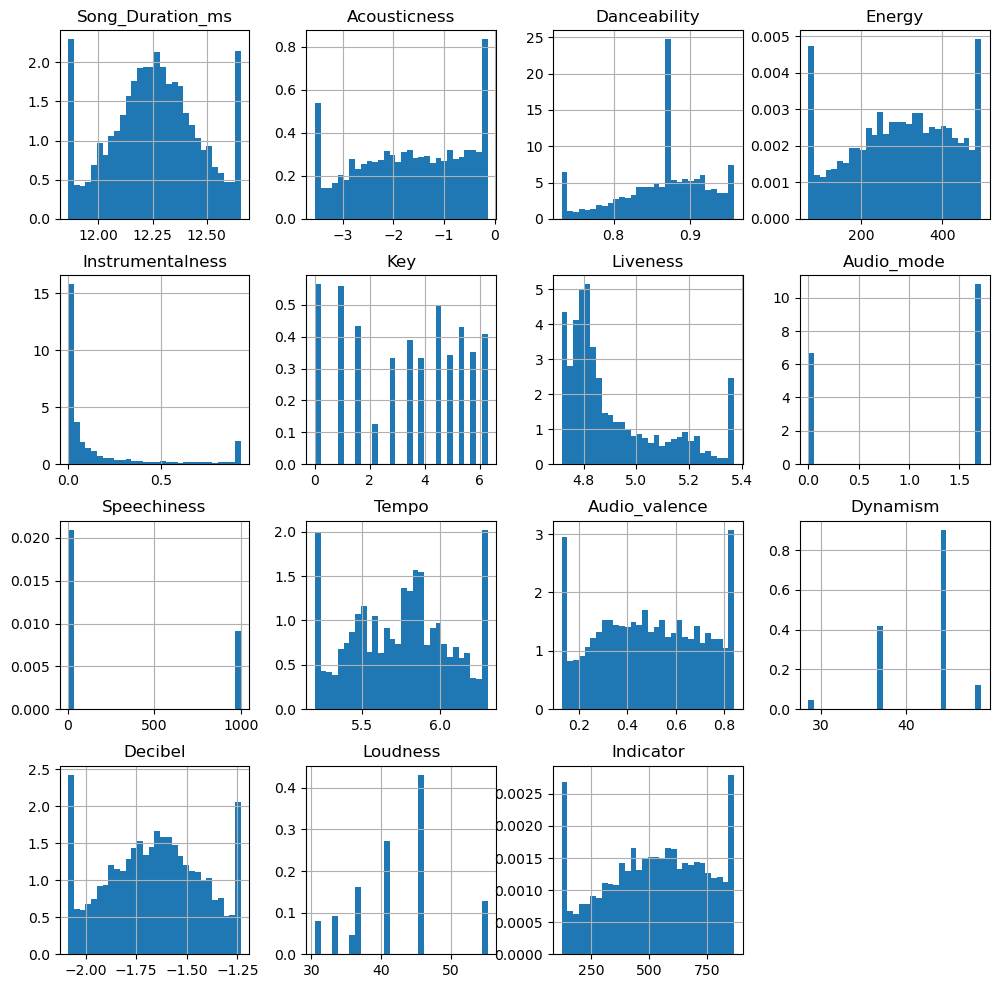

In [80]:
X_test_enc.hist(bins=30, figsize=(12,12), density=True)

In [81]:
# Build Linear Regression Model
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train_enc, y_train)

# Evaluate the Linear Regression Model using Mean Square Error (MSE)
# The lower MSE, the better the model performance
print('train_mse:', mean_squared_error(y_train, model_linear_regression.predict(X_train_enc)), 
      '\n test_mse:', mean_squared_error(y_test, model_linear_regression.predict(X_test_enc)))

# Evaluate the Linear Regression Model using R-Square
# The closer the r-square value to 1, the better the model performance
print('train_r-sq:', r2_score(y_train, model_linear_regression.predict(X_train_enc)), 
      '\n test_r-sq:', r2_score(y_test, model_linear_regression.predict(X_test_enc)))

train_mse: 116.17321033654699 
 test_mse: 116.41530412920292
train_r-sq: 0.4018364584435957 
 test_r-sq: 0.4043669768250392


In [82]:
data_copy['Song_Popularity'].describe()

count    18835.000000
mean        42.357670
std         13.949829
min          0.000000
25%         32.790000
50%         42.730000
75%         52.290000
max         99.320000
Name: Song_Popularity, dtype: float64

### Step 7: Variable Discretization /Binning <a id="step7"></a>

Do you need to discretize /bin the Numerical Data? What methods do you use and why?

[back to top](#top)

### Equal-width discretization with Feature-engine <a id="step7.1"></a>

Prac 5.1

In [83]:
disc = EqualFrequencyDiscretiser(q=10, variables = num_cols)

disc.fit(X_train_enc)

EqualFrequencyDiscretiser(variables=['Song_Duration_ms', 'Acousticness',
                                     'Danceability', 'Energy',
                                     'Instrumentalness', 'Key', 'Liveness',
                                     'Audio_mode', 'Speechiness', 'Tempo',
                                     'Audio_valence', 'Decibel', 'Indicator'])

In [84]:
disc.binner_dict_

{'Song_Duration_ms': [-inf,
  11.979691980932918,
  12.088426972671492,
  12.157092463308455,
  12.211407389726418,
  12.261862067172215,
  12.307965656335673,
  12.367225892175016,
  12.4439928818624,
  12.554844279212574,
  inf],
 'Acousticness': [-inf,
  -3.220405956105215,
  -2.7391273014302553,
  -2.323598833303525,
  -1.9770165602895182,
  -1.6264757647592154,
  -1.299063352159625,
  -0.9825028990997907,
  -0.613940767148032,
  -0.29226989478820187,
  inf],
 'Danceability': [-inf,
  0.7798698580940573,
  0.8222166775826623,
  0.8471170015942647,
  0.8691838963003535,
  0.8736878950216456,
  0.877735942876149,
  0.8965854608682875,
  0.9163779780058603,
  0.9383334000336022,
  inf],
 'Energy': [-inf,
  119.40278707495119,
  184.71400930610022,
  229.6148447474342,
  269.8587549843983,
  308.7729399330128,
  343.8571283373522,
  383.5484415941898,
  423.10657237526095,
  469.00369889995113,
  inf],
 'Instrumentalness': [-inf,
  0.017970206858440124,
  0.032716392274076536,
  0.0613

In [85]:
train_t = disc.transform(X_train_enc)
test_t = disc.transform(X_test_enc)

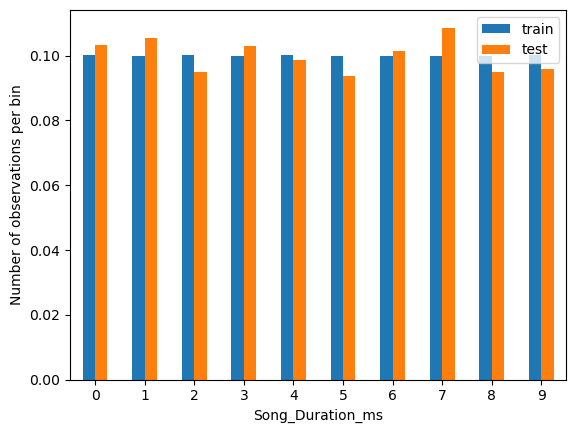

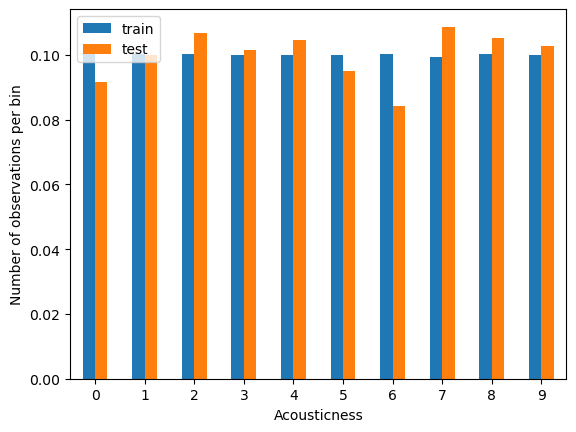

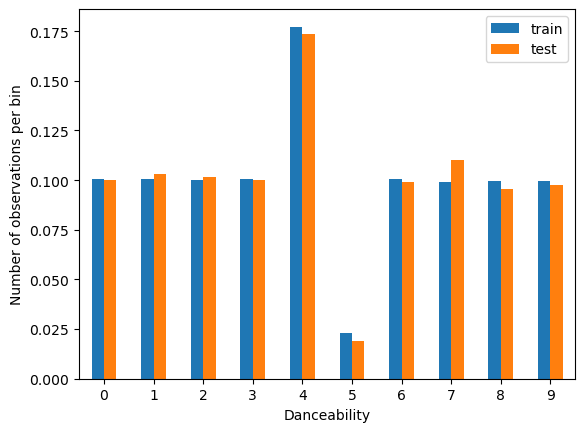

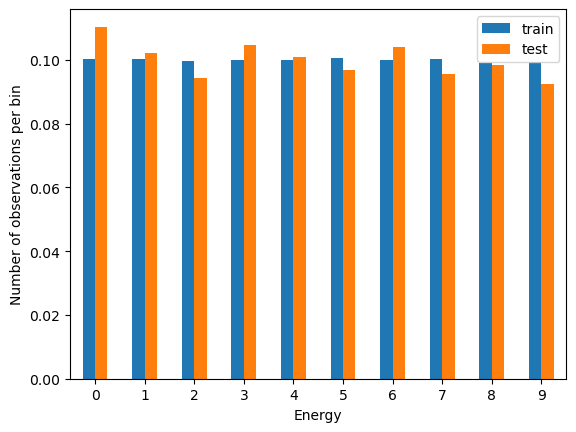

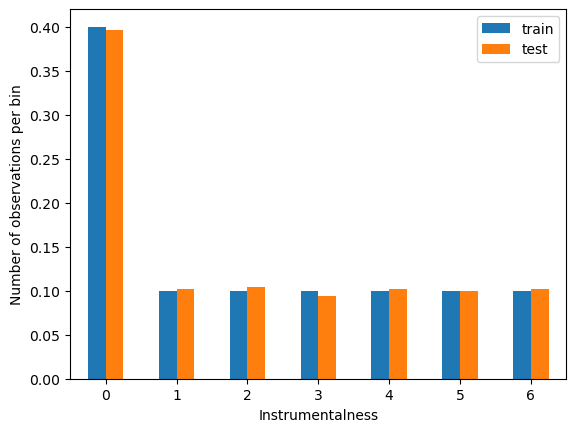

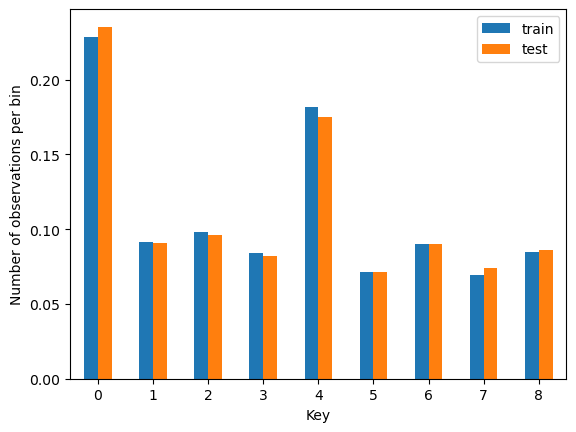

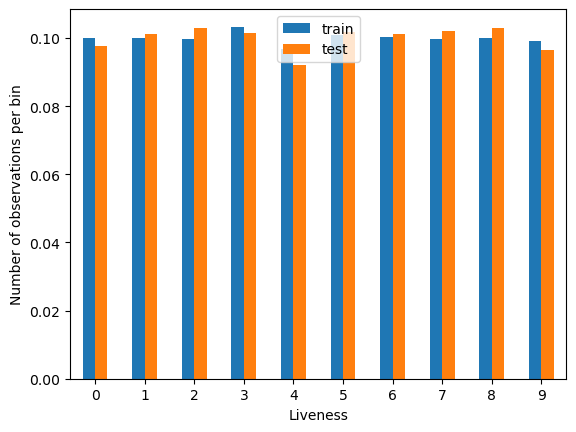

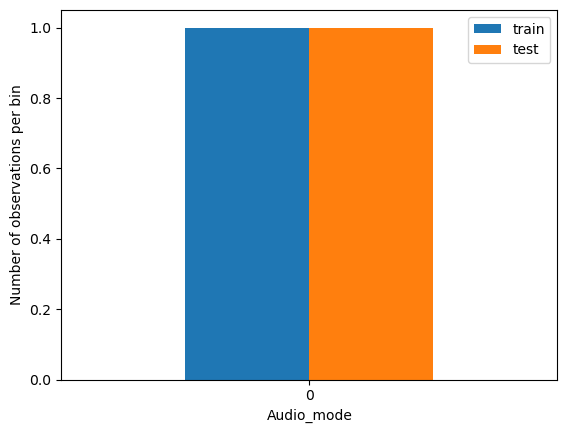

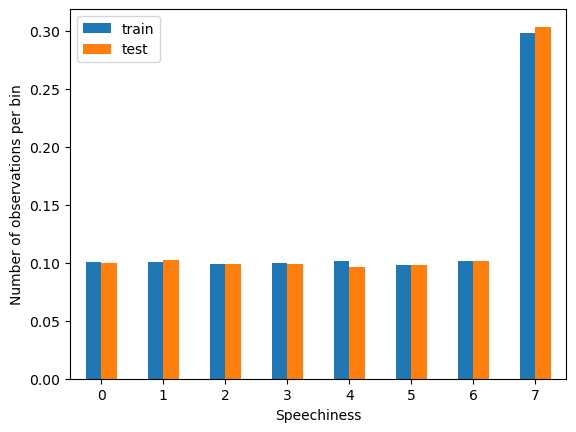

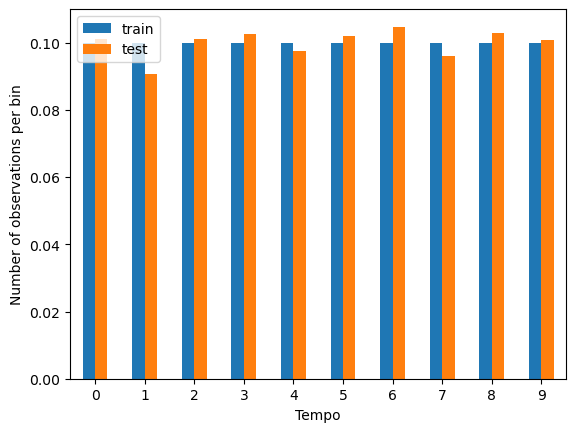

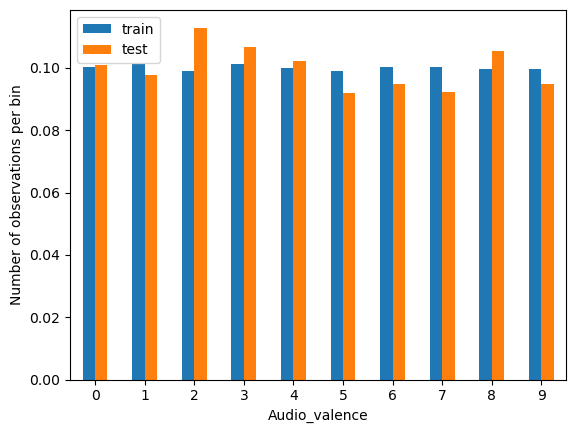

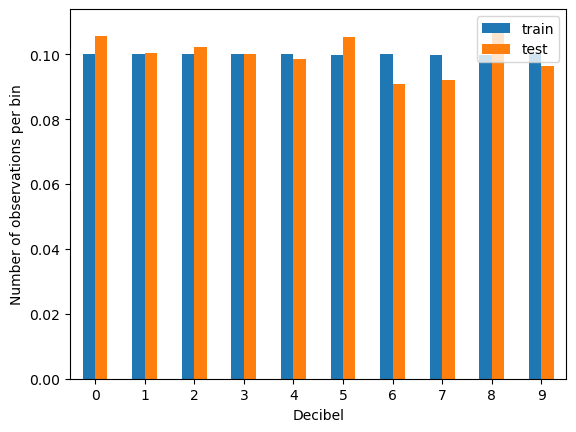

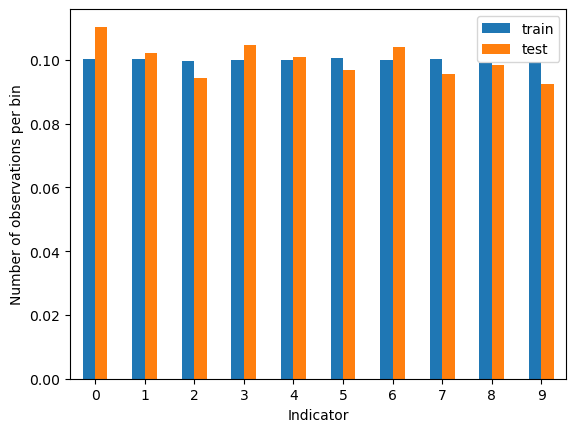

In [86]:
for cols in num_cols:
    t1 = train_t.groupby([cols])[cols].count() / len(train_t)
    t2 = test_t.groupby([cols])[cols].count() / len(test_t)

    # concatenate aggregated views
    tmp = pd.concat([t1, t2], axis=1)
    tmp.columns = ['train', 'test']

    # plot
    tmp.plot.bar()
    plt.xticks(rotation=0)
    plt.ylabel('Number of observations per bin')

In [87]:
# Build Linear Regression Model
model_linear_regression = LinearRegression()
model_linear_regression.fit(train_t, y_train)

# Evaluate the Linear Regression Model using Mean Square Error (MSE)
# The lower MSE, the better the model performance
print('train_mse:', mean_squared_error(y_train, model_linear_regression.predict(train_t)), 
      '\n test_mse:', mean_squared_error(y_test, model_linear_regression.predict(test_t)))

# Evaluate the Linear Regression Model using R-Square
# The closer the r-square value to 1, the better the model performance
print('train_r-sq:', r2_score(y_train, model_linear_regression.predict(train_t)), 
      '\n test_r-sq:', r2_score(y_test, model_linear_regression.predict(test_t)))

train_mse: 116.85303287262889 
 test_mse: 117.08701845830873
train_r-sq: 0.39833612429052734 
 test_r-sq: 0.4009301843899896


### Step 8: Feature Engineer <a id="step8"></a>

Do you need to scale the data? What method do you use and why? Do you create any new features/variables and why? Do you drop any features/variables and why?

[back to top](#top)

### Standardization <a id="step8.1"></a>

Prac 7.1

In [88]:
scaler = StandardScaler()

scaler.fit(train_t)

X_train_scaled = scaler.transform(train_t)
X_test_scaled = scaler.transform(test_t)

In [89]:
scaler.mean_

array([ 4.4996966 ,  4.49689017,  4.4134557 ,  4.49400789,  2.09966626,
        3.32850425,  4.49256675,  0.        ,  4.194554  ,  4.4996966 ,
        4.49423544, 42.38236575,  4.49931735, 42.38236575,  4.49400789])

In [90]:
scaler.scale_

array([2.87246615, 2.87264932, 2.8700788 , 2.87000313, 2.16578225,
       2.62996883, 2.87063397, 1.        , 2.48212617, 2.87249256,
       2.87285644, 4.61010566, 2.87236046, 6.71006652, 2.87000313])

In [91]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=train_t.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=test_t.columns)

C:\Users\leong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\leong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


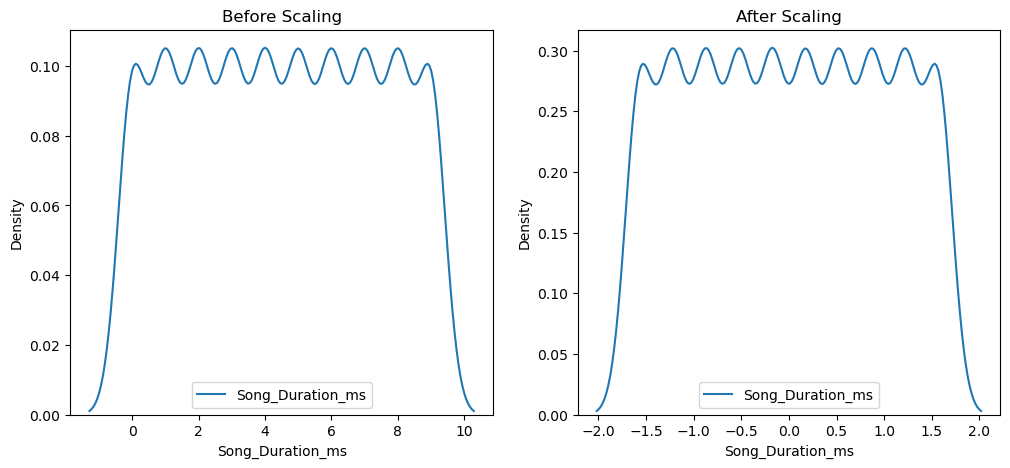

C:\Users\leong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\leong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


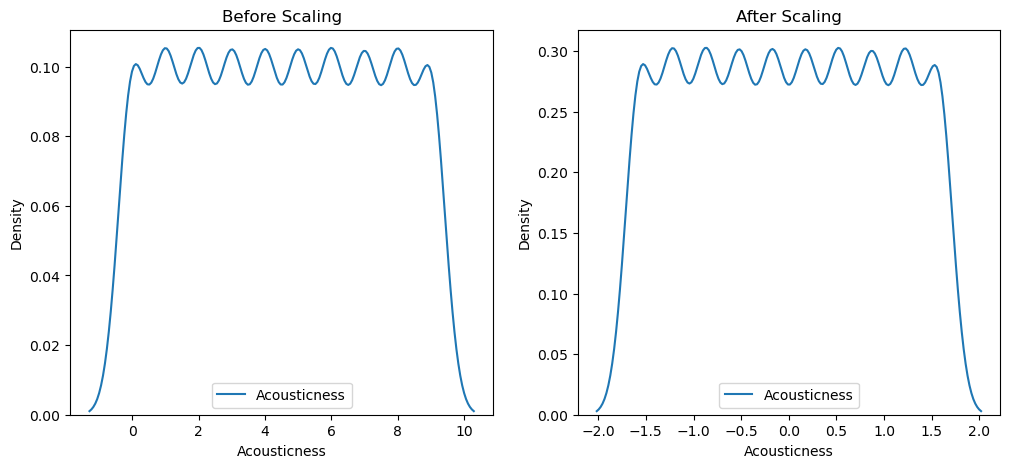

C:\Users\leong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\leong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


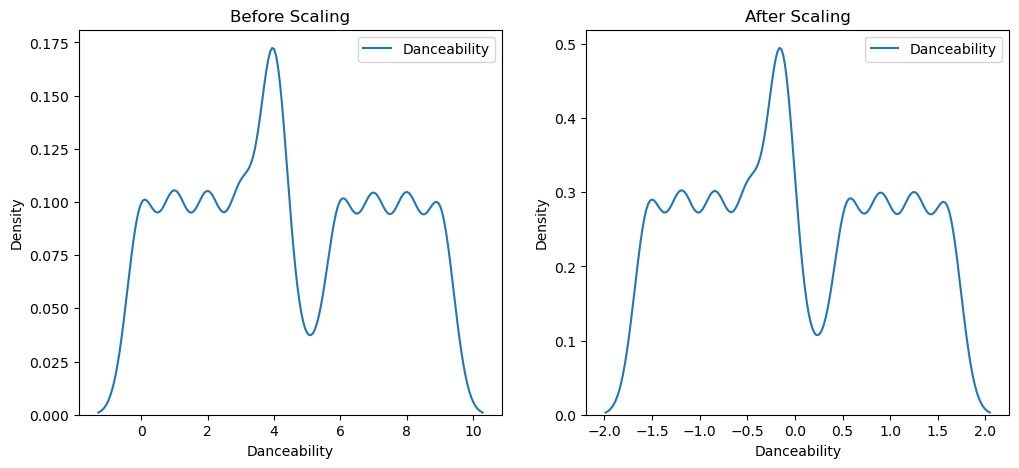

C:\Users\leong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\leong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


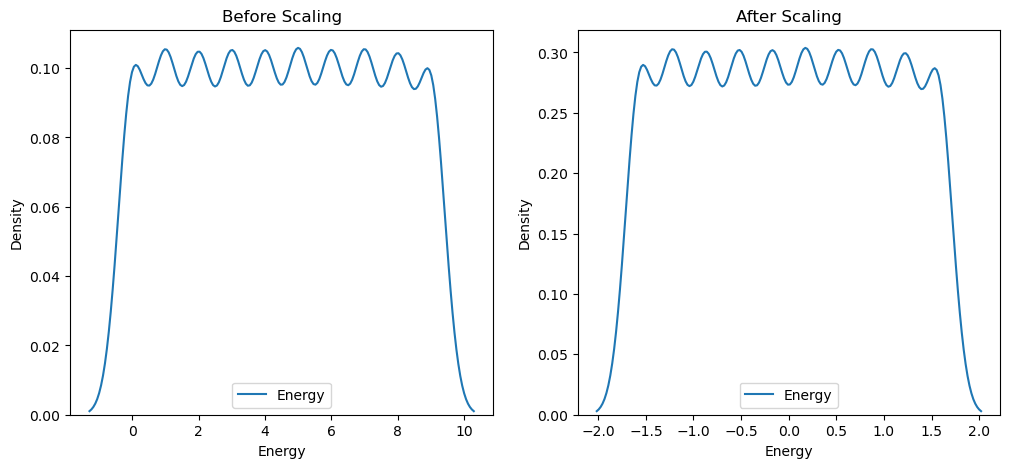

C:\Users\leong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\leong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


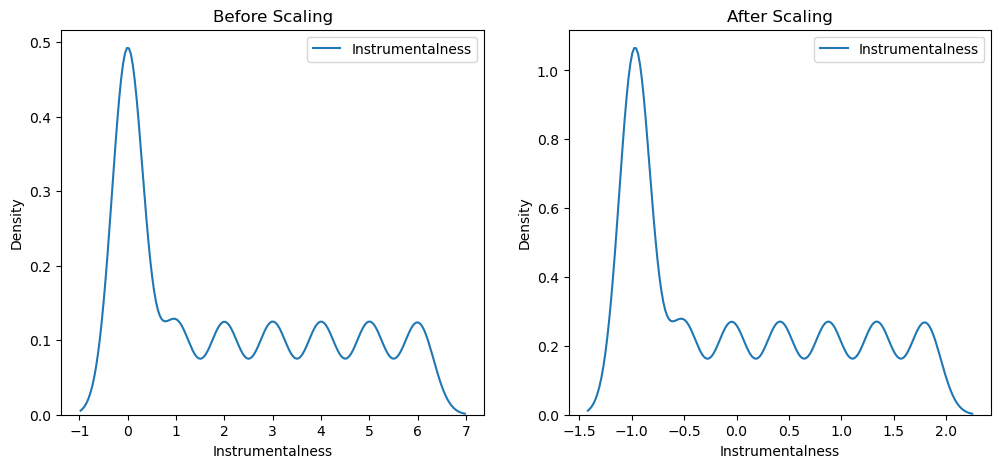

C:\Users\leong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\leong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


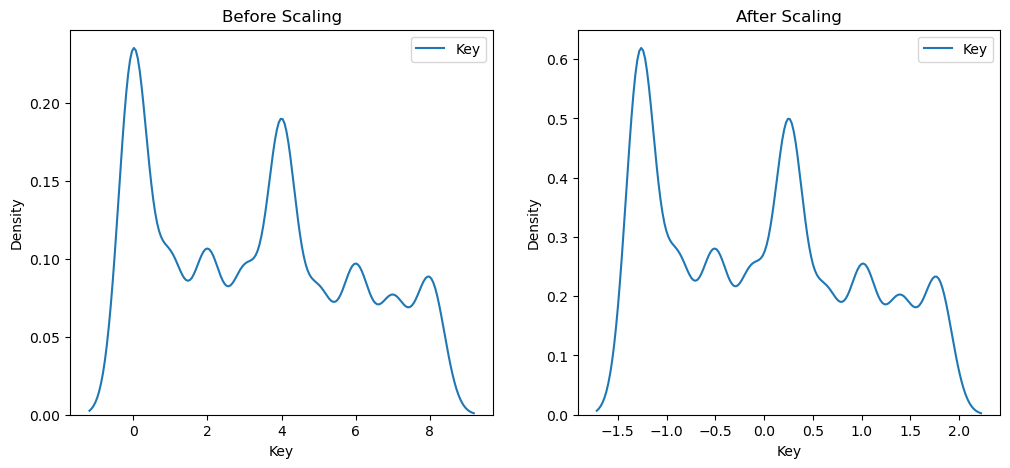

C:\Users\leong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\leong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


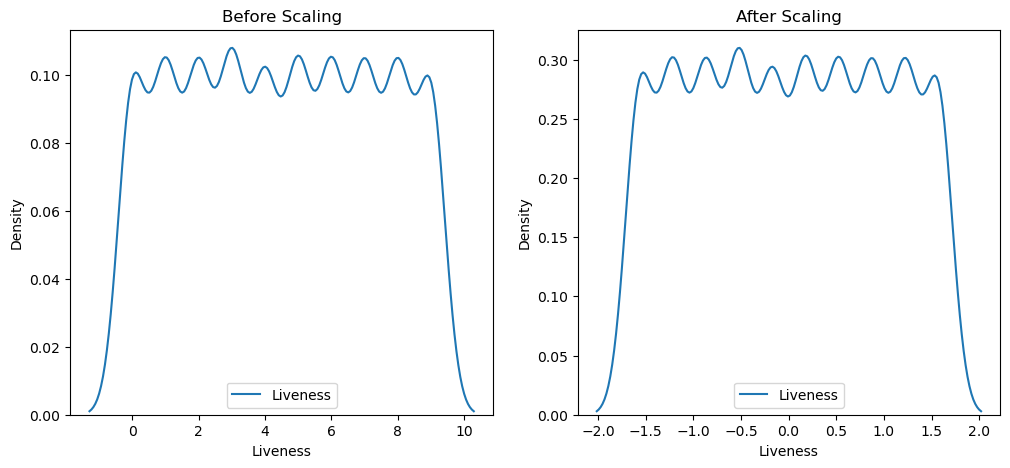

C:\Users\leong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\leong\AppData\Local\Temp\ipykernel_30332\1786656170.py:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(train_t[cols], ax=ax1, label =cols)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
C:\Users\leong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\leong\AppData\Local\Temp\ipykernel_30332\1786656170.py:12: UserWarnin

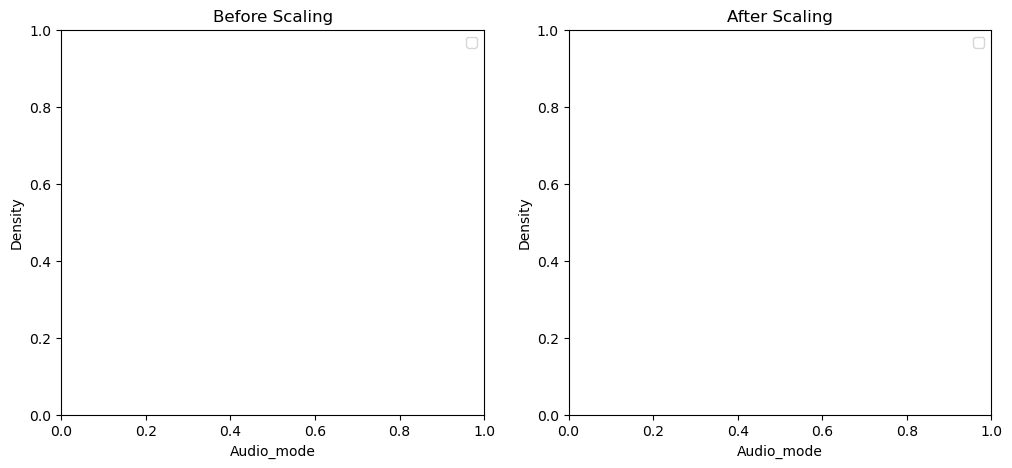

C:\Users\leong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\leong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


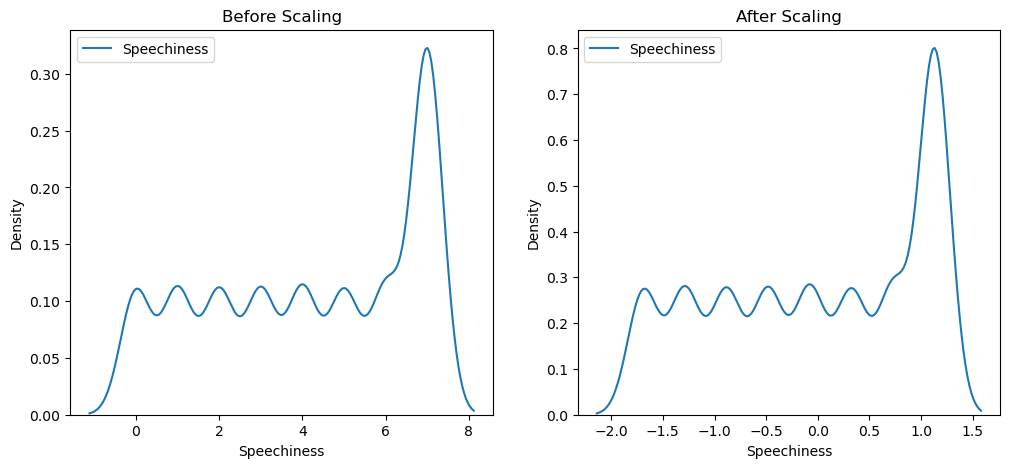

C:\Users\leong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\leong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


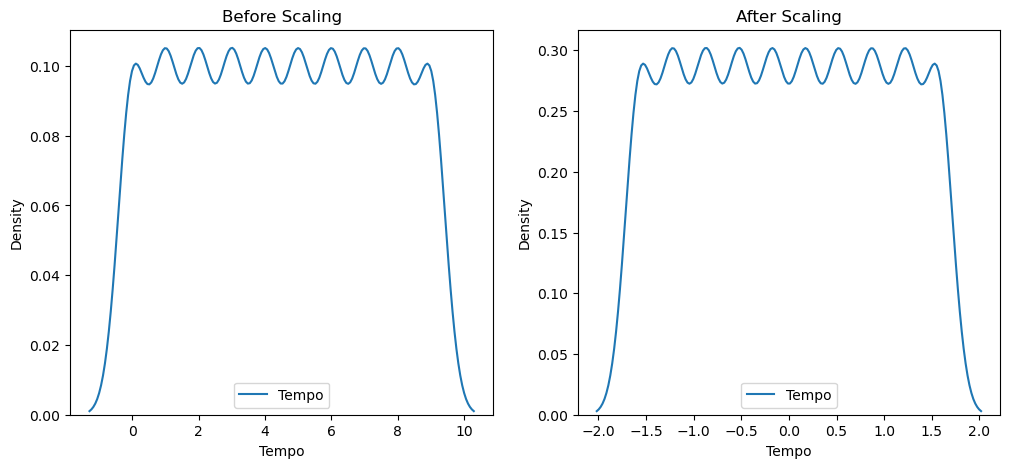

C:\Users\leong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\leong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


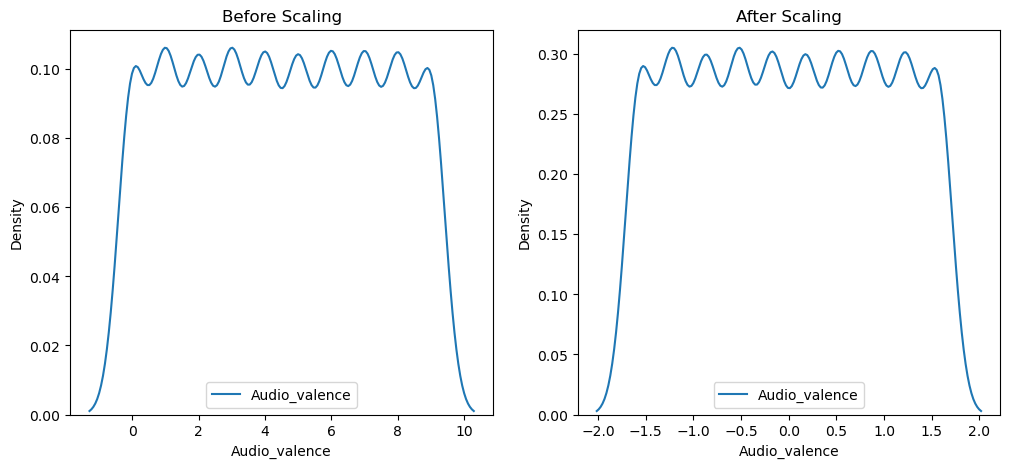

C:\Users\leong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\leong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


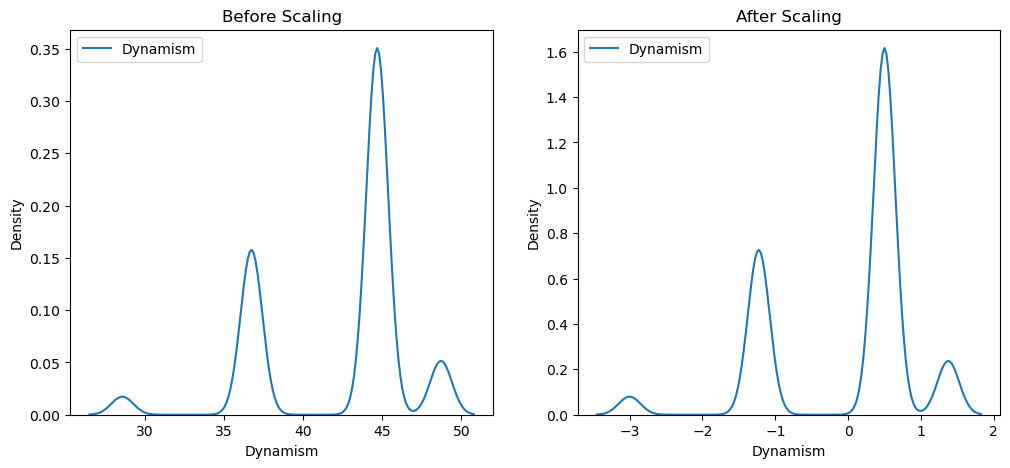

C:\Users\leong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\leong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


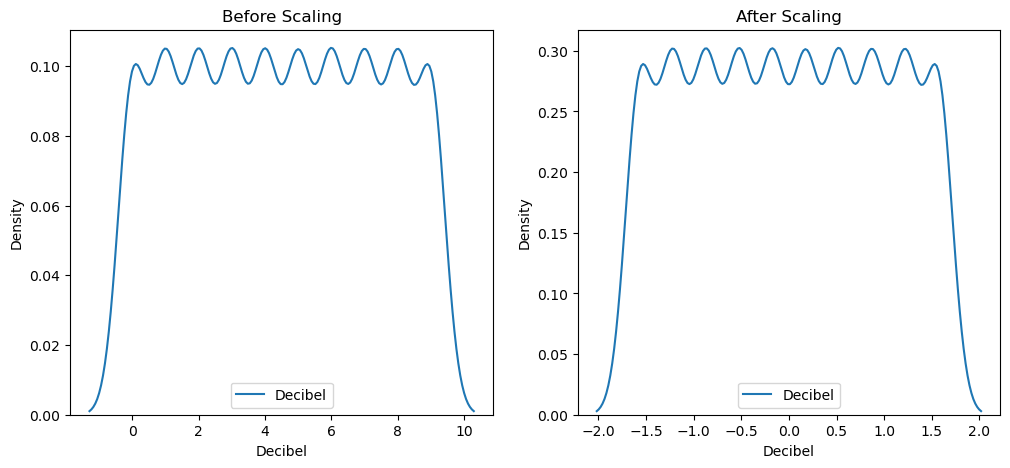

C:\Users\leong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\leong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


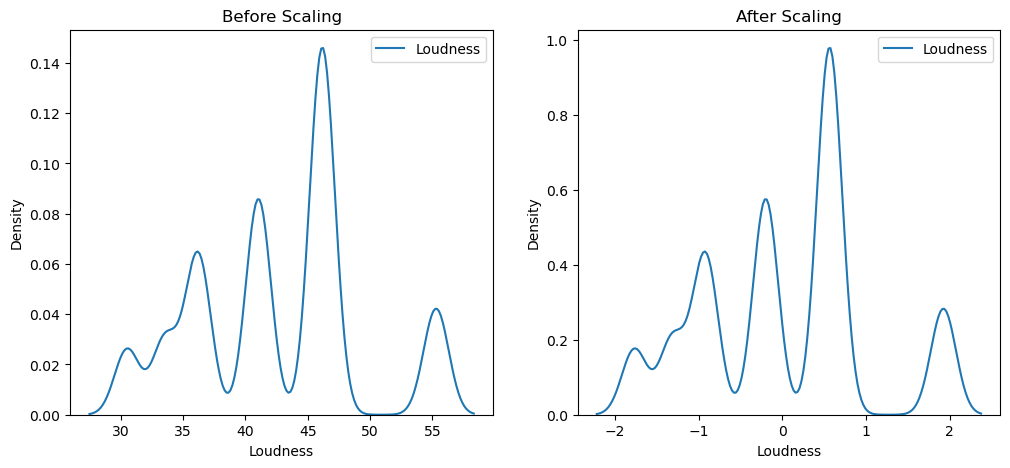

C:\Users\leong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\leong\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


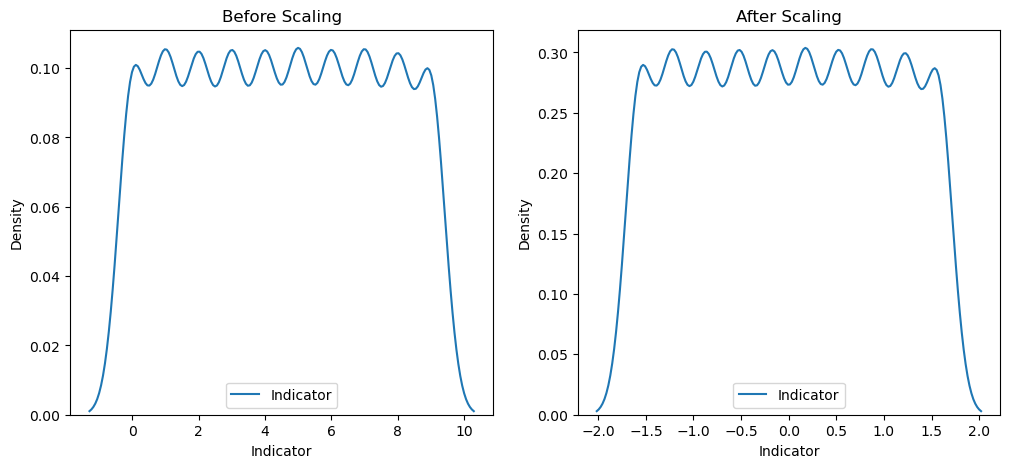

In [92]:
for cols in X_train_scaled.columns:
    
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

    # before scaling
    ax1.set_title('Before Scaling')
    sns.kdeplot(train_t[cols], ax=ax1, label =cols)
    ax1.legend()

    # after scaling
    ax2.set_title('After Scaling')
    sns.kdeplot(X_train_scaled[cols], ax=ax2, label =cols)
    ax2.legend()
    plt.show()

### Step 9: Linear Regression Modelling <a id="step9"></a>

[back to top](#top)

Linear regression is defined as a machine learning model in which the model finds the best fit linear line between the independent and dependent variables in which the aim is to find the best fit linear line and the optimal values of intercept and coefficients such that errors are minimized. For the purpose of this analysis, the goal is to use the X variables e.g. columns other than item outlet sales,to predict the item outlet sales (y variable, or target variable).
### Building and Evaluating the Model
In order to evaluate the model performance of a linear regression model, a range of measures can be used, but in this ASG1 we will focus on only 2:

- Mean Square Error (MSE): The MSE is the variance of the residuals, that is, the squared differences between prediction and actual observation. Lower values of MSE indicate better fit and model performance.
- R-Square: R-square represents the percentage of the response variable variation that is explained by a linear model. The closer to 1.0 the value of R-square, the more indicative of a better fit and model performance.

In [93]:
# assign your fully cleaned and transformed data contained within your versions of 
# X_train_student_final_premodel_version, X_test_student_final_premodel_version,
# y_train_student_final_premodel_version and y_test_student_final_premodel_version into
# the prepared variables below, for a simple linear regression model

In [94]:
X_train_final = X_train_scaled
X_test_final = X_test_scaled

y_train_final = y_train
y_test_final = y_test

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [96]:
# Build Linear Regression Model
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train_final, y_train_final)

# Evaluate the Linear Regression Model using Mean Square Error (MSE)
# The lower MSE, the better the model performance
print('train_mse:', mean_squared_error(y_train_final, model_linear_regression.predict(X_train_final)), 
      '\n test_mse:', mean_squared_error(y_test_final, model_linear_regression.predict(X_test_final)))

# Evaluate the Linear Regression Model using R-Square
# The closer the r-square value to 1, the better the model performance
print('train_r-sq:', r2_score(y_train_final, model_linear_regression.predict(X_train_final)), 
      '\n test_r-sq:', r2_score(y_test_final, model_linear_regression.predict(X_test_final)))

train_mse: 116.85303287262889 
 test_mse: 117.08701845830873
train_r-sq: 0.39833612429052734 
 test_r-sq: 0.4009301843899896


In [99]:
num_cols=['Song_Duration_ms',
 'Acousticness',
 'Danceability',
 'Energy',
 'Instrumentalness',
 'Key',
 'Liveness',
 'Audio_mode',
 'Speechiness',
 'Tempo',
 'Audio_valence',
 'Decibel',
 'Song_Popularity',
 'Indicator']

In [103]:
for cols in num_cols:
    correlation = data_copy[cols].corr(data_copy['Song_Popularity'])
    print (f'{cols}: ', correlation)

Song_Duration_ms:  0.032458396602882474
Acousticness:  -0.19891909329551746
Danceability:  0.20378852295397806
Energy:  0.40596915420062496
Instrumentalness:  -0.28320175562139954
Key:  -0.002345876673108345
Liveness:  0.02236473064992424
Audio_mode:  -0.029625850747861886
Speechiness:  0.07449540236700332
Tempo:  0.051921104195378744
Audio_valence:  0.31234278811037647
Decibel:  0.5746480749448815
Song_Popularity:  1.0
Indicator:  0.4060006481881952


<Axes: >

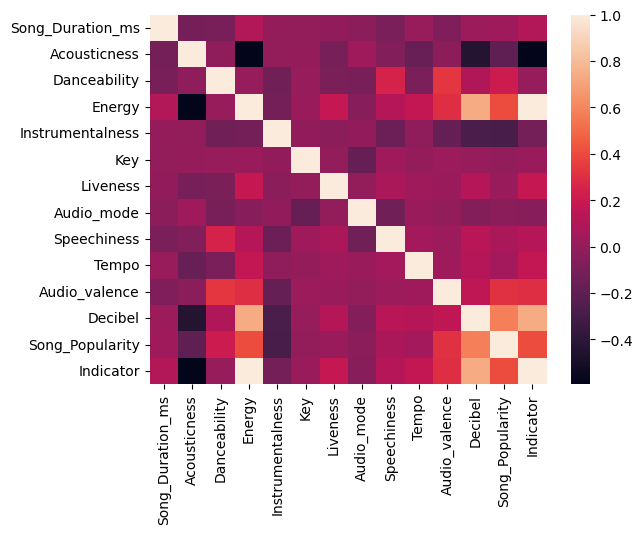

In [101]:
sns.heatmap(data_copy[num_cols].corr())

### Report <a id="report"></a>

[back to top](#top)

### 1.	Introduction with Value Based Problem Statement

The purpose of this research is to predict a song’s popularity and offer marketing insights to the management team that will guide them in allocating resources effectively. By conducting this research, our marketing strategies would be enhanced, and our songs would gain a larger fan base. Our company would have a better brand image and solidify our position in the market. 
 
As a data analyst tasked with researching the various song’s characteristics, this report will include the process of data exploration, cleaning, testing and using different methods of transformation as well as the use of appropriate features to achieve the best possible fit and predictive performance. By documenting my analysis of the comparison of various song characteristics, I can provide valuable data that informs marketing strategies and content decisions.


### 2.	Exploratory Data Analysis 

By performing exploratory data analysis, I realised there were a few issues with the dataset. Hence, I began by reorganising a few variables in the dataset before identifying the relationship of the columns.

1.	Replacing NaN (Not a Number) with “?” (Cell 8)
By adjusting the value of “?” with NaN, the computer will realise it is a true value and recognise it as a null value. Hence, it will increase the number of null values that we must replace and will decrease the ambiguity of the dataset before further adjusting with the replacement of null values.

2.	Changing Data Type (Cell 9)
I have re-evaluated the data type of column “Liveness”. As shown, the data type is cast as an “object” instead of ”float64” despite the values consisting of characteristics of a “float64” data type rather than an “object”. “float64” is a floating-point number format that contains decimals and integers that occupy 64 bits in a computer memory. “object” refers to a particular object that is stored in a stack.

https://www.simplilearn.com/tutorials/python-tutorial/float-in-python
https://www.geeksforgeeks.org/primitive-data-type-vs-object-data-type-in-java-with-examples/

3.	Replacing Unique Values (Cell 10 & 11)
As shown, “Dynamism” has multiple variations that refer to one unique value. For example, “medium” has variations of “m” and “med”. Thus, by replacing the variations it will be much easier to assess the cardinality of the column avoid future conflicts during the transformation and encoding of the dataset and improve the clarity and reliability of the predictive performance by ensuring consistency in the dataset.

4.	Quantifying Missing Data (Cell 18 & 19)
Missing data occurs when no data is stored for certain observations within a variable. By quantifying missing data, we can visualise the variables with missing values.  
Firstly, we can use “.isnull().mean()”  function to display the percentage of missing values of each variable.  
Secondly, we can plot the percentage of missing values by utilising the pandas plot.bar() to plot as a bar graph to have an overview of which variable has missing values and in increasing order of percentage. 
By doing this step, we can see what we are working with. This helps us to analyse which method should be used to impute missing values to work with a complete dataset.
5.	Identifying Correlation Relationship
To help identify correlations between the target (“Song_Popularity”) and other variables, I made use of the pandas DataFrame.corr() method to calculate how well the relationship is between each variable in the dataset. We can see that none of the variables have a strong positive relationship with “Song_Popularity”. The variable with the strongest positive relationship is “Decibel” at 0.512. 
 
Thus, we can also plot the correlation of the variables by making use of a seaborn heatmap. We can track the colour-changing gradient to understand the fluctuations. The lighter the gradient is the higher the correlation between the variables, the darker the gradient is the lower the correlation between the variables. It is observed from the heatmap that “Energy” and “Indicator” have a strong relationship. However, “Acousticness” has a weak relationship with “Energy”, “Audio_Valence” and “Indicator”.

https://www.w3schools.com/python/pandas/pandas_correlations.asp

6.	Identifying Linear Relationships
By utilising seaborn lmplot(), we will plot the data by drawing a scatterplot and the regression model across a FacetGrid by comparing the target and other variables. By plotting, we can identify if there’s a linear relationship. We can analyse that “Song_Duration_ms”, “Key”, and “Liveness” have a non-linear relationship. “Acousticness”, “Instrumentalness”, and “Audio Mode” have a negative linear relationship. “Danceability”, “Energy”, “Speechiness”, “Tempo”, “Audio_Valence”, “Decibel”, and “Indicator” have a positive relationship. However, the steepness of the regression model differs for each variable.

https://www.imsl.com/blog/what-is-regression-model#:~:text=A%20regression%20model%20provides%20a,by%20a%20linear%20regression%20model.
https://seaborn.pydata.org/generated/seaborn.lmplot.html

7.	Identifying Rare Categories
Rare categories are considered unique values under 5% or 1% as a rare occurrence. Hence, we can analyse rare categories in variables using pandas plot.bar() and a line on the y-axis to identify categories under 5%. “Dynamism” has 1 rare category of “low”, “Key” also has 1 rare category of “3.0’ and “Audio_mode” has no rare category. 
 
For other variables, rare categories could not be identified as they had multiple unique values. Thus, all of the values became a rare category.


### 3.	Cleanse the Data 

Missing Data 
Currently, “Liveness”, “Danceability”, “Speechiness”, “Loudness”, and “Dynamism”  are variables with missing values. By plotting out the histogram of the numerical variables, we can see the current structure of the data. Majority of the data still have yet to achieve a normal distribution structure. I handled the missing values by using an assembling imputation pipeline with a feature engine.  
 
When dealing with numerical variables, I chose to replace the missing values of “Speechiness” with arbitrary values. “Liveness” and “Danceability” with the median value of their respective columns. The reason is to help build the shape of a normal distribution. For categorical variables, I chose to use the frequent value of their respective columns. The reason is, that I would like to avoid dropping any rows and losing data. It may affect the reliability of the dataset. 
 
After I transformed the X_train and X_test datasets, I checked by using .isnull().sum() to see if there are any variables with null values. Currently, there are no columns with missing values. 
 
I chose to work with a feature engine as it allows us to easily implement different imputation techniques for different feature subsets.  Due to the nature of the dataset, there is a mix of numerical and categorical variables. Thus, we would have to perform different imputation techniques on different variables. By using an imputation pipeline, I can assemble multiple imputation techniques at once. As compared to using scikit-learn, I can avoid inputting a fill_value into my arbitrary variable. As I am unsure what value should be used, the feature engine helps me avoid that.




• Outliers 
With dealing outliers, I choose to perform winsorization. As opposed to using other transformations, it limits the extreme values to be replaced with a value closer to the mean of the distribution using a specified percentile providing a symmetric and unbiased representation of the distribution. Thus, creating a normal distribution. The extreme values are not removed but instead replaced by other values. I choose to set all the data below the 5th percentile and the data above the 95th percentile to be transformed.  
 
If we were to look at transformation like zero-coding, it caps the variable at 0. However, we are not able to do so as all the values in “Decibel” are negative. Capping at arbitrary maximum and minimum values would result in losing multiple data and those in the same row that are outside of the maximum and minimum values.  
 
After the transformation, the majority of the histogram has significantly improved and nearly has a normal distribution structure telling us that the data nearer to the mean are more frequent in occurrence as opposed to data further away from the mean. The QQ-plot results show that the majority of the points fall on the 45-degree reference line. Thus, indicating that the data has a similar normal distribution. (?) The boxplot results show a larger range from the upper quartile (75%) to the lower quartile (25%).  “Acousticness”, “Liveness”, and “Speechiness” have a positive skew. “Energy” and “Decibel” have a negative skew. The other variables have a normal distribution skew.  


https://www.simplypsychology.org/boxplots.html
https://desktop.arcgis.com/en/arcmap/latest/extensions/geostatistical-analyst/normal-qq-plot-and-general-qq-plot.htm#:~:text=QQ%20plot%20example-,Examining%20data%20distributions%20using%20QQ%20plots,deviate%20from%20the%20reference%20line.


### 4.	Data Transformation 

Categorical Data (e.g. One hot encoding, Ordinal label encoding and etc.) 

Firstly, I perform grouping rare categories on the categorical variables (“Dynamism” and “Loudness”). I classified the rare categories as categories that are less than 5%. I specified 5 as my “n_categories” to keep the top 5 most frequent categories separated. 
 
Without performing grouping rare categories I initially encountered missing values in my X_test after encoding my categorical variables. Despite trying the replace the null values by using an imputation, there were still errors, and it could not be encoded. As mentioned above, “Dynamism” had values that were replaced manually. There may have been some values that were not replaced correctly and were not shown in the previous few steps. Thus, by grouping the rare categories, we can avoid conflicts like overfitting or being unable to score an observation. 
 
Afterwards, I performed target mean encoding with the feature engine on the categorical variables. This implies that I replaced the variables with the average target (“Song_Popularity”) value. By testing and performing different encoding methods, I picked target mean encoding as it improved my linear regression model the most.  
 
The reason why I chose to work with the feature engine instead of pandas was to avoid manually encoding and accidentally replacing the data with the wrong value. It would have led to the dataset not being encoded fully or accidentally replacing it with the wrong value. Thus, there would be errors in our dataset that I may not be able to pick up on.

• Numerical Data (e.g. log transformation, binning) 
To transform the numerical data, I made multiple copies of the dataset and assigned it to the respective transformation method. This was done to be able to compare the different graphs at once after it was transformed and to see which transformation was most compatible with the variable. I picked the transformation method based on how well the graph looked after it was transformed.  
 
Here is what I have found, “Song_Duration_ms” and “Liveness” worked best with logarithmic transformation. “Acousticness” had a better histogram and QQ-plot when transformed using box-cox. “Indicator”, “Audio_valence”, “Temopo”, “Audio_mode”, “Key”, and “Energy” overall had better-looking graphs when applying the Yeo-Johnson transformation. As for the rest, I used power transformation. 
 
As each variable works differently with different methods, I felt that it was best to individually identify which variable worked best with the transformation. If I were to transform all the variables using one transformation, the reliability of my dataset would decrease, and the linear regression results would worsen. 
 
To bin the numerical variables, I chose to work with Equal-width discretization with feature-engine. After transforming the numerical variables, I used a for loop to plot the graph by using a bar graph. As shown, the majority of the columns train and test columns have similar results. 
 
After testing out the other forms of transformation, Equal-width discretization produced the test results the most similar to the train results. I picked to work with a feature engine instead of pandas to avoid allocating the values to the wrong variables. Thus, it would lead to wrong output and decrease the reliability of my dataset.


### 5.	Feature Engineer 

Feature Scaling 
For my dataset, I used standardisation to scale my data. Standardisation refers to getting the distance away from the mean and finding out how many units of standard deviation it is away from the mean. I tried testing it out by using MinMax Scaling, however, the maximum and minimum data that it produced were all consistent. Thus, I felt that it could not be used. 
 
In the mean array, we can see that the majority of the mean lies around 4.4 and there are duplicates of the mean value. On the scale, the majority of the results lie around 2.87, there are also duplicates in this array.  
 
After transforming it into a data frame, I plotted the graph by using Seaborn kde.plot() (kernel density estimate) which helps to visualise the distribution of observations in a dataset. We can analyse the comparison of before scaling and after scaling by plotting them side by side. 
 
Overall, we can see that after it was scaled, the range in the x-axis and y-axis increased and the shape of the graph remained the same.


### 6.	Linear Regression Model 

In my first linear regression model, these are the results:

train_mse: 116.25785672682714 

test_mse: 116.37872483957399

train_r-sq: 0.40140062315555236 

 test_r-sq: 0.40455413291272235

In my final linear regression model, these are the results:

train_mse: 116.85303287262889 

test_mse: 117.08701845830873

train_r-sq: 0.39833612429052734 

test_r-sq: 0.4009301843899896


In the beginning, we can see that the difference between the train mean square error (MSE) and test mse is 0.121 and the for R-square (R-sq) is 0.00315. The final regression model shows us that the difference between the MSE is 0.234 and the difference between the R-sq is 0.00259. 

To compare the two results, we can see that the performance of the MSE has decreased by 0.113 and the R-sq  has improved by 0.00056. Between the first and final MSE, the results have increased by 0.09. the first and final test MSE has increased by 0.4. The train R-sq has decreased by 0.001 and the test R-sq has decreased by 0.003. Overall, the performance shows us that the model has worsened. As we can see, the MSE results should have decreased and the R-sq should have increased closer to 1.0.

As a result, the model was not able to find the best fit linear line between the independent variables and dependent variables.


### 7.	Summary and Further Improvements 

By using the correlation function, we can see that “Decibel”, “Indicator”, and “Energy” have the strongest positive correlation to “Song_Popularity”. By plotting the heat map to see the correlation, we can see that the same three variables have the strongest correlation. Thus, we can conclude that the variables “Decibel”, “Indicator”, and “Energy” affect a song's popularity. We can use this data to focus more on these variables when using it to market to the public. 
 
Improvements that can be made include adding new features to the dataset to see if we can derive meaningful insights from using alternative features. For example, creating a list of variables to create new features by using mathematical or statistical operations like product, mean, standard deviation and many more.  


### Presentation Chart

In [115]:
columns=["Decibel", "Energy"]

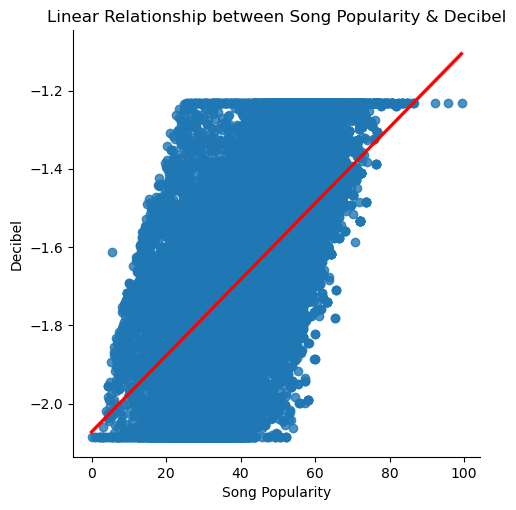

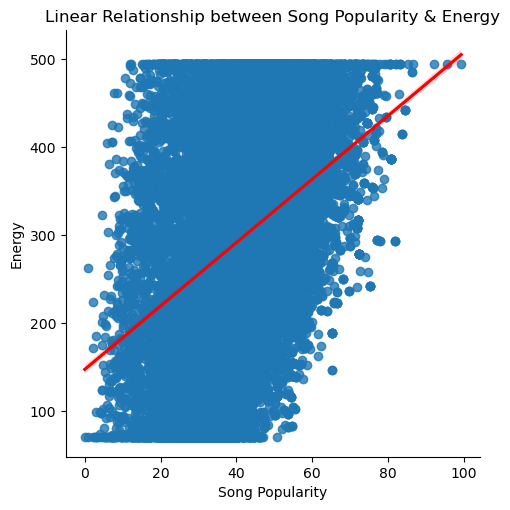

In [116]:
for cols in columns:
    sns.lmplot(x="Song_Popularity", y=cols, data=data_copy, order=1, line_kws={'color':'red'})

    plt.title(f'Linear Relationship between Song Popularity & {cols}')
    plt.ylabel(cols)
    plt.xlabel('Song Popularity')

    plt.show()


In [113]:
columns=["Acousticness", "Instrumentalness"]

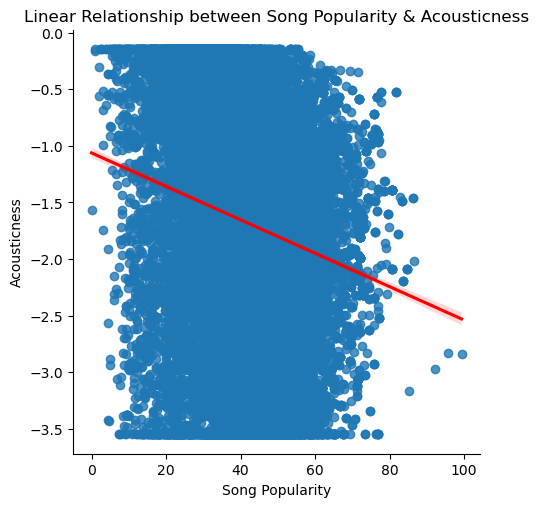

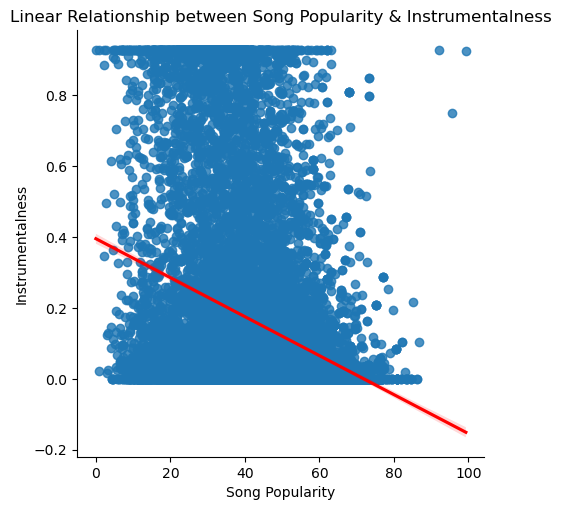

In [114]:
for cols in columns:
    sns.lmplot(x="Song_Popularity", y=cols, data=data_copy, order=1, line_kws={'color':'red'})

    plt.title(f'Linear Relationship between Song Popularity & {cols}')
    plt.ylabel(cols)
    plt.xlabel('Song Popularity')

    plt.show()